# Texas COVID Vulnerability Report
**by Yvonne King, Brandi Reger, Jada Shipp, and Wenliang Sun**

**Quick Notebook Reference**

1. Project Plan
2. Imports
3. Acquire
4. Prep
5. Exploration
6. Models
7. Model Evaluation
8. Final Conclusions

## Project Plan

**Acquisition, Prep, and Initial Exploration**
- Read in various files
- Handle Missing Values
- Remove/repair erroneous data
- Look at shape of data

**Exploration**
- Answer the following questions:
    - What social features are related to spikes in COVID

**Modeling**
- Time Series Analysis - Using our social vulnerability index we want to create a model to show weekly growth/decline of COVID per county
- We will use classification, time series, and possibly regression to predict case increases

**Main Hypotheses**

- $H_0$: Vulnerability score is not related to higher infection rate.
- $H_a$: Vulnerability score is related to higher infection rate


- $H_0$: Population density correlates to higher infection rate
- $H_a$: Population density does not correlate to higher infection rate 


- $H_0$: Counties with higher population of senior citizens have higher infection rates
- $H_a$: Counties with higher population of senior citizens do not have higher infection rates

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Hypothesis testing
from math import sqrt
from scipy import stats

import acquire
import prepare
import explore

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

## Acquire
- The ```acquire.py``` file has all the functions to call in our dataframes for the Texas subsets of the following files (which can be found in the Data folder:
    - County Classification
    - Cumulative Tests over Time by County
    - Food1
    - Hospitals
    - Jobs
    - NursinfFacilities
    - People
    - time_series_covid19_confirmed_US
    - Variable Name Lookup
    - Veterans
- We went through all the files above and dropped erroneous columns
- After each file was combed through, we combined all data into one large dataframe using the```merge_dataframes()``` function in the ```acquire.py```

In [2]:
#bring in complete dataframe
df = acquire.merge_dataframes()

#take a peek at the data
df.sample(5)

LACCESS_POP15   County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
100  740267.412661   harris   60241.0      6.759724           306893.0   
194    3039.208402   reeves   45341.0      5.350597              769.0   
210     750.873066  sherman   57052.0      5.763498              136.0   
99    15879.691275   hardin   60909.0      6.764168             2372.0   
113   17219.639039   howard   50423.0      7.855109             1915.0   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
100           767367.0              1703.48        4698619.0   
194             2693.0              2635.37          15695.0   
210              368.0               923.04           3079.0   
99              7035.0               890.57          57207.0   
113             6263.0               900.79          36459.0   

     Age65AndOlderNum2010  Under18Num2010  ...   FIPS  num_nursing_homes  \
100                333487         1147835  ...  48201              103.0   
194                  1654            3142  ...  48389                1.0   
210                   405             916  ...  48421                1.0   
99                   7382           14110  ...  48199                5.0   
113                  4615            7857  ...  48227                3.0   

     total_tests  Public Health Region (11)  RPL_THEME1  RPL_THEME2  \
100       224671                          6      0.4308      0.2648   
194          229                          9      0.8103      0.0158   
210           35                          1      0.3597      0.1146   
99           725                          5      0.1107      0.3557   
113          325                          9      0.7866      0.2925   

     RPL_THEME3  RPL_THEME4  RPL_THEMES  bed_count  
100      0.9249      0.5573      0.6443       84.0  
194      0.9565      0.8538      0.7154        1.0  
210      0.7075      0.1502      0.2411        NaN  
99       0.0040      0.2806      0.0870        NaN  
113      0.7668      0.8340      0.8024        3.0  

[5 rows x 78 columns]

In [3]:
#look at the shape of the data
df.shape

(254, 78)

In [4]:
#look at data types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 78 columns):
LACCESS_POP15                         253 non-null float64
County                                254 non-null object
MedHHInc                              254 non-null float64
Deep_Pov_All                          254 non-null float64
PovertyUnder18Num                     254 non-null float64
PovertyAllAgesNum                     254 non-null float64
LandAreaSQMiles2010                   254 non-null float64
TotalPopEst2018                       254 non-null float64
Age65AndOlderNum2010                  254 non-null int64
Under18Num2010                        254 non-null int64
NaturalChange1018                     254 non-null float64
AvgHHSize                             254 non-null float64
TotalOccHU                            254 non-null int64
OwnHomeNum                            254 non-null int64
FemaleHHNum                           254 non-null int64
TotalHH              

# Prepare

During the preparation phase we:
1. Handled any null values by replacing them with zero since each row represents a county in Texas
2. Added the following calculated fields:
    - Cases per 1k, 10k, & 100k
    - Positivity rate (cases / tests)
    - population density (how many people per sq mile of land in the county)
    - numerical columns into percents
    - Proportion of all children that live below poverty line
    - Proportion of population that live below poverty line
    - Proportion of seniors that live below poverty line
    - Percentage of heads of house who own their home
    - Rent home percentage
    - Percentage for female heads of households
    - of all heads of households, what proportion are over 65 and live alone
    - of all heads of households, what proportion do not speak english
    - of the adult population, what proportion have what level of education
    - of the population, what proportion are various races
    - How does the median income for vets compare to the median income in the county
    - What proportion of the adult population is a vet
    - What proportion of the adult population is disabled
    - What proportion of the vet population is poor
3. Capitalized county name
4. Updated all datatypes
5. Rounded decimals to 2 pints
6. Created the following categorical columns:
    - Population density binned into High, Mid and low
    - Infection percent binned into High, Mid and low

Functions have been created to handle all of the above in the ```prepare.py``` file

To bring in the data we will call the ```get_data()``` function from the ```prepare.py``` file

In [5]:
#read in dataframe
df = prepare.get_data()

In [6]:
#take a look at a sample of our data to ensure everything came in as anticipated
df.sample(3)

LACCESS_POP15   County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
110   16796.485796     Hood     60917      4.628032               2133   
22     1637.000002  Briscoe     44409      6.369009                 68   
174   11808.945824  Navarro     46259      7.307087               3575   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
110               6108                  420            60537   
22                 245                  900             1516   
174               9739                 1009            49565   

     Age65AndOlderNum2010  Under18Num2010  ...  white_pct  black_pct  \
110                 10892           10902  ...       0.76       0.00   
22                    358             362  ...       0.74       0.03   
174                  6863           12923  ...       0.60       0.14   

     asian_pct  nat_am_pct  med_inc_vet_vs_civ  all_vet_pct  disabled_pct  \
110       0.01         0.0                1.72         0.11          0.06   
22        0.00         0.0                1.17         0.07          0.04   
174       0.00         0.0                1.42         0.09          0.11   

     poor_vets_pct  pop_density_category  infection_pct_category  
110           0.03                  high                     low  
22            0.11                   low                     low  
174           0.07                   mid                     mid  

[3 rows x 103 columns]

In [7]:
#Let's take a quick look at the shape of the data to make sure no rows were dropped
df.shape

(254, 103)

In [8]:
#make sure there are no nulls
df.isnull().sum()

LACCESS_POP15             0
County                    0
MedHHInc                  0
Deep_Pov_All              0
PovertyUnder18Num         0
                         ..
all_vet_pct               0
disabled_pct              0
poor_vets_pct             0
pop_density_category      0
infection_pct_category    0
Length: 103, dtype: int64

In [9]:
df.isna().sum().sum()

0

In [10]:
df.isna().sum().sum()

0

**Quick Notes**
- Each row in our dataframe represents a County in Texas
- There are 254 Counties in Texas and those counties are broken into 11 regions across Texas
- A Data Dictionary is available in our README file

# Exploratory Data Analysis (EDA)

In this section we will:
1. View the distribution of our numerical data
1. Look at the region overview

## What does the Distribution of our Data look like by Region?
- Here we are going to look at the following columns:
    - ```RPL_THEME1``` - Socioeconomic 
    - ```RPL_THEME2``` - Household Composition & Disability
    - ```RPL_THEME3``` - Minority Status & Language
    - ```RPL_THEME4``` - Housing Type & Transportation
    - ```RPL_THEMES``` - Overall tract summary ranking variable
    - ```num_covid_cases``` - number of covid cases

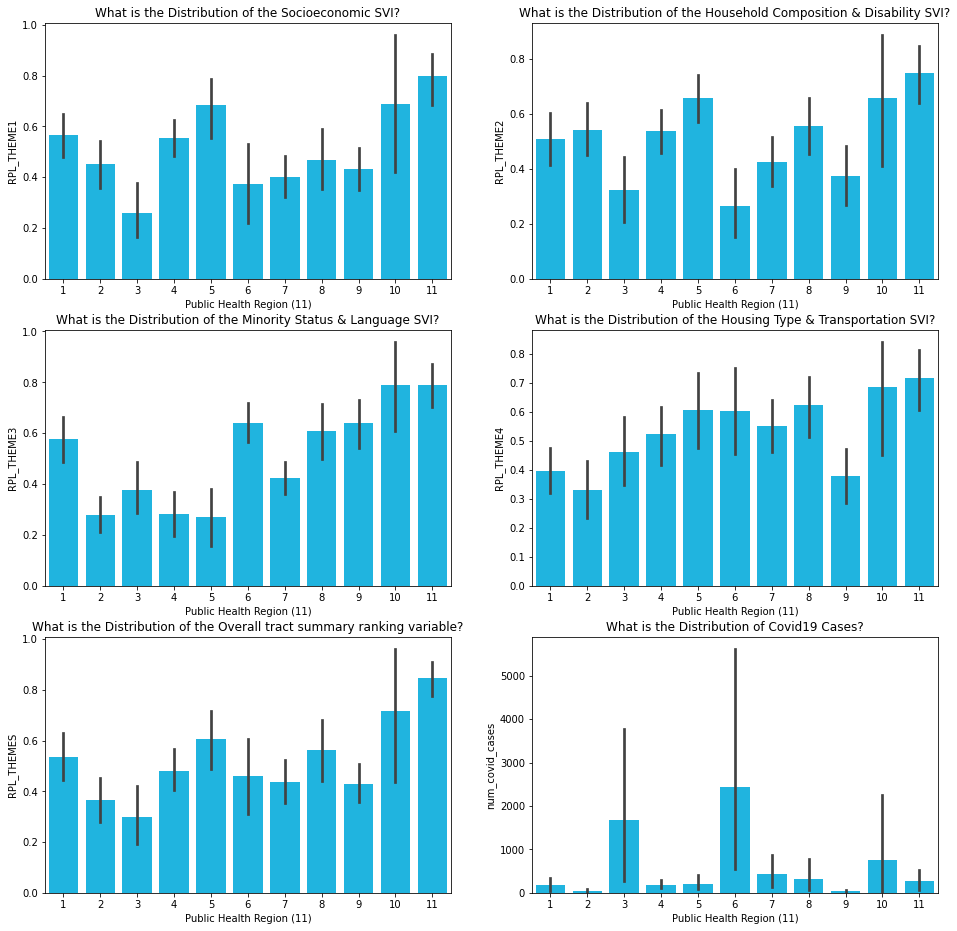

In [11]:
#function to plot our variables from above by region
explore.plot_region_barplots(df)

In [12]:
#subset the 11 regions into their own df using the get_all_region_subsets_for_distro function
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_distro(df)

### Distribution Plots for Region 1

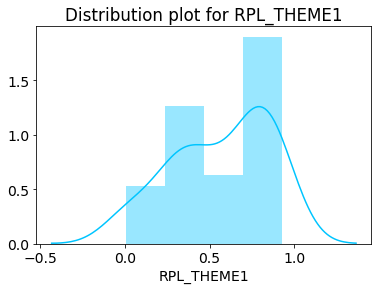

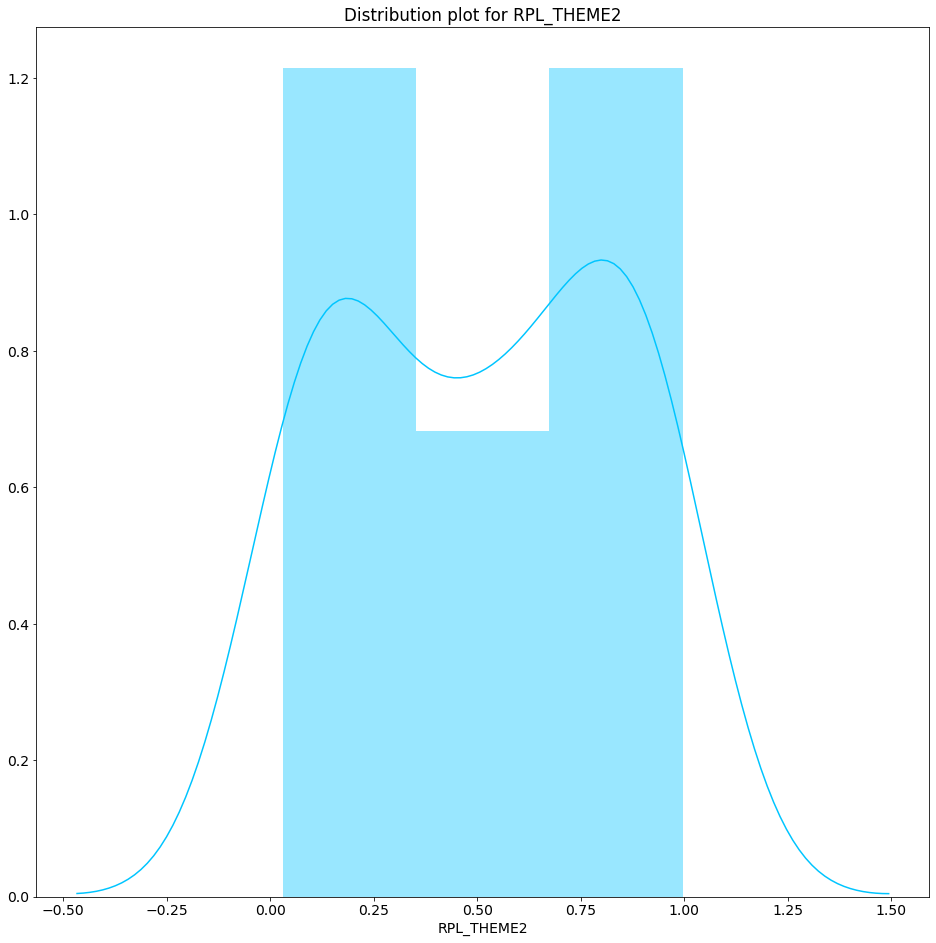

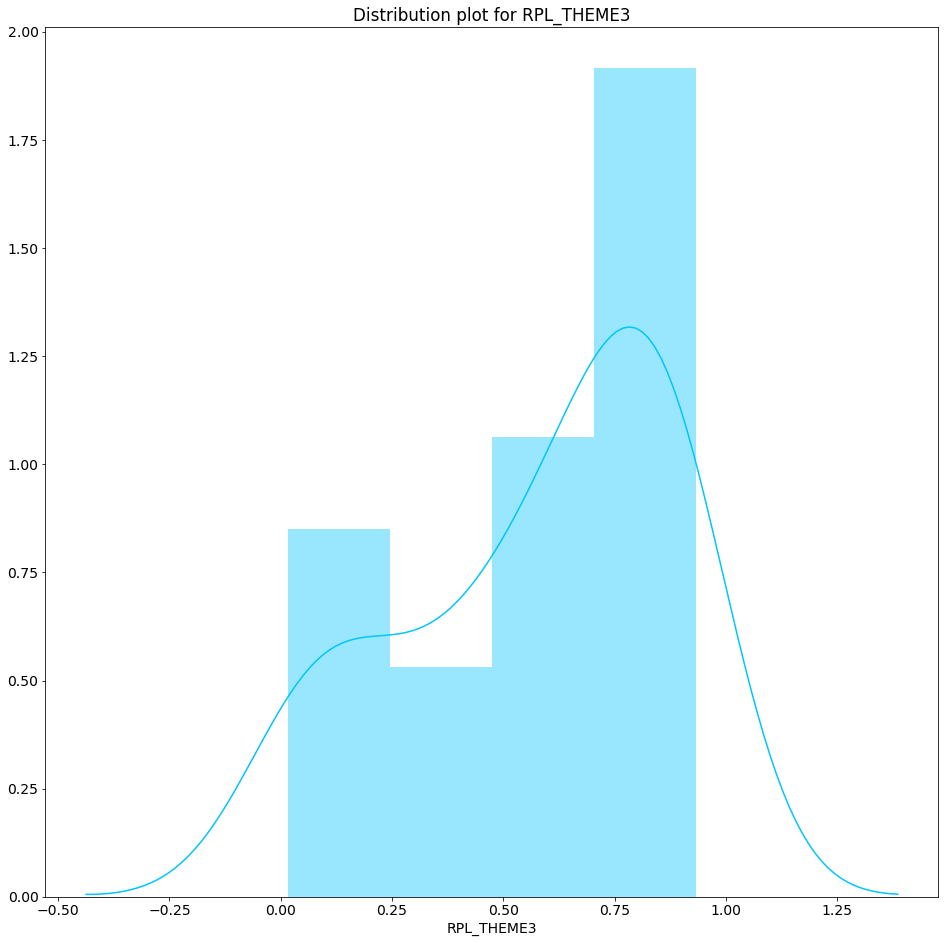

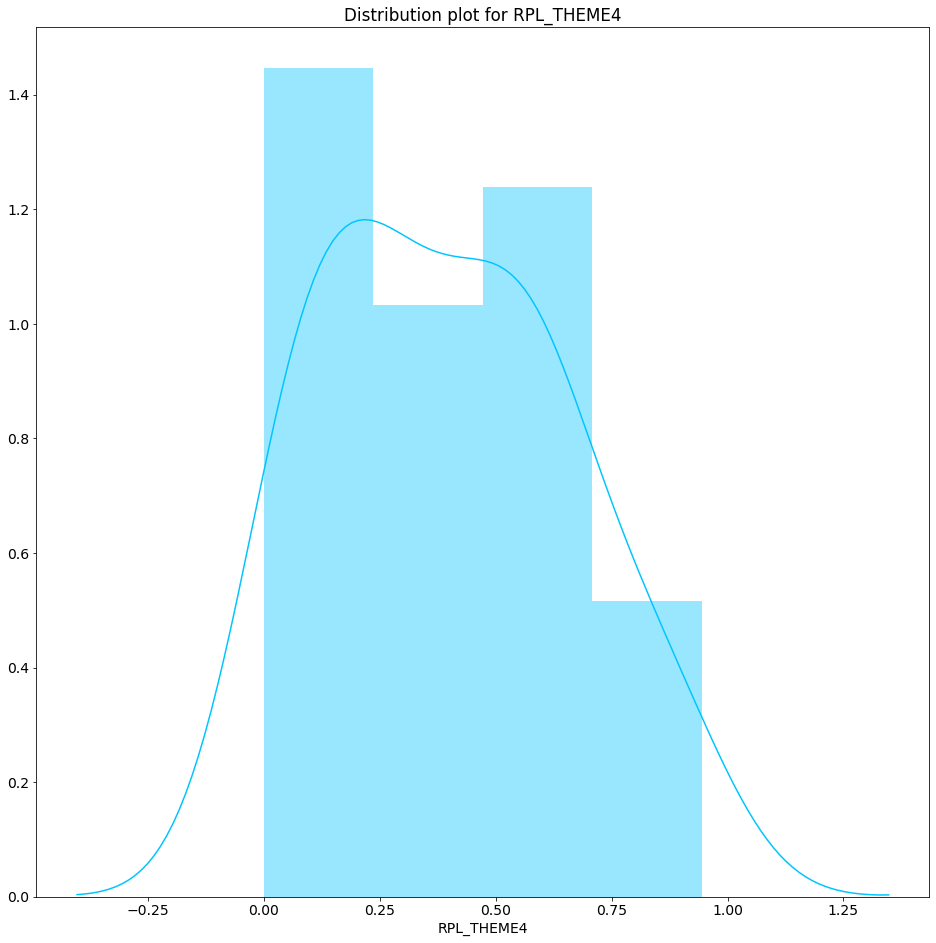

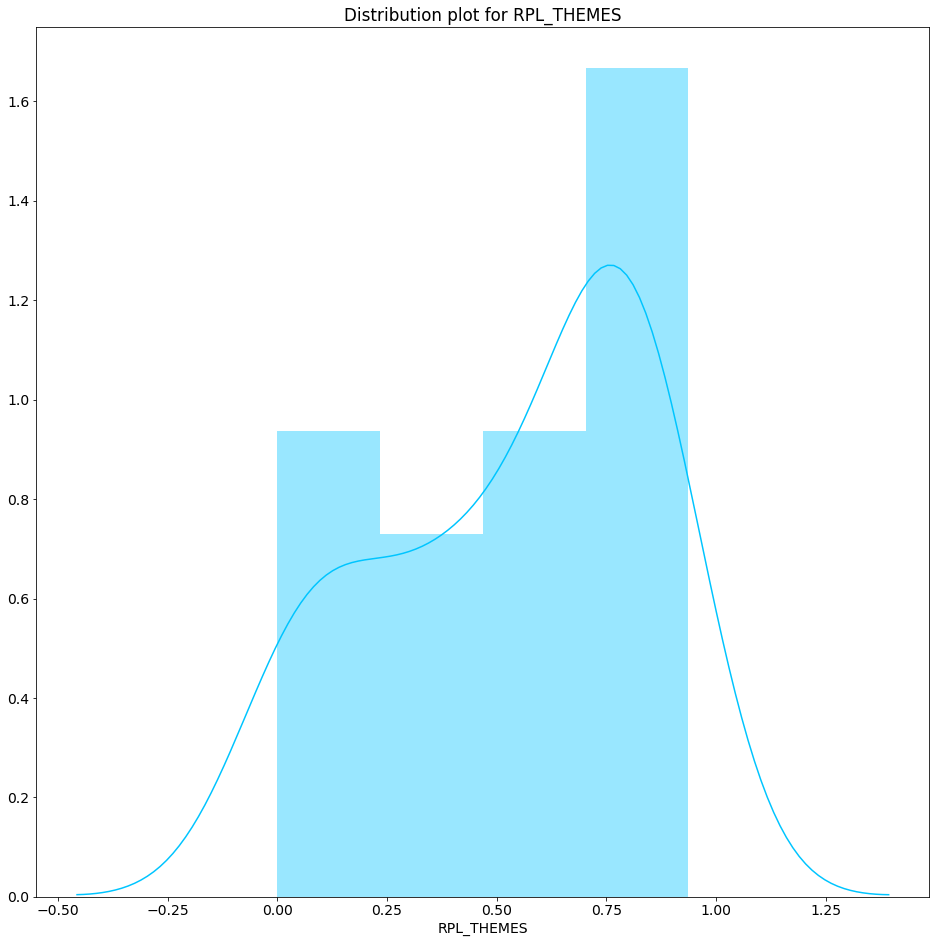

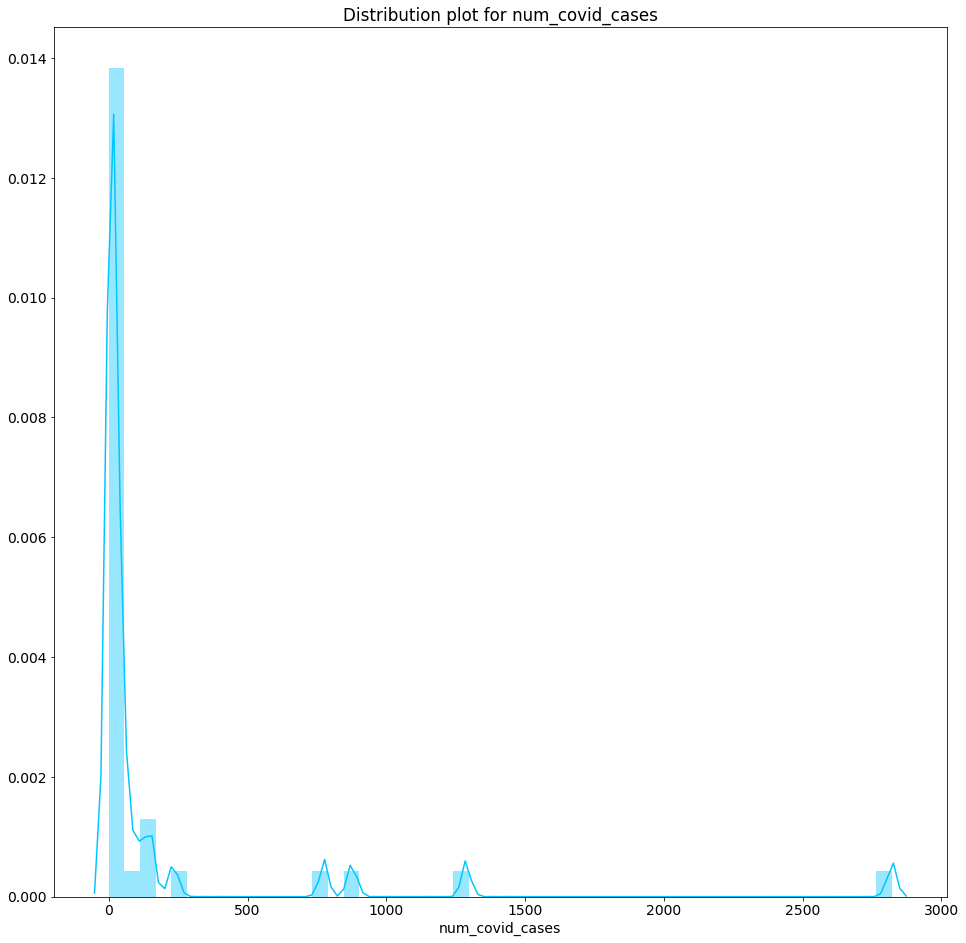

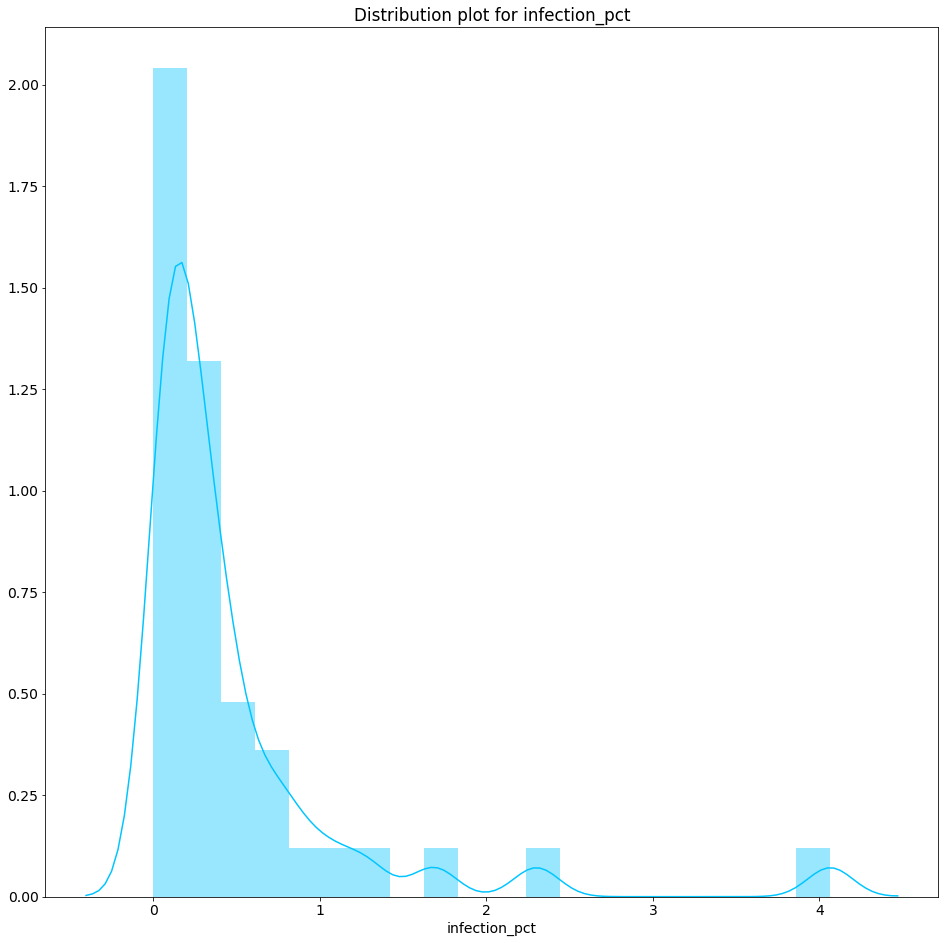

In [13]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_1)

### Distribution Plots for Region 2

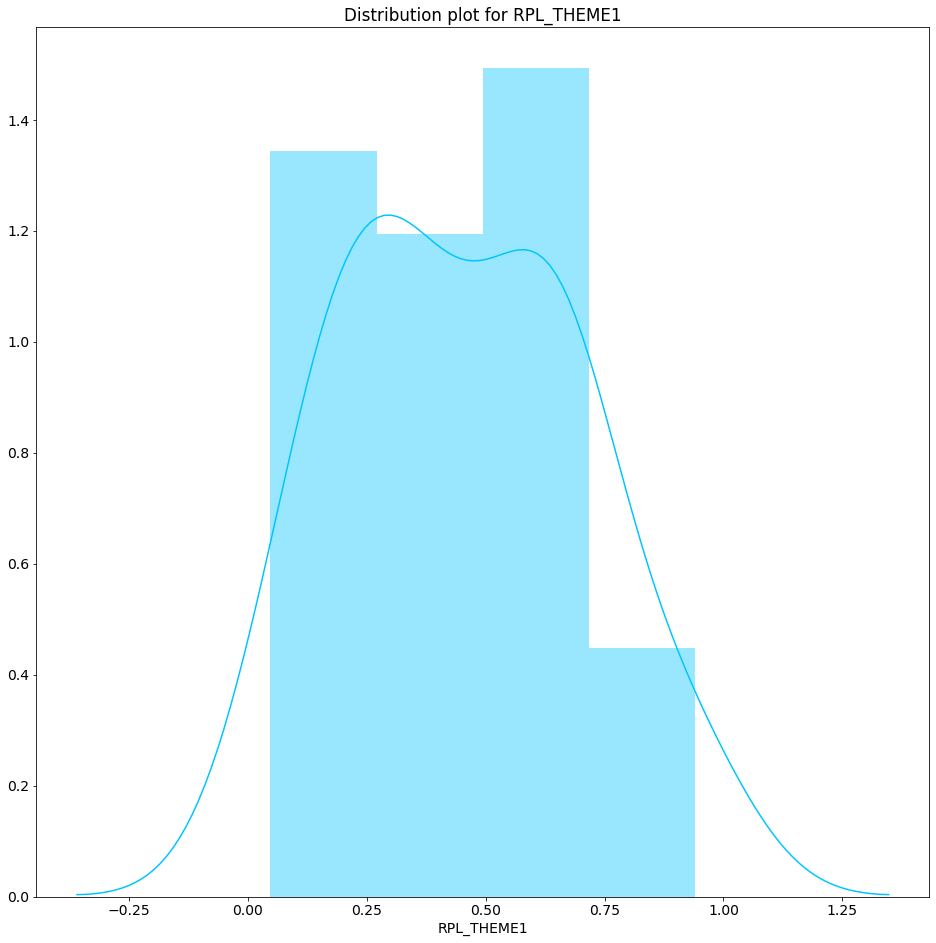

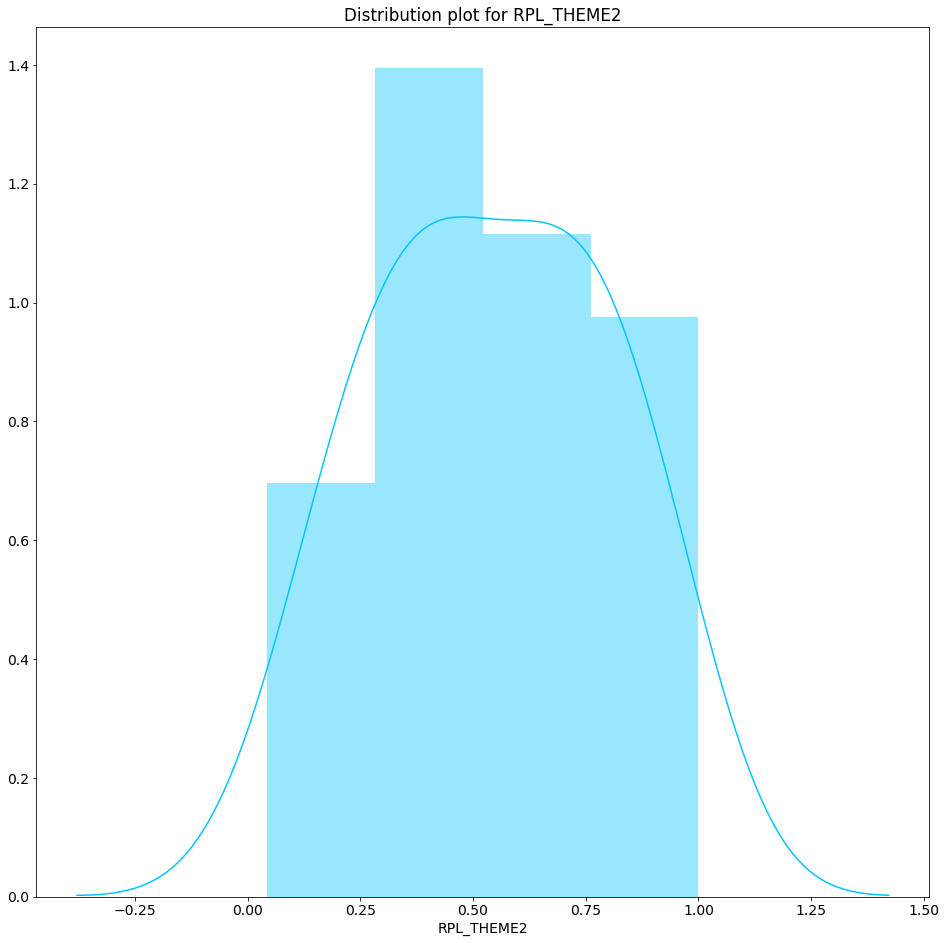

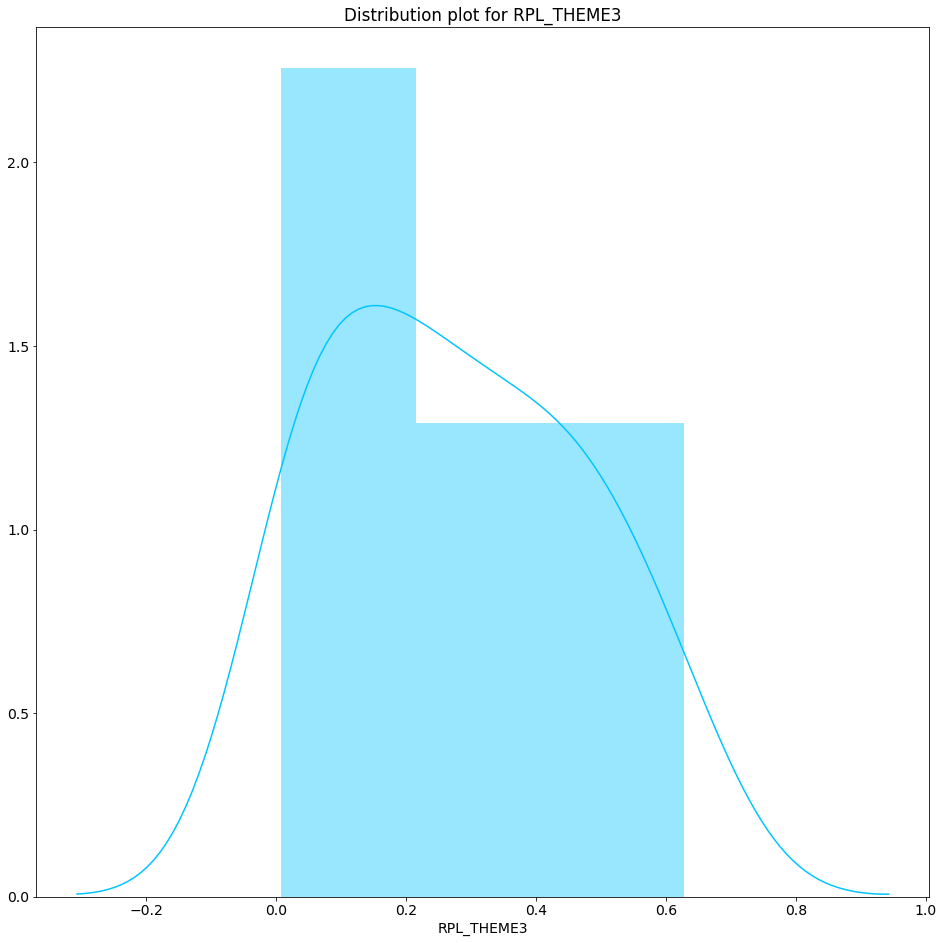

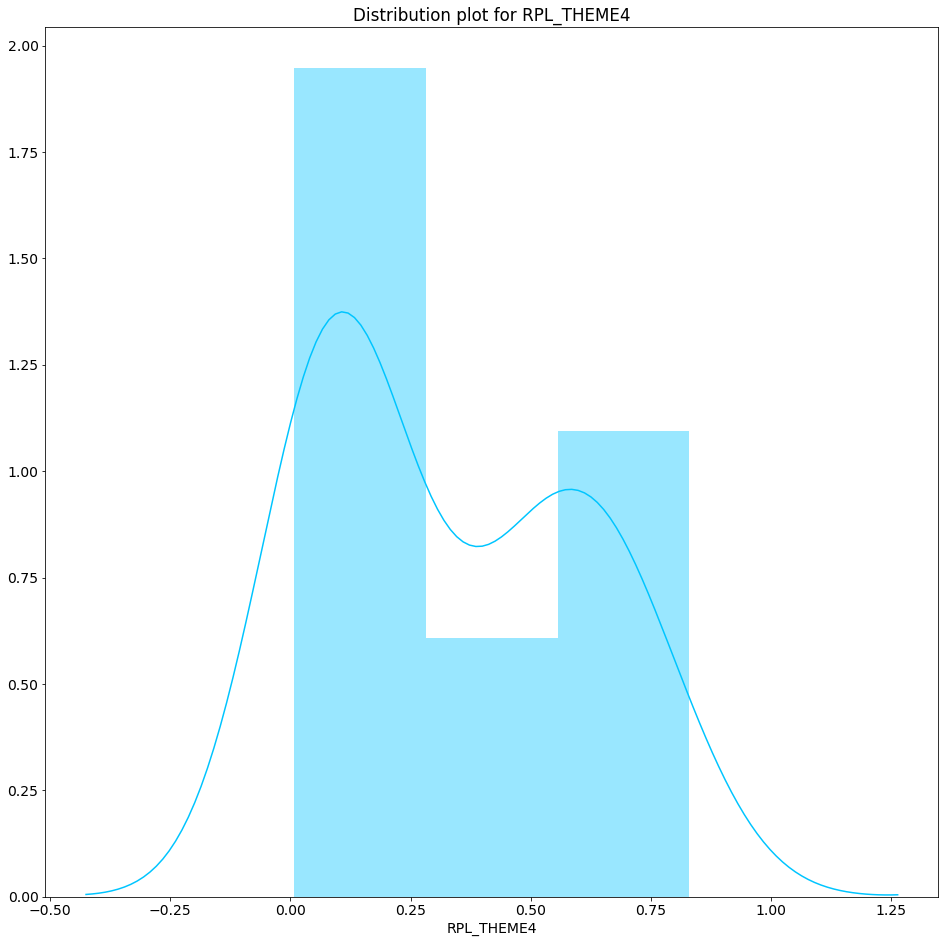

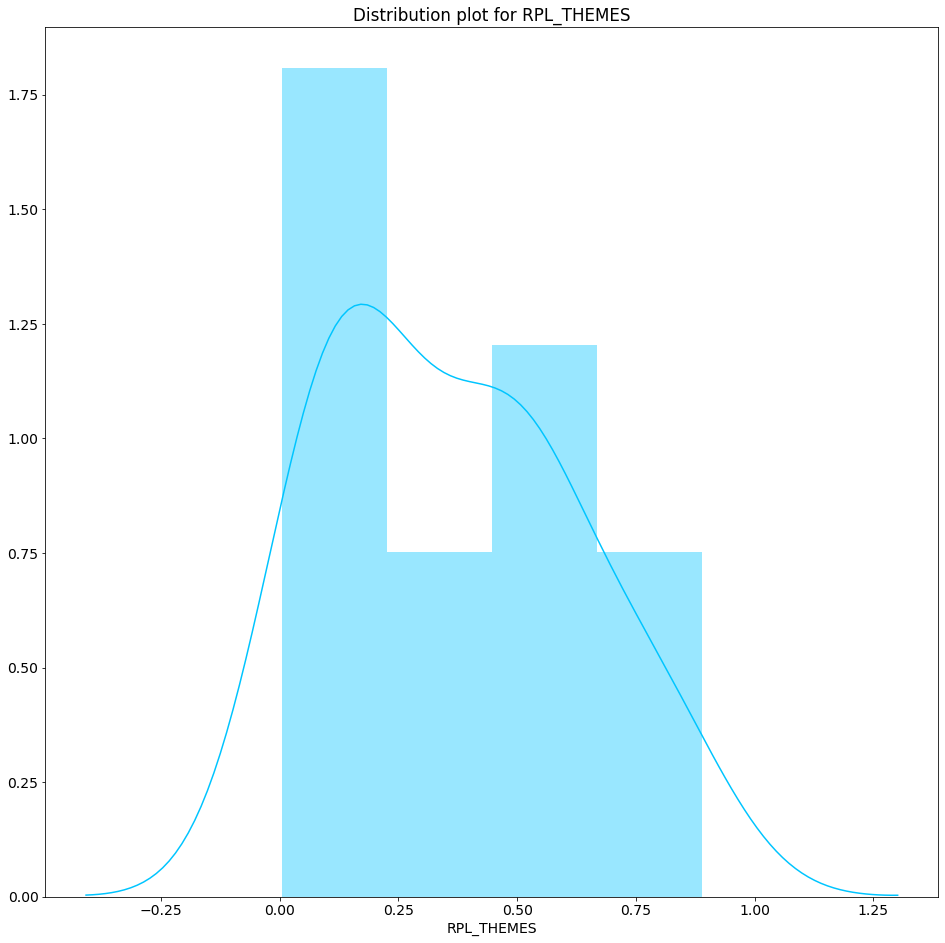

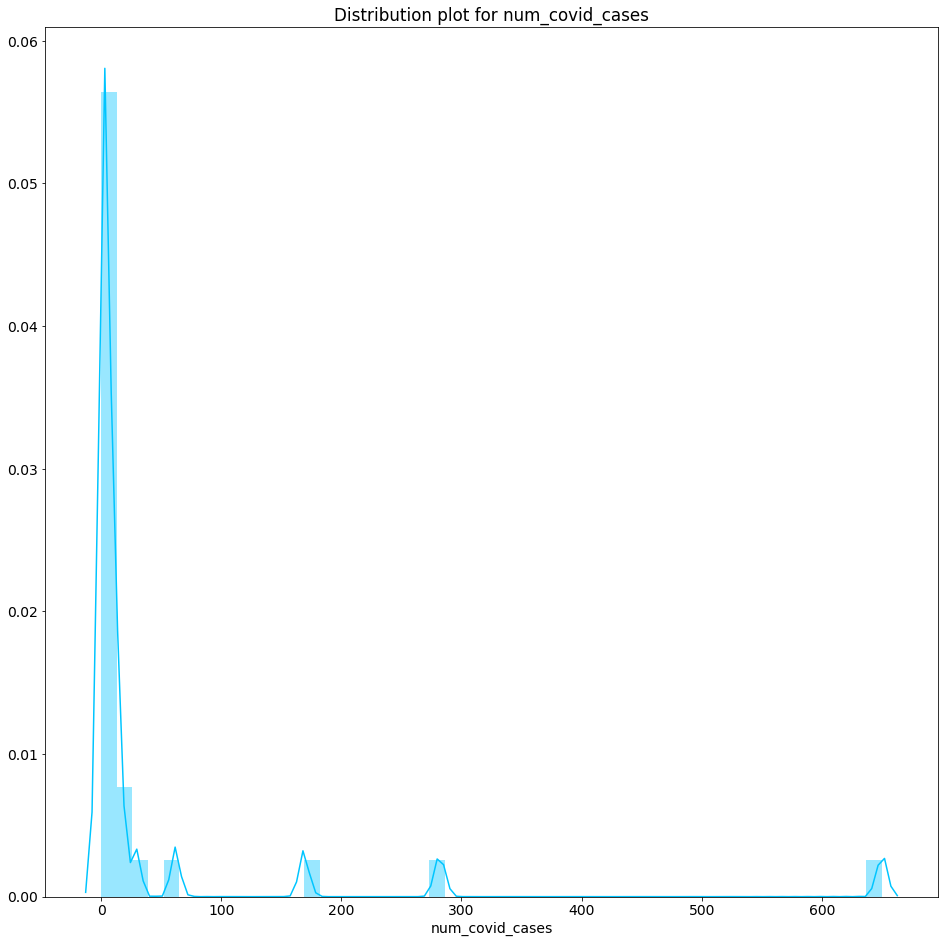

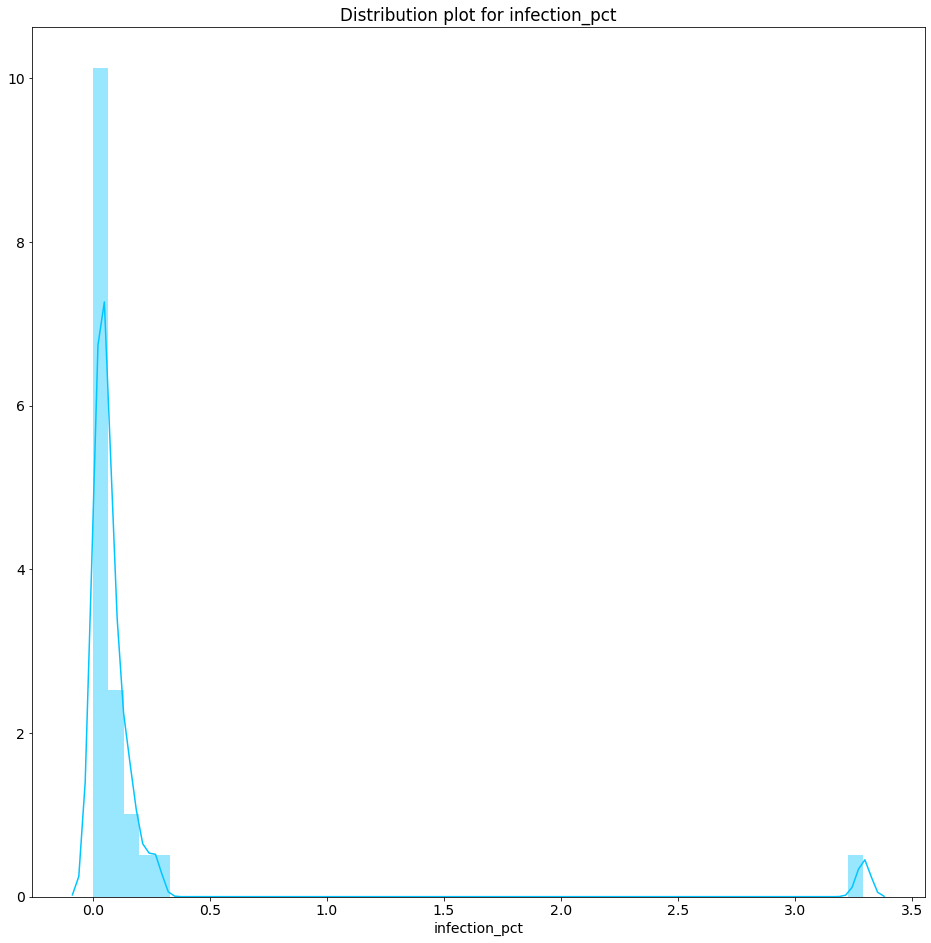

In [14]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_2)

### Distribution Plots for Region 3

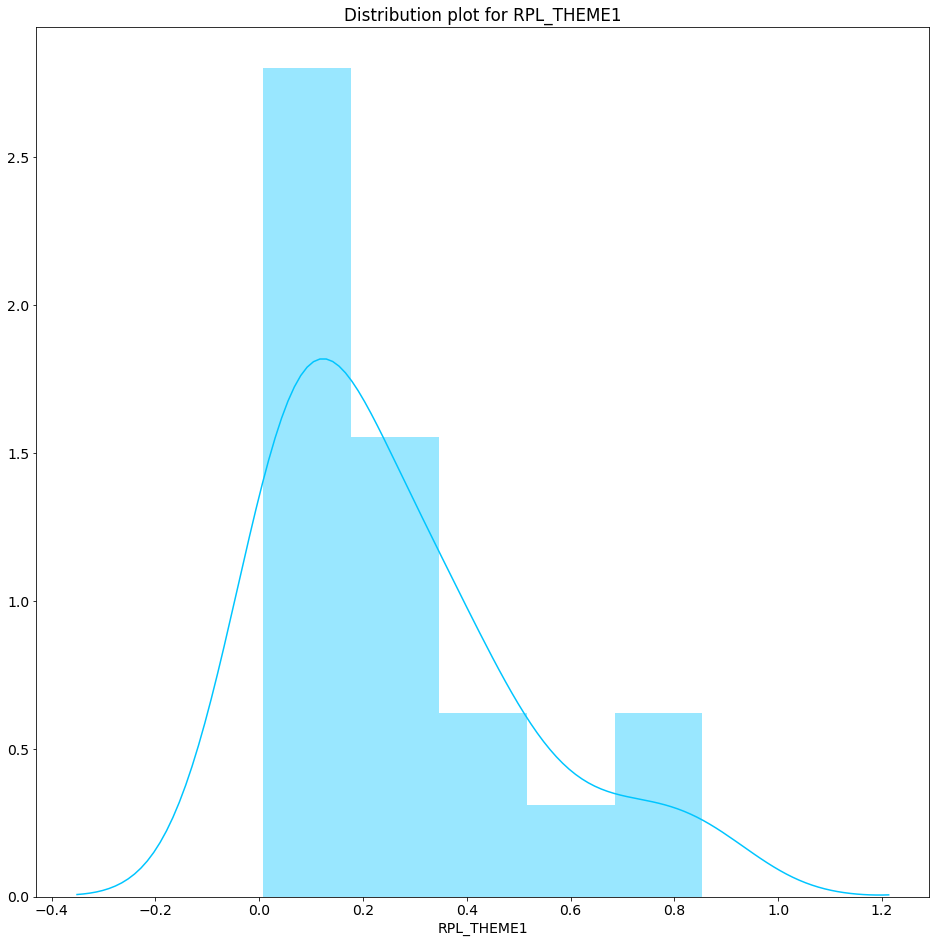

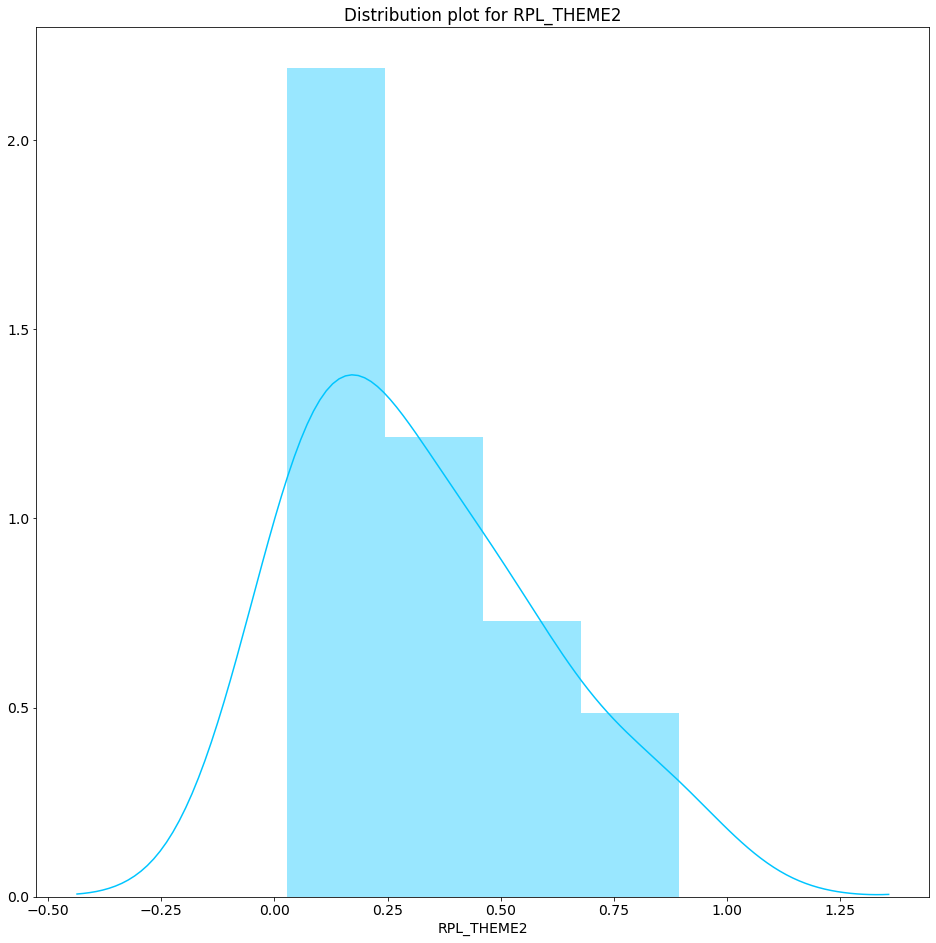

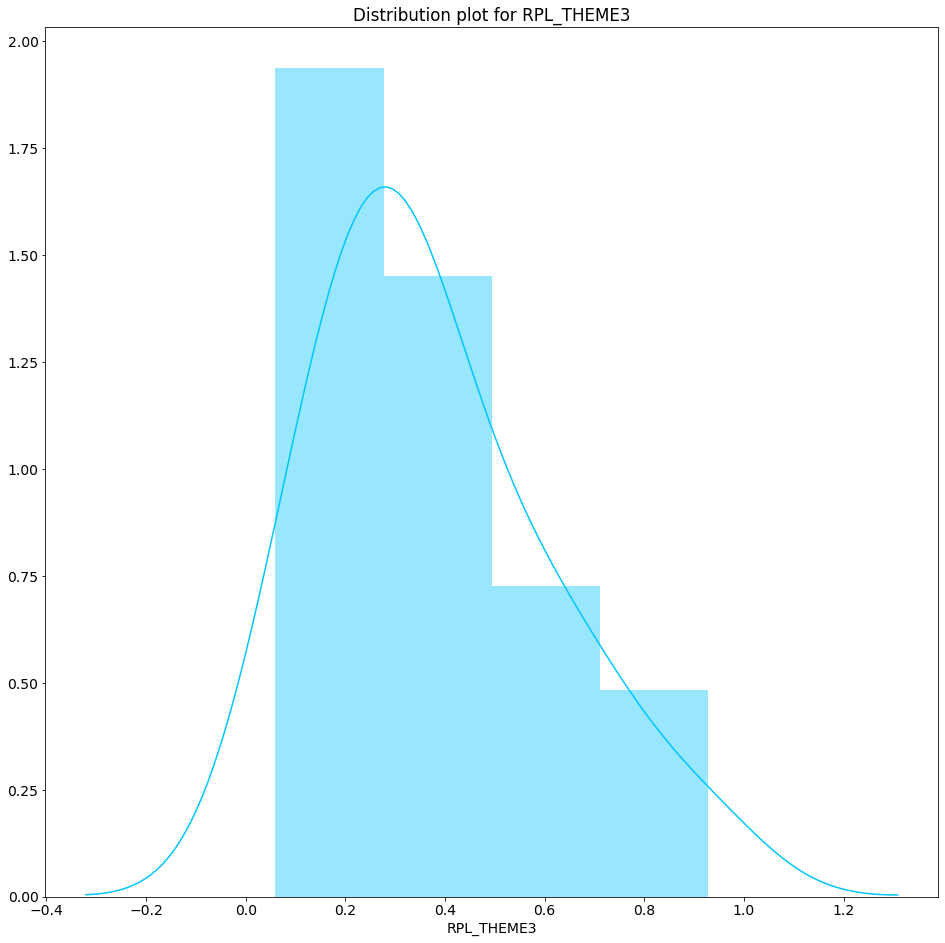

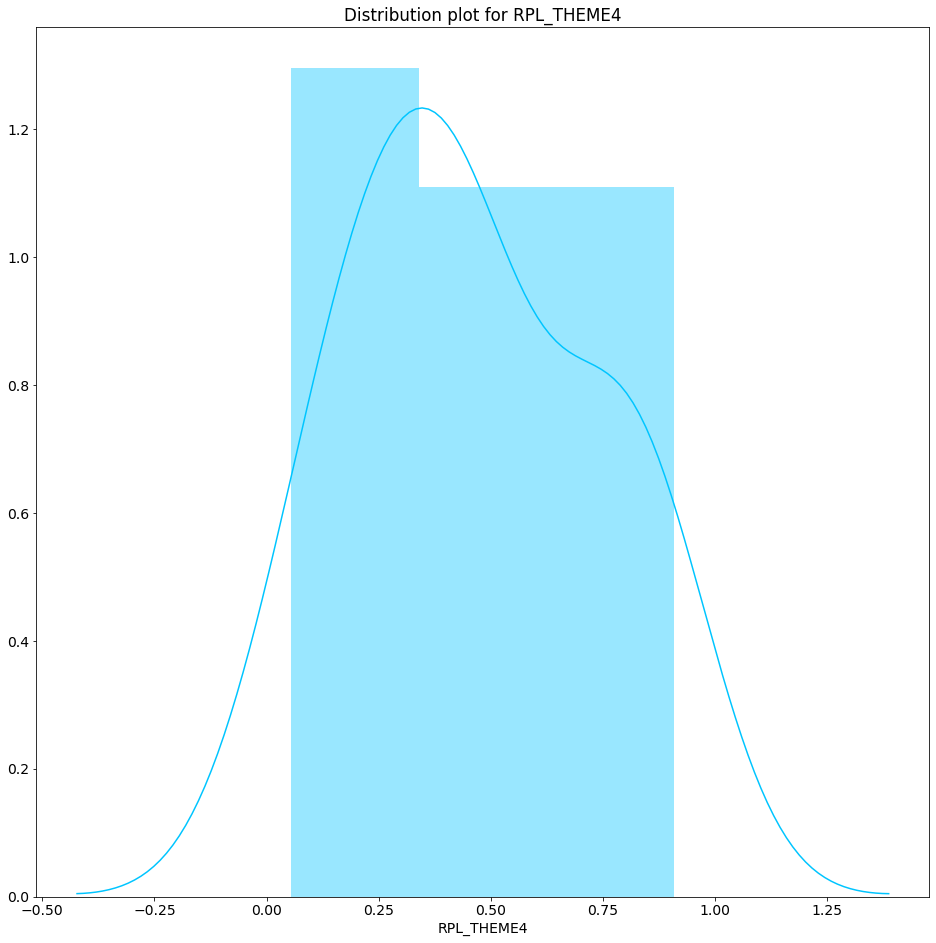

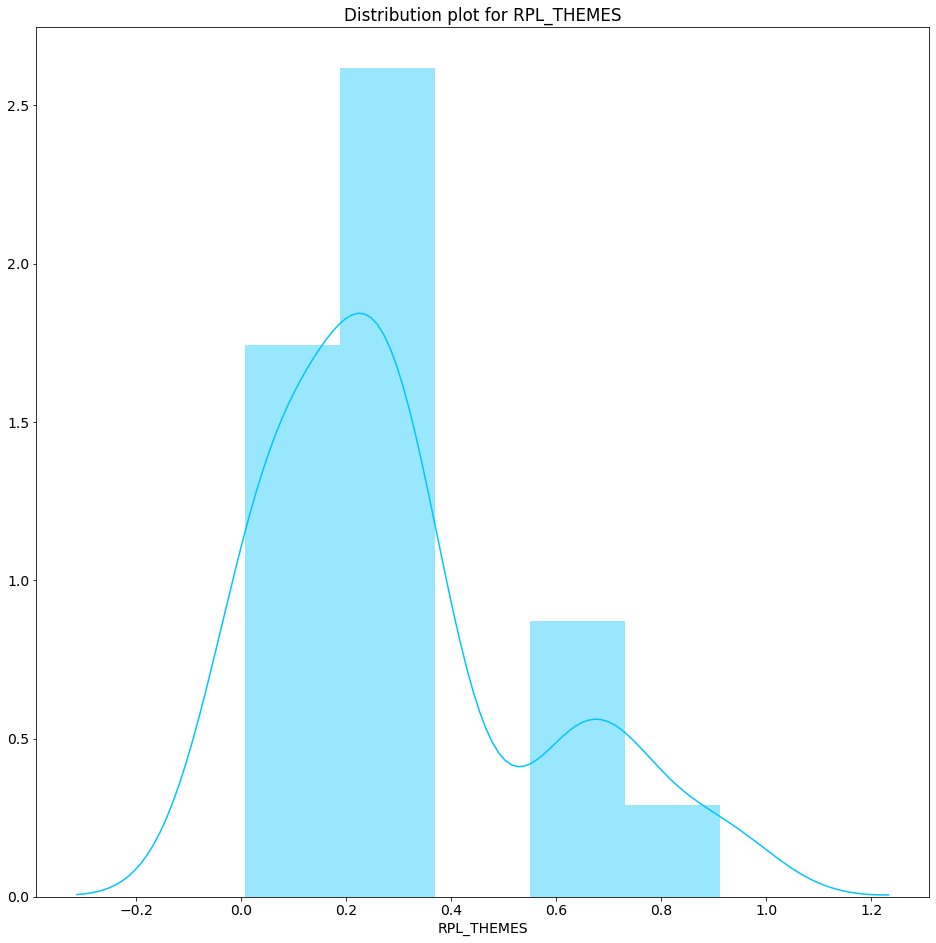

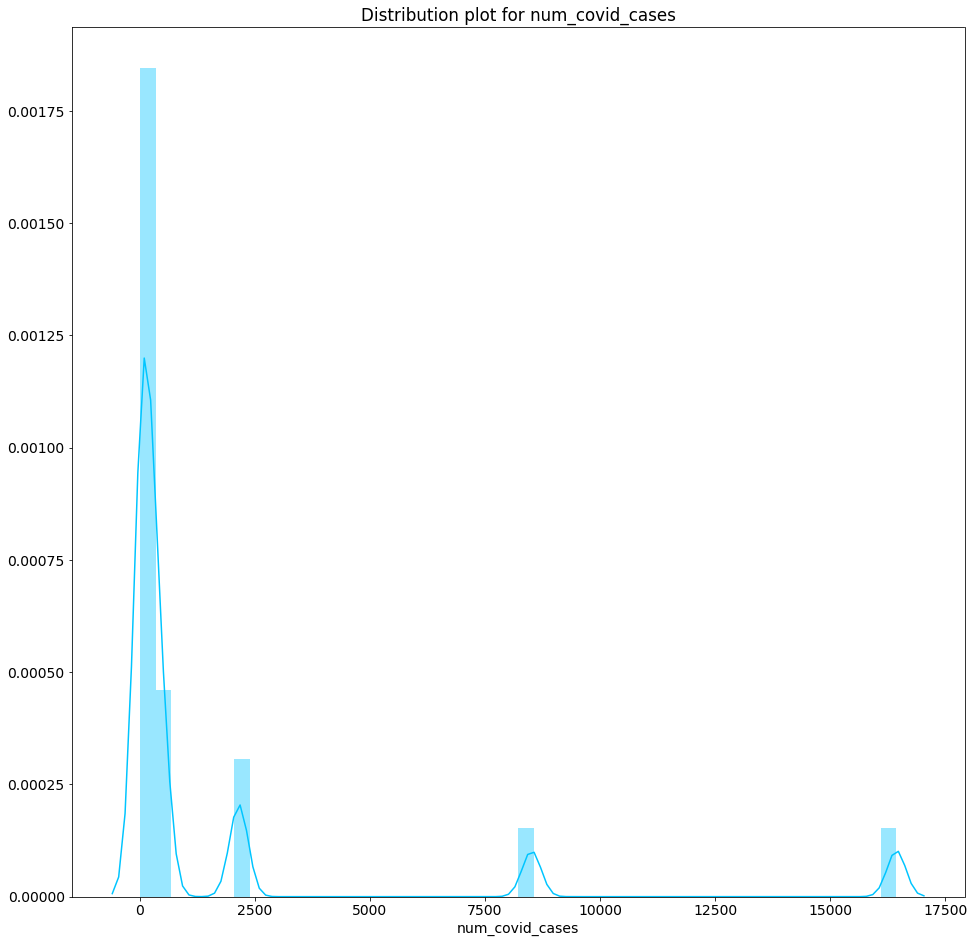

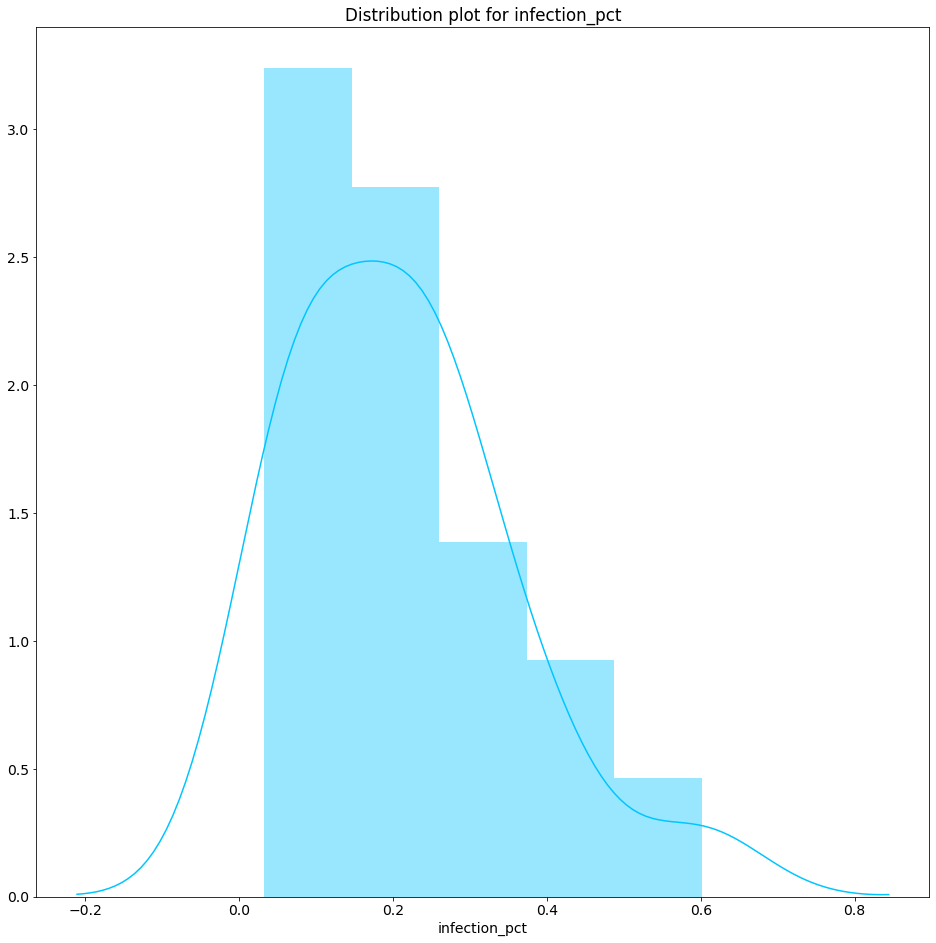

In [15]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_3)

### Distribution Plots for Region 4

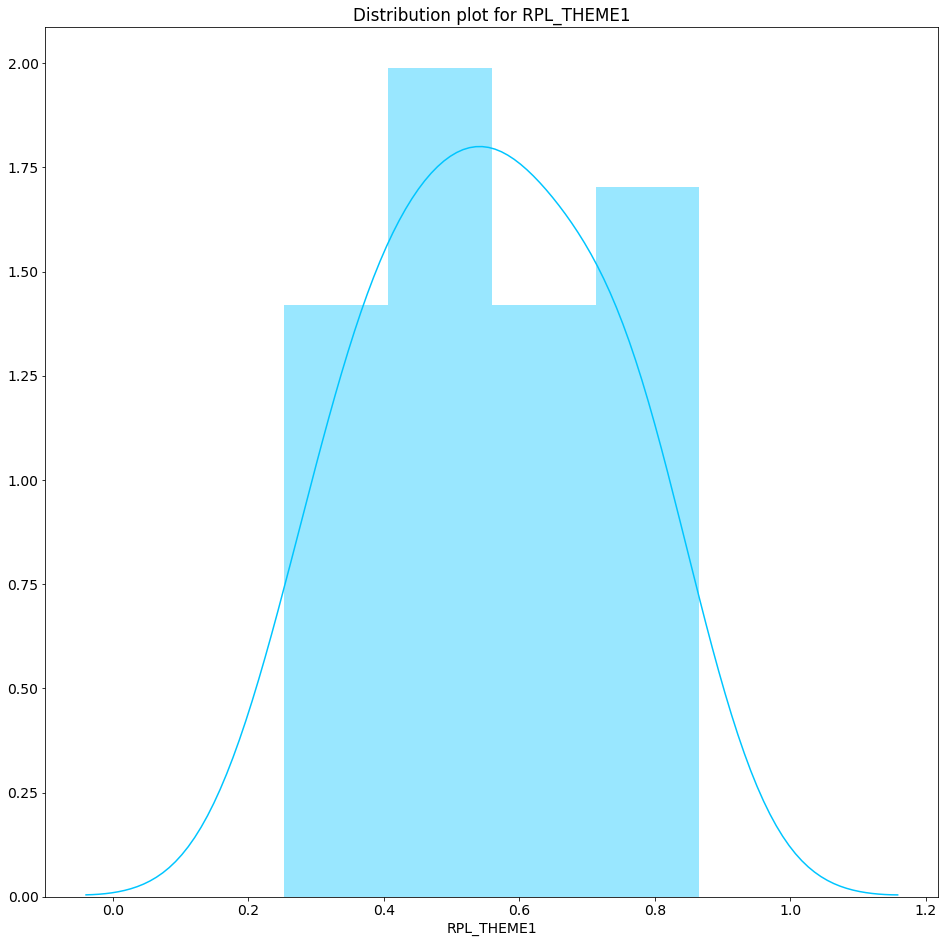

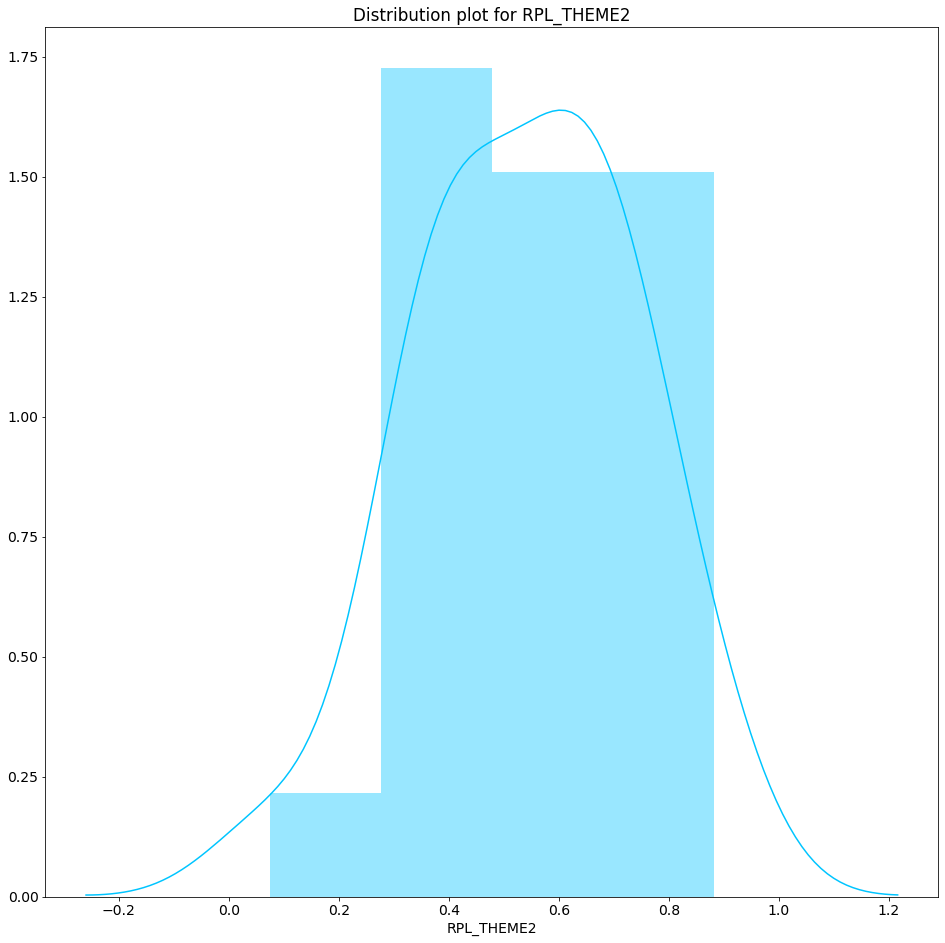

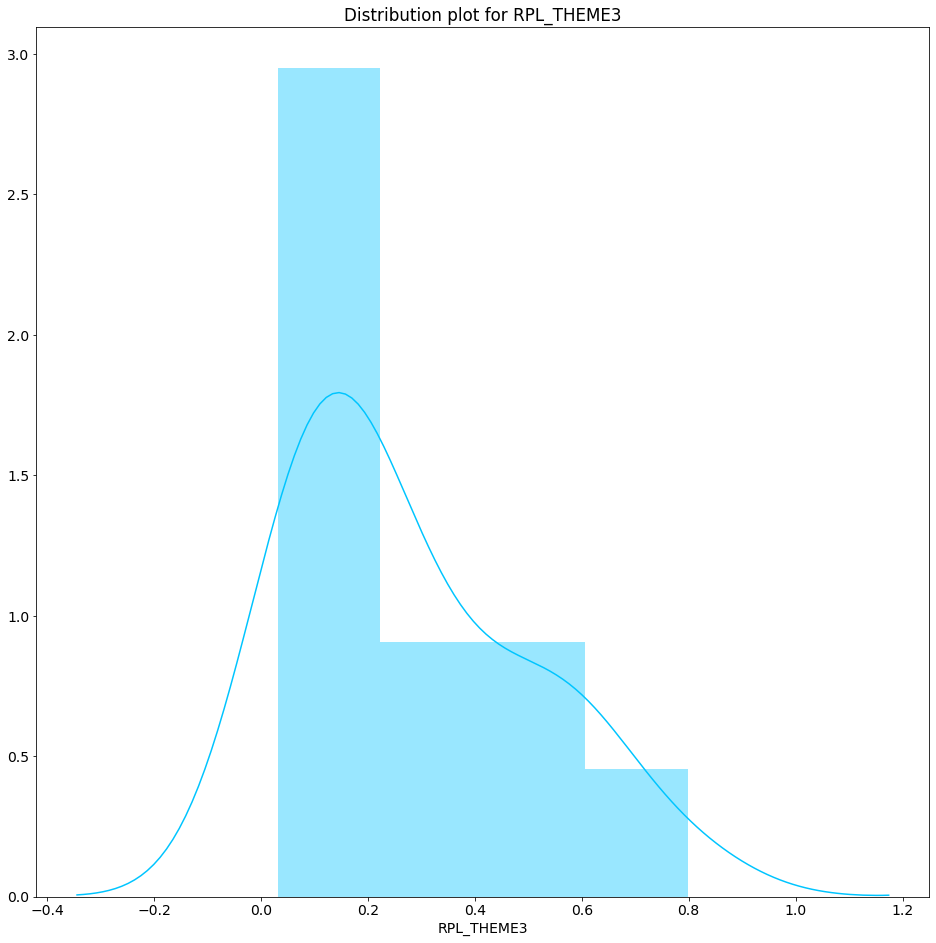

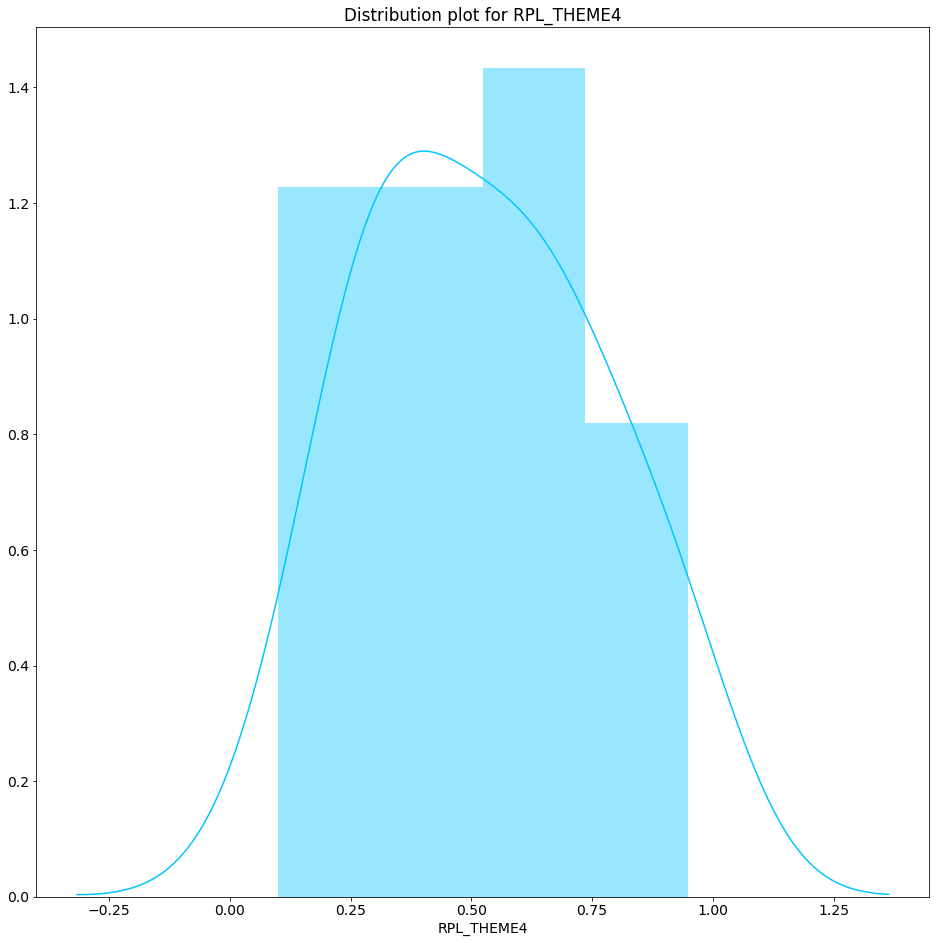

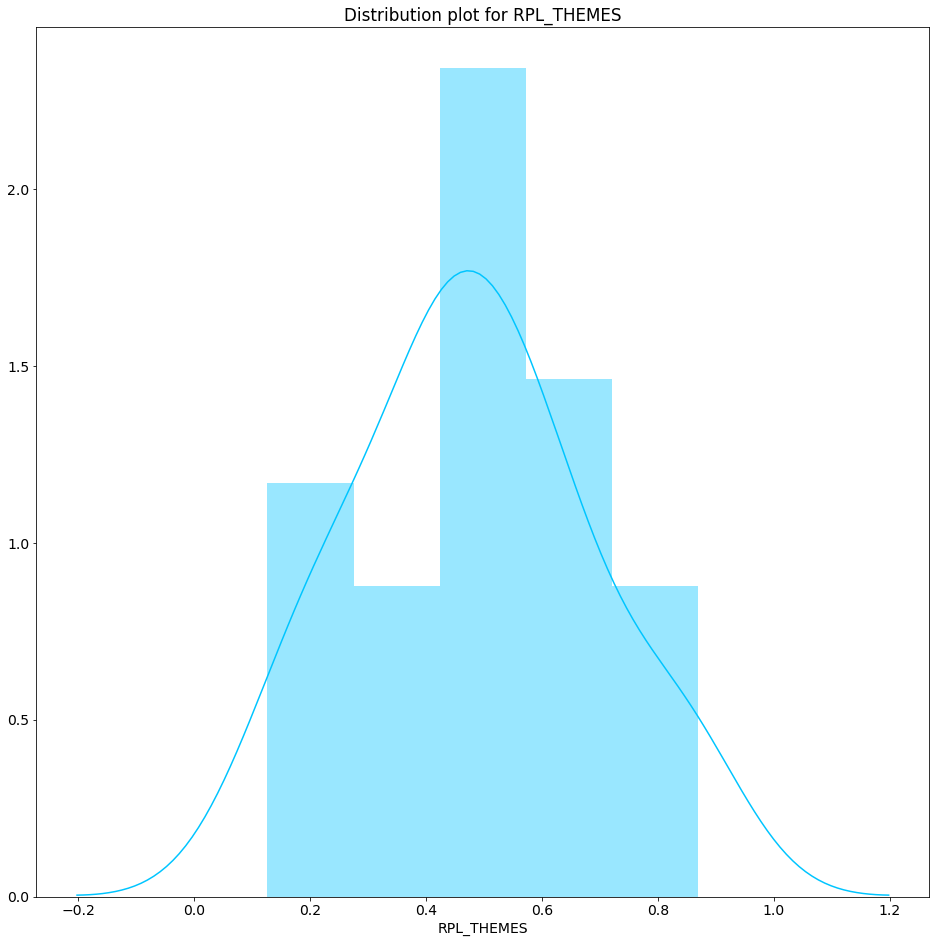

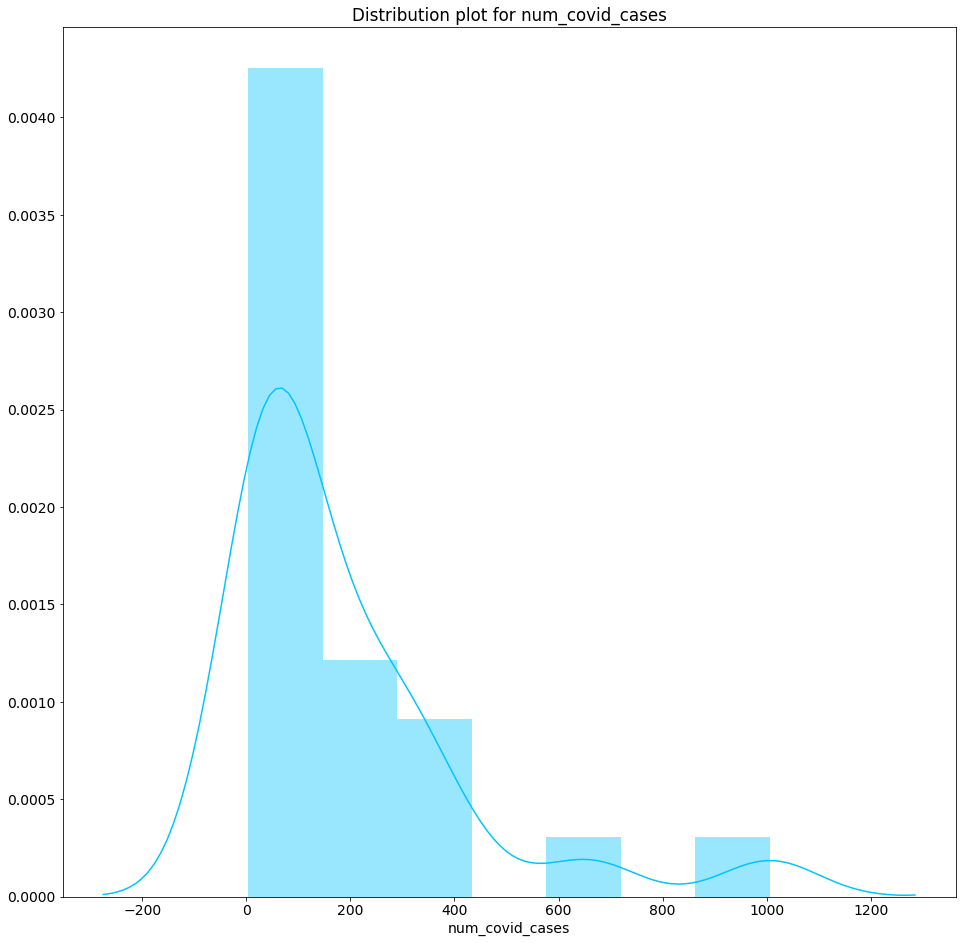

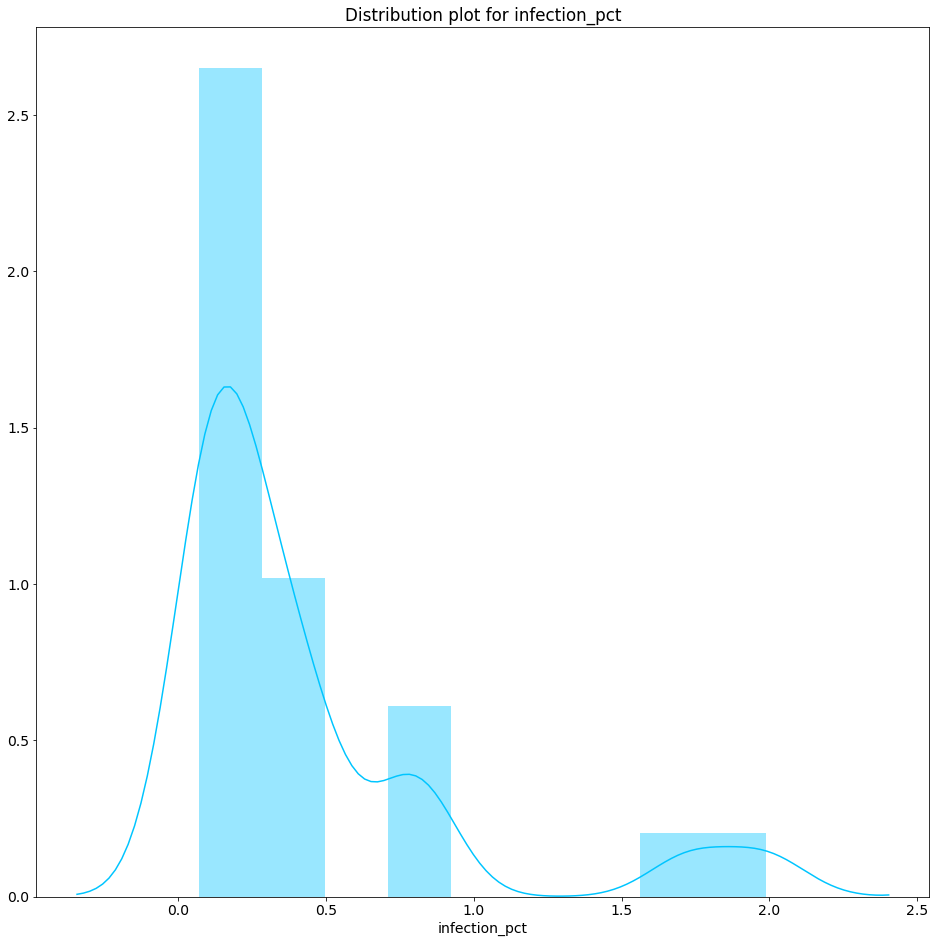

In [16]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_4)

### Distribution Plots for Region 5

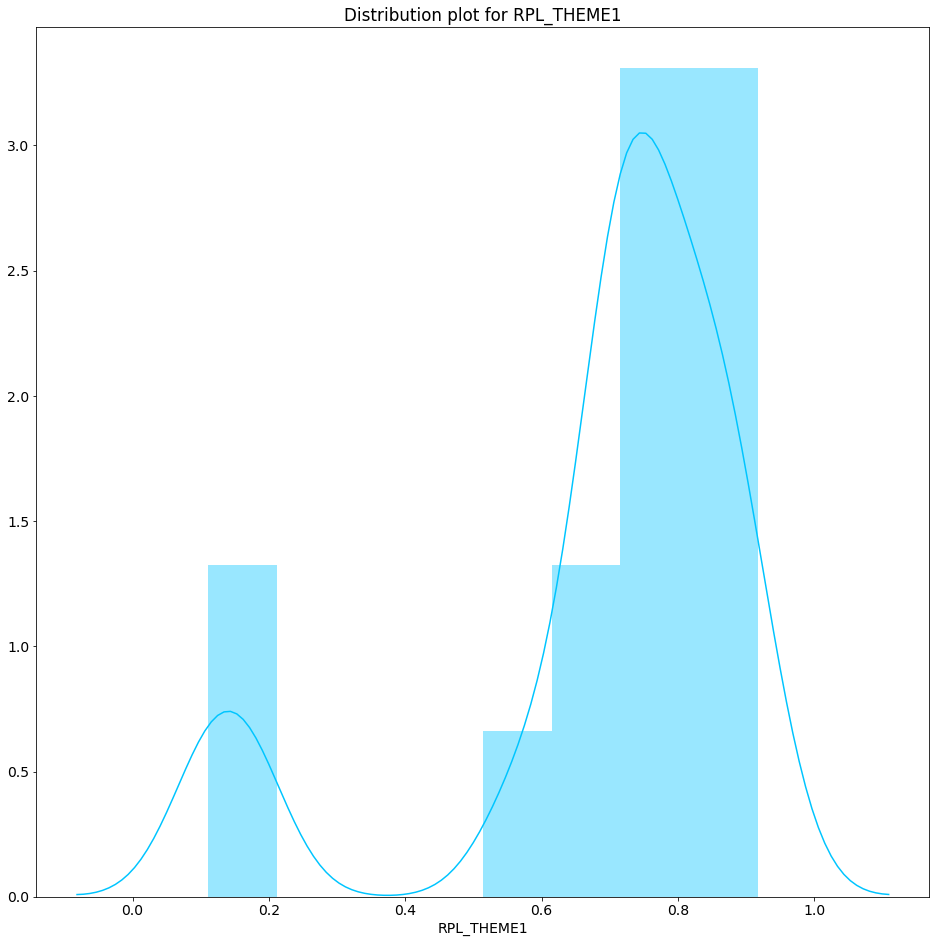

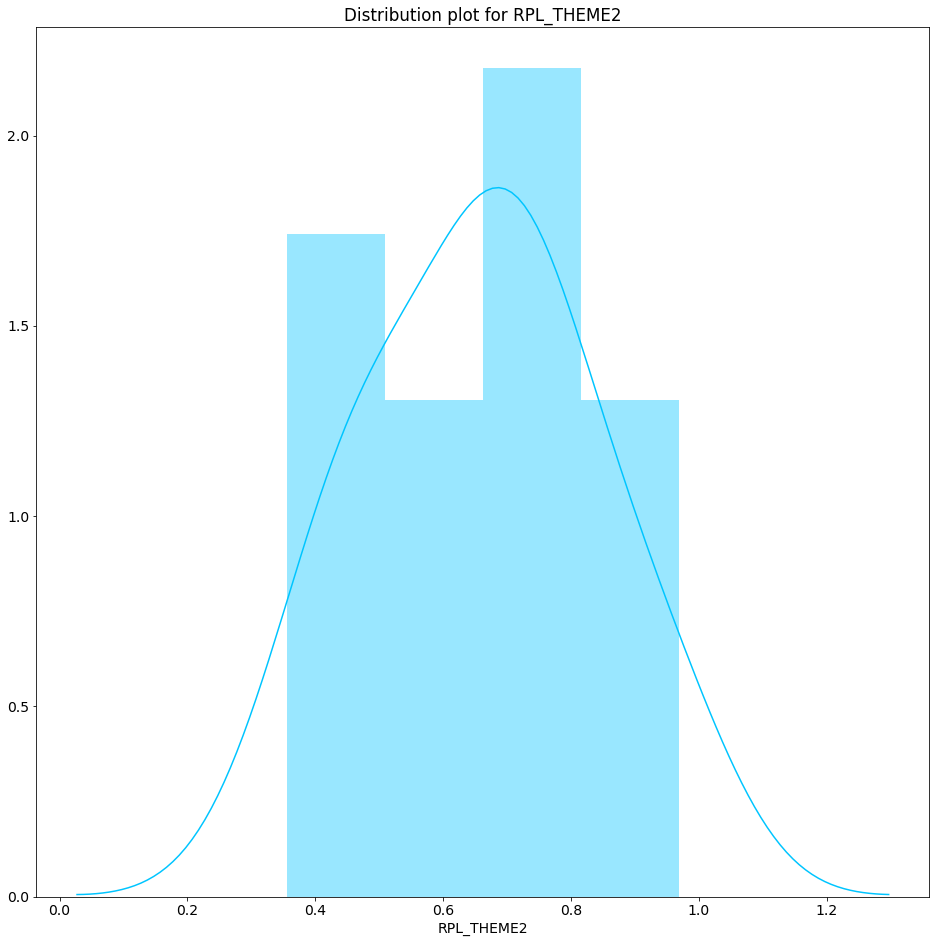

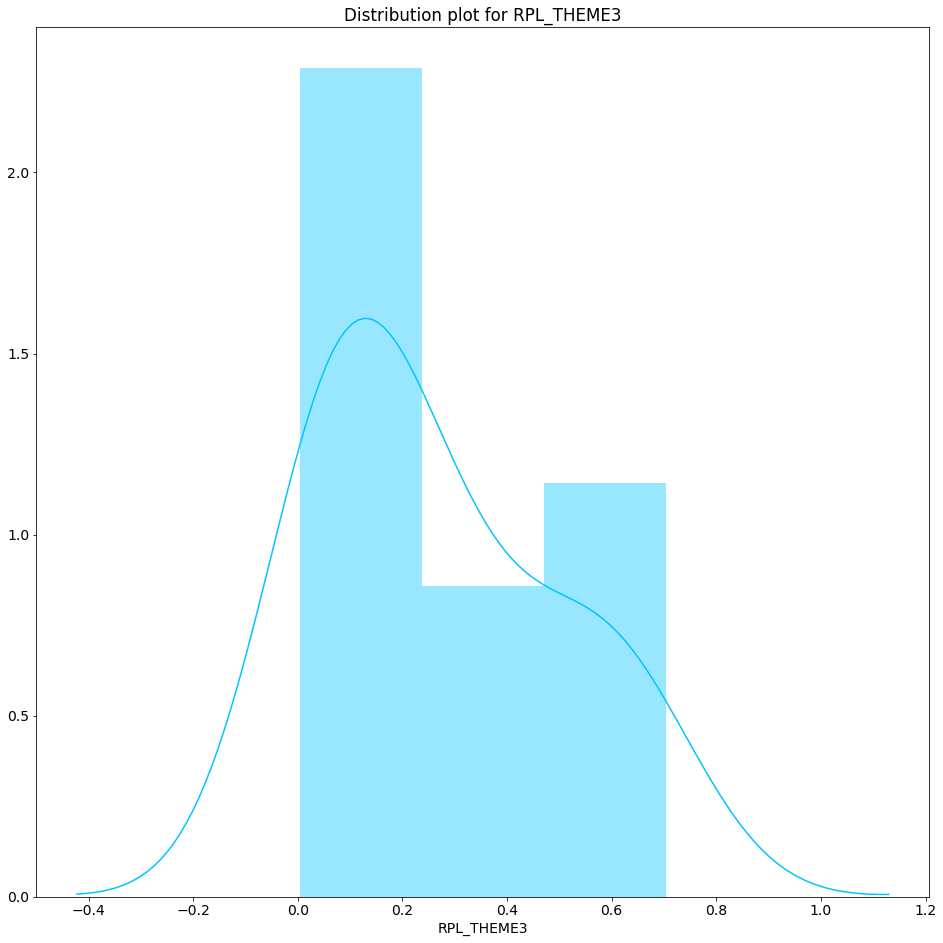

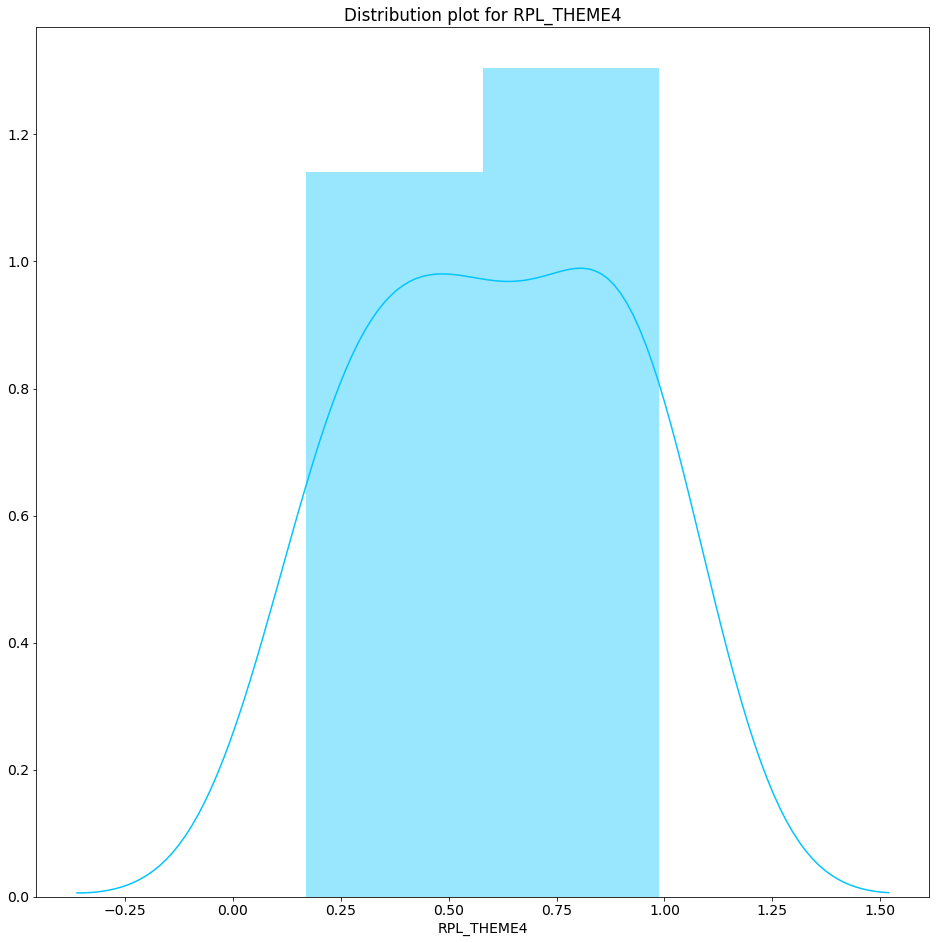

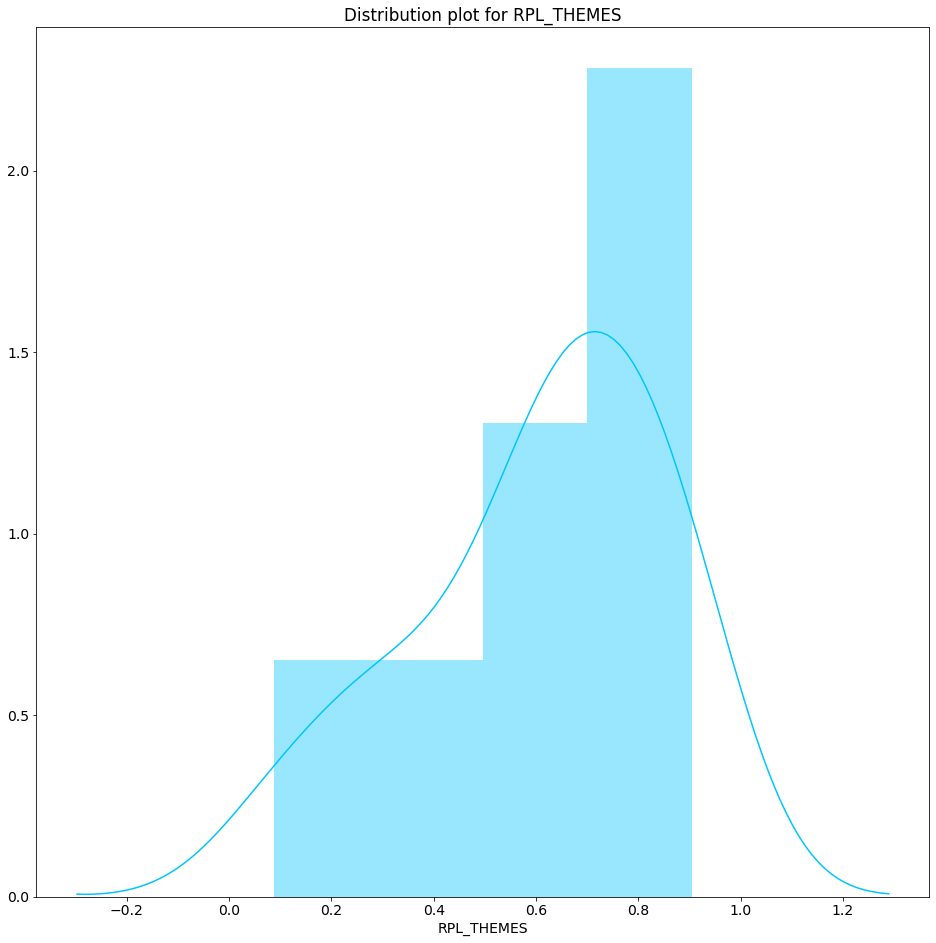

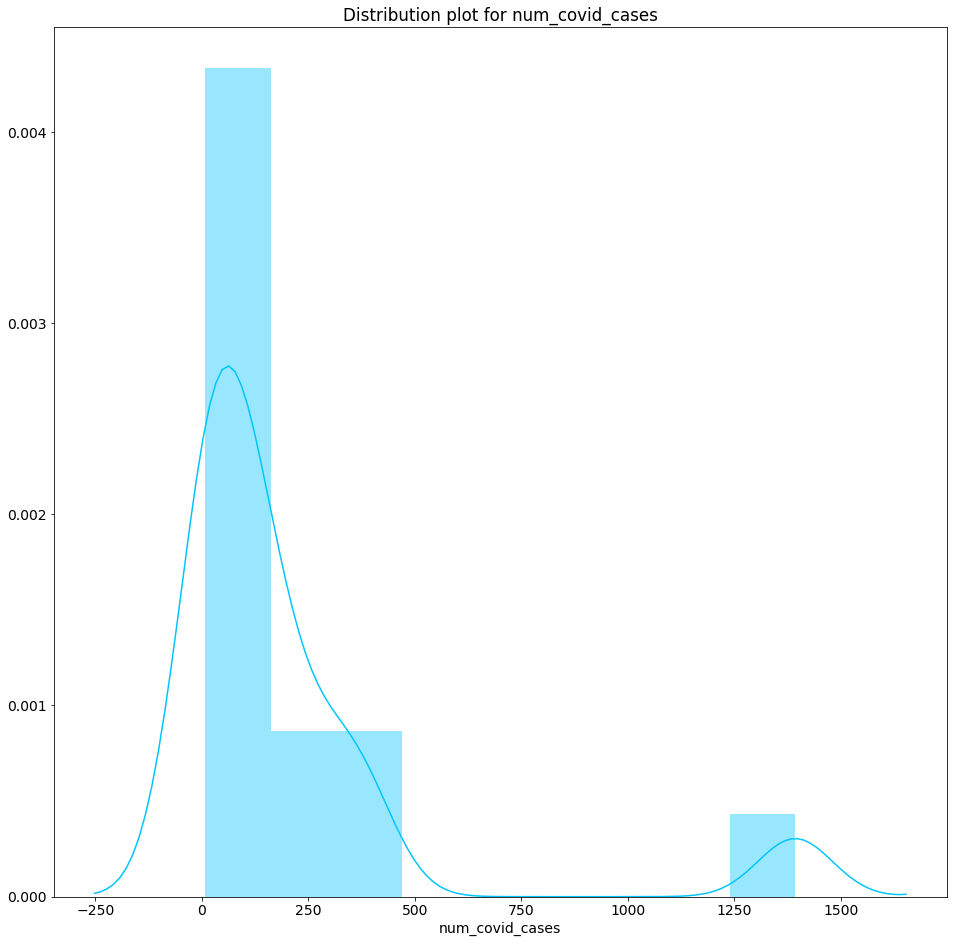

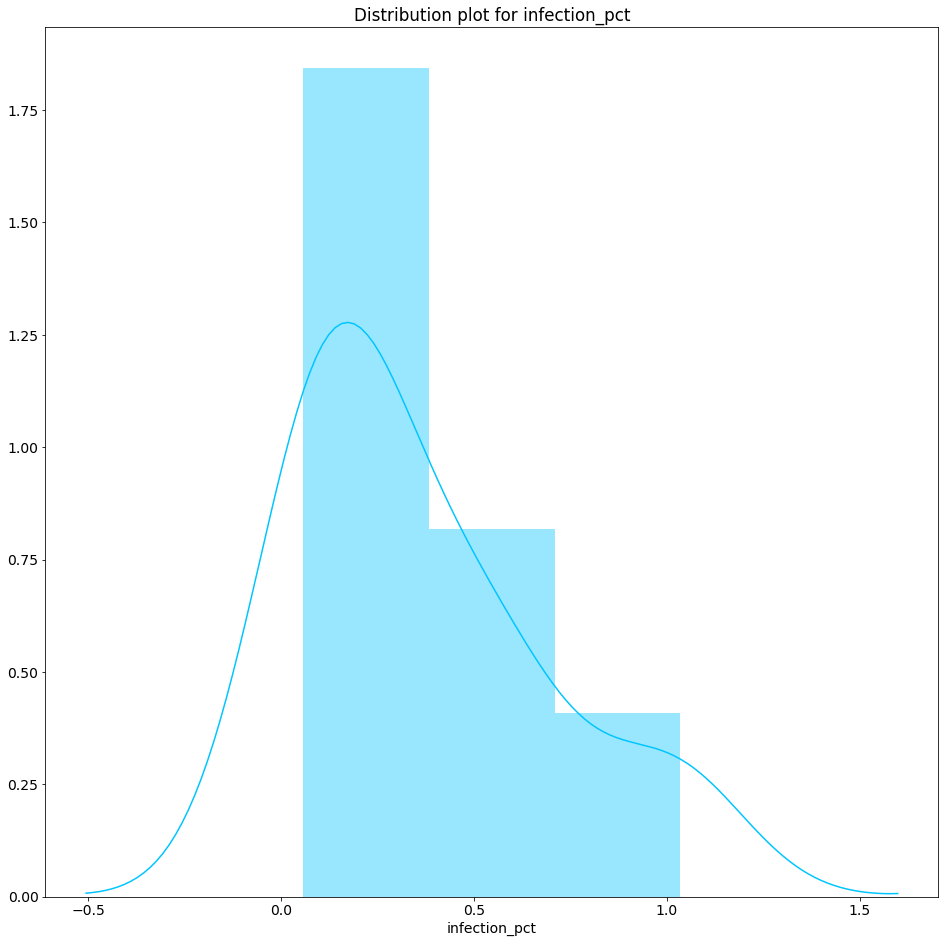

In [17]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_5)

### Distribution Plots for Region 6

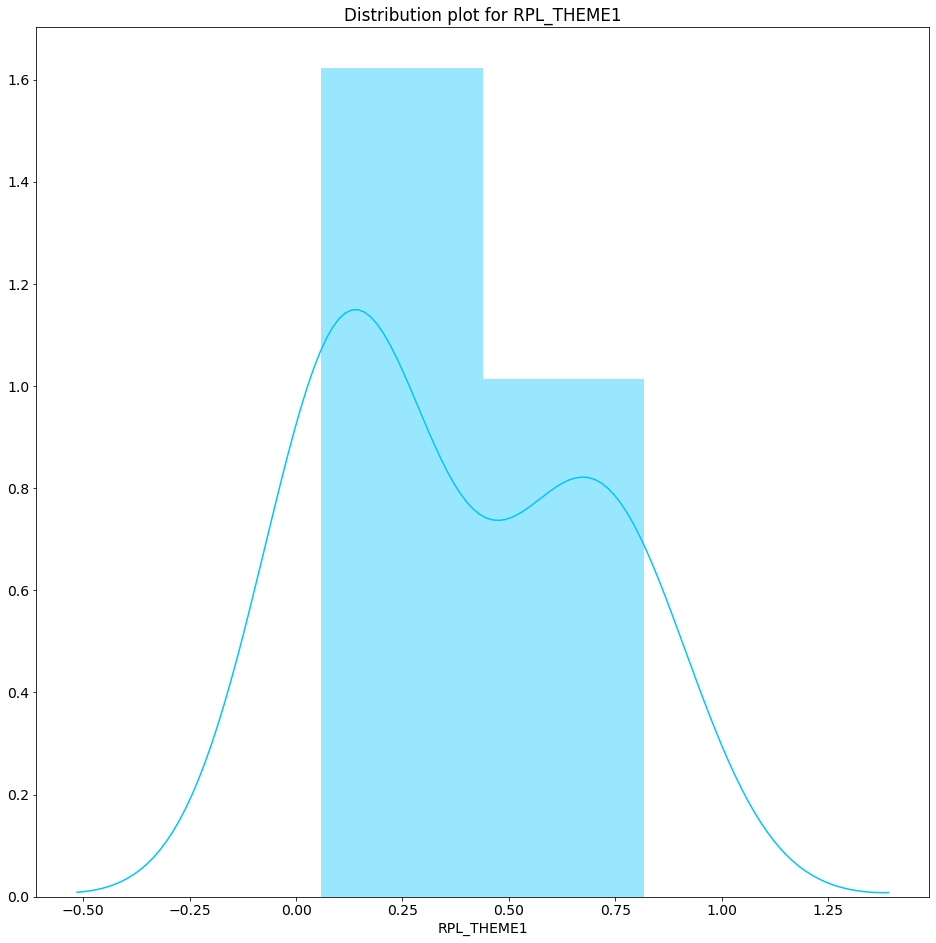

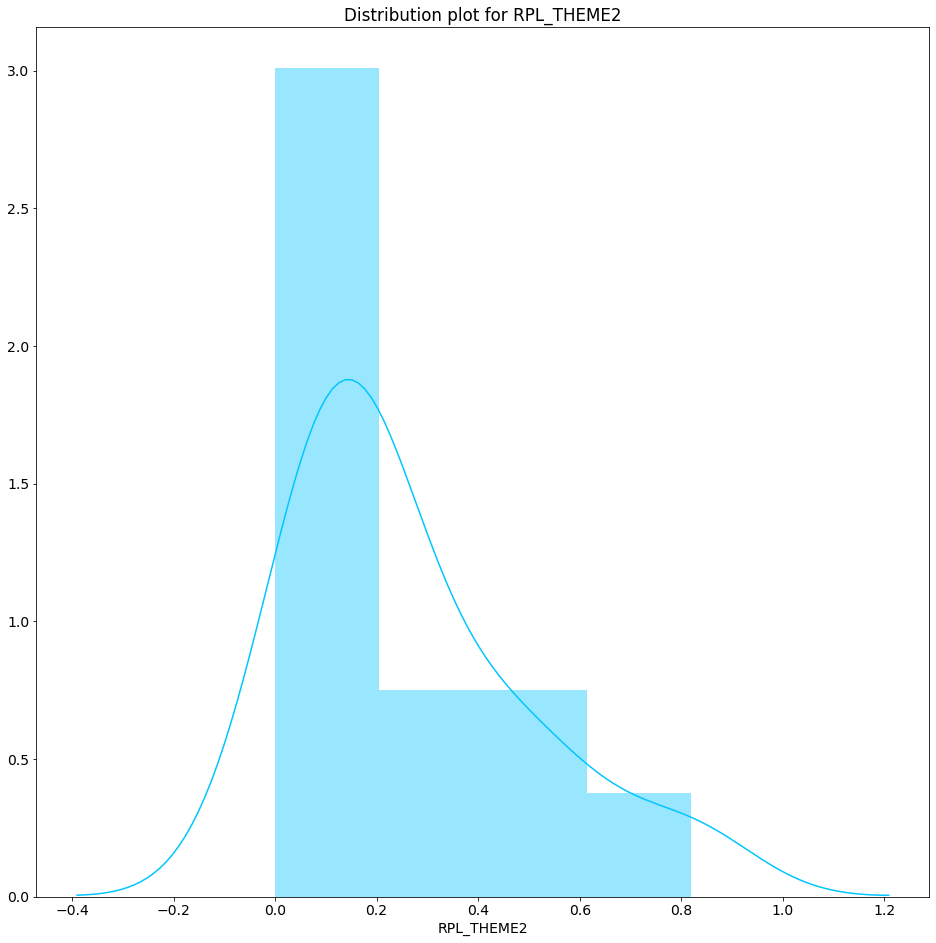

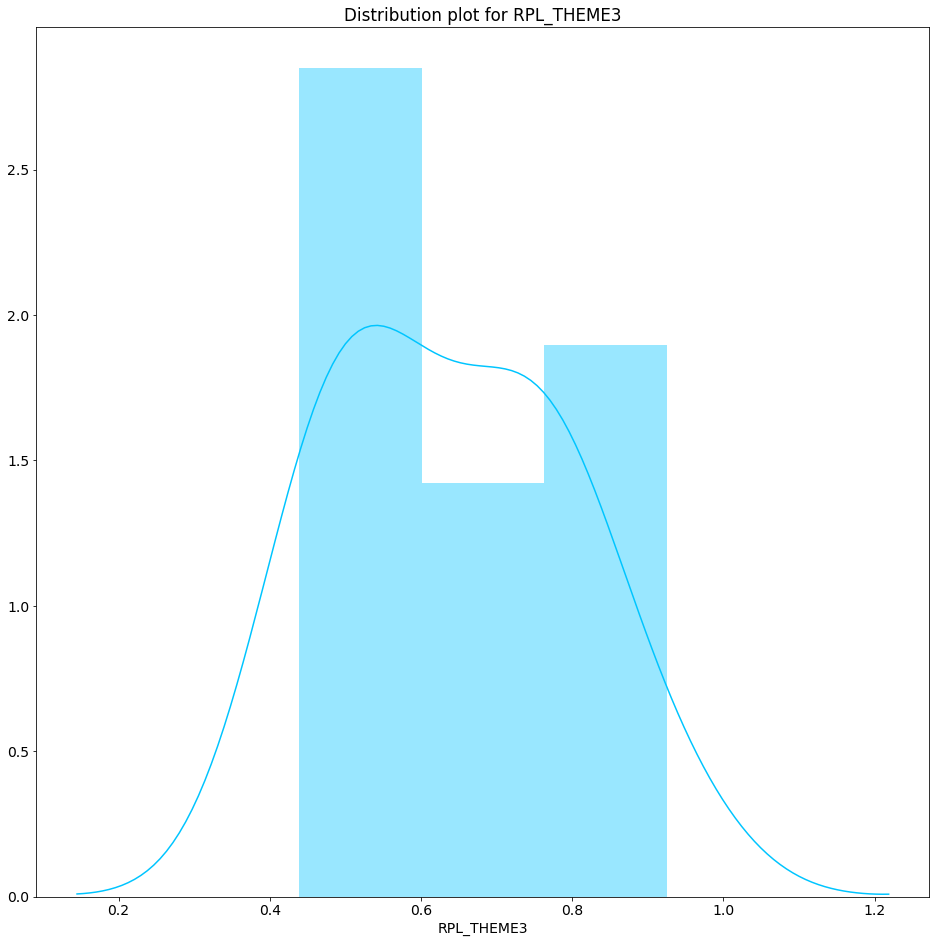

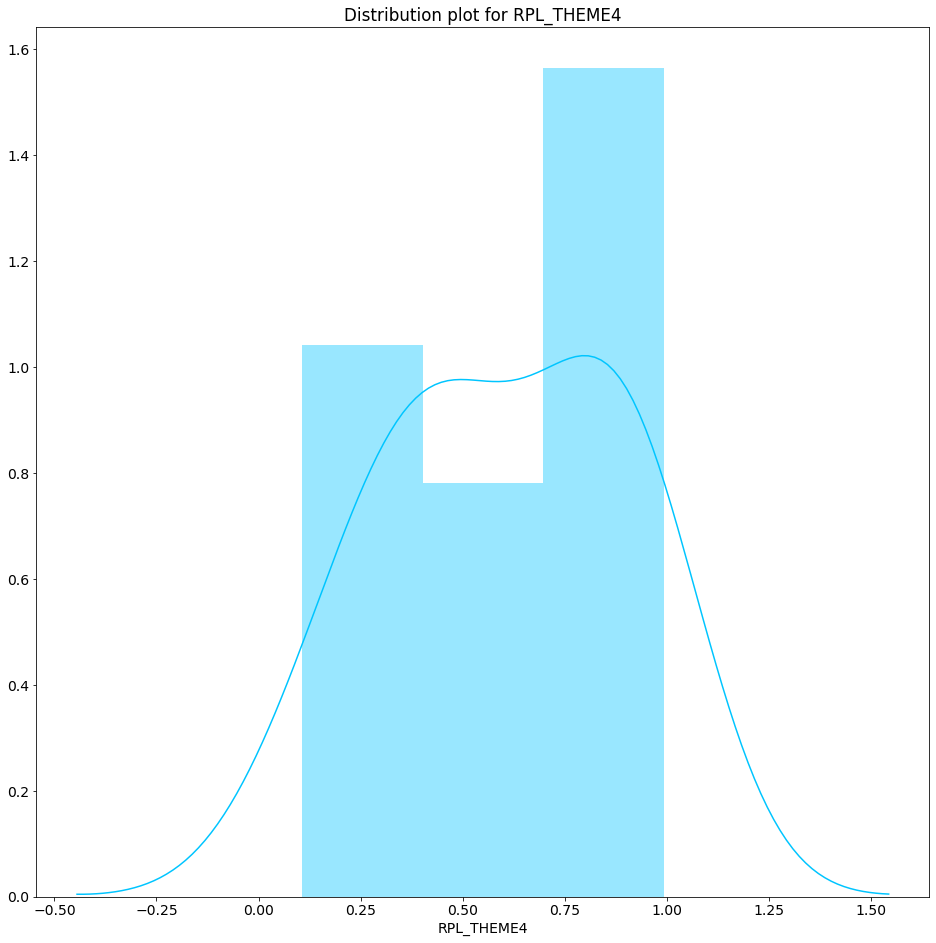

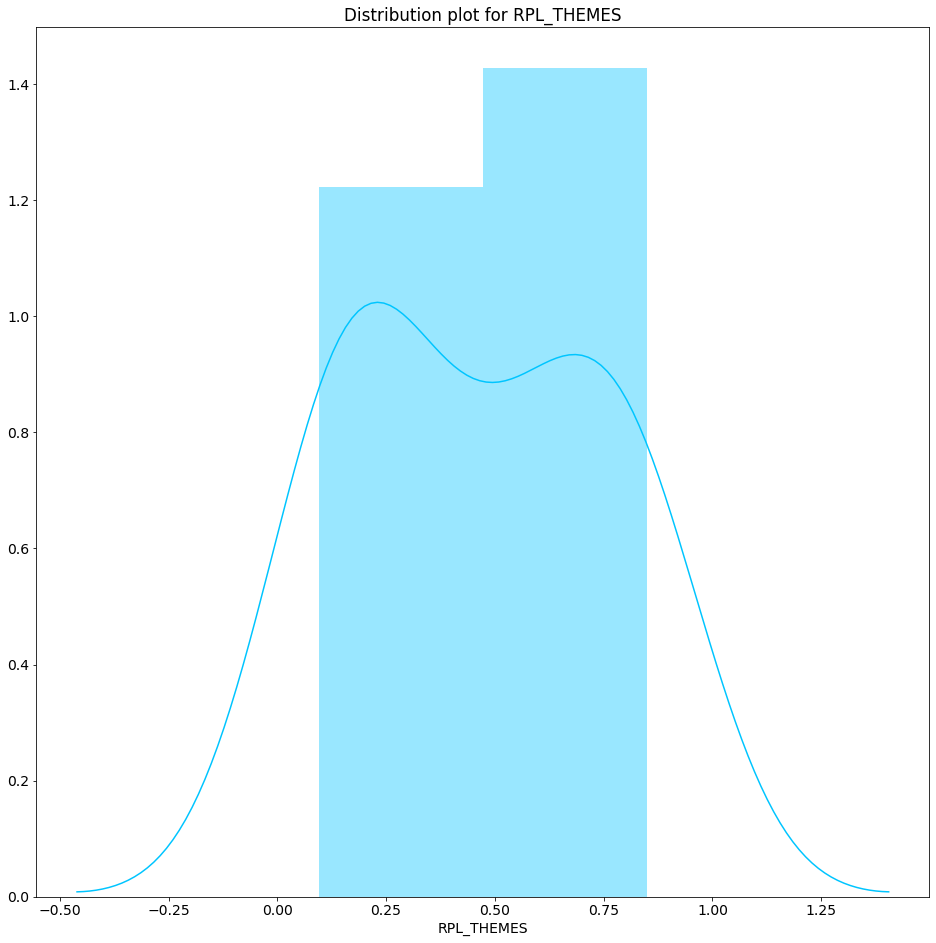

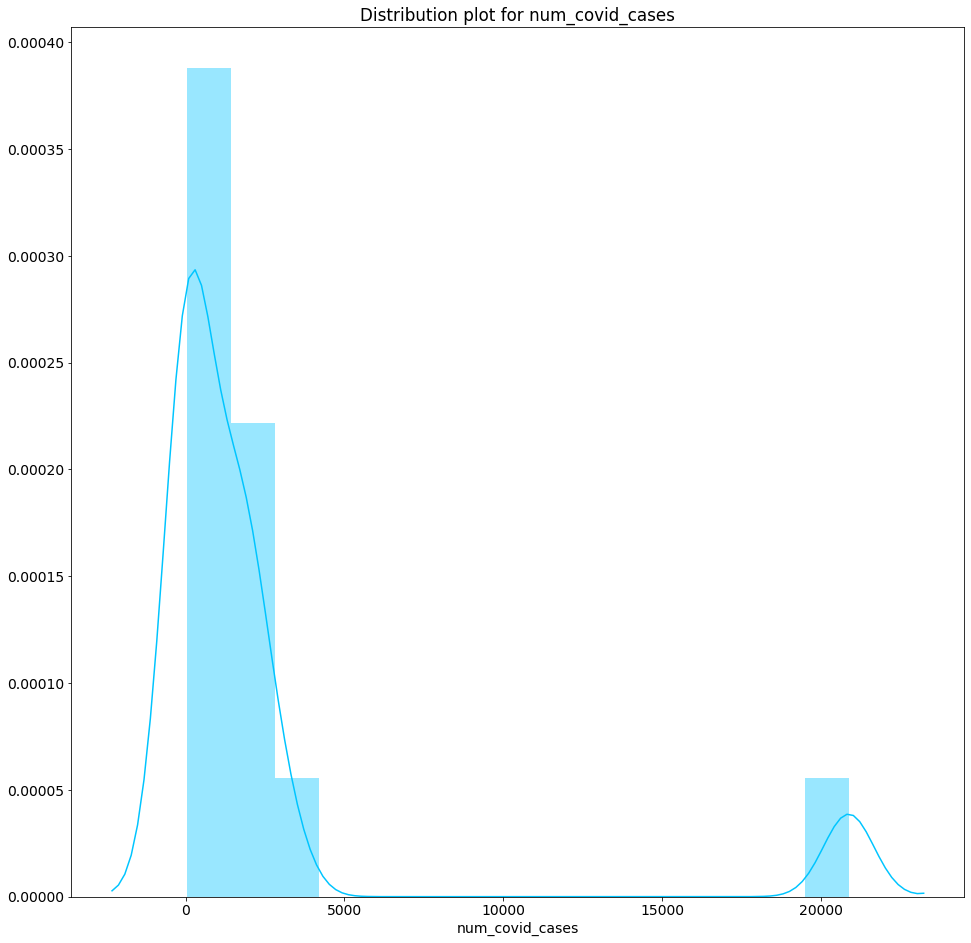

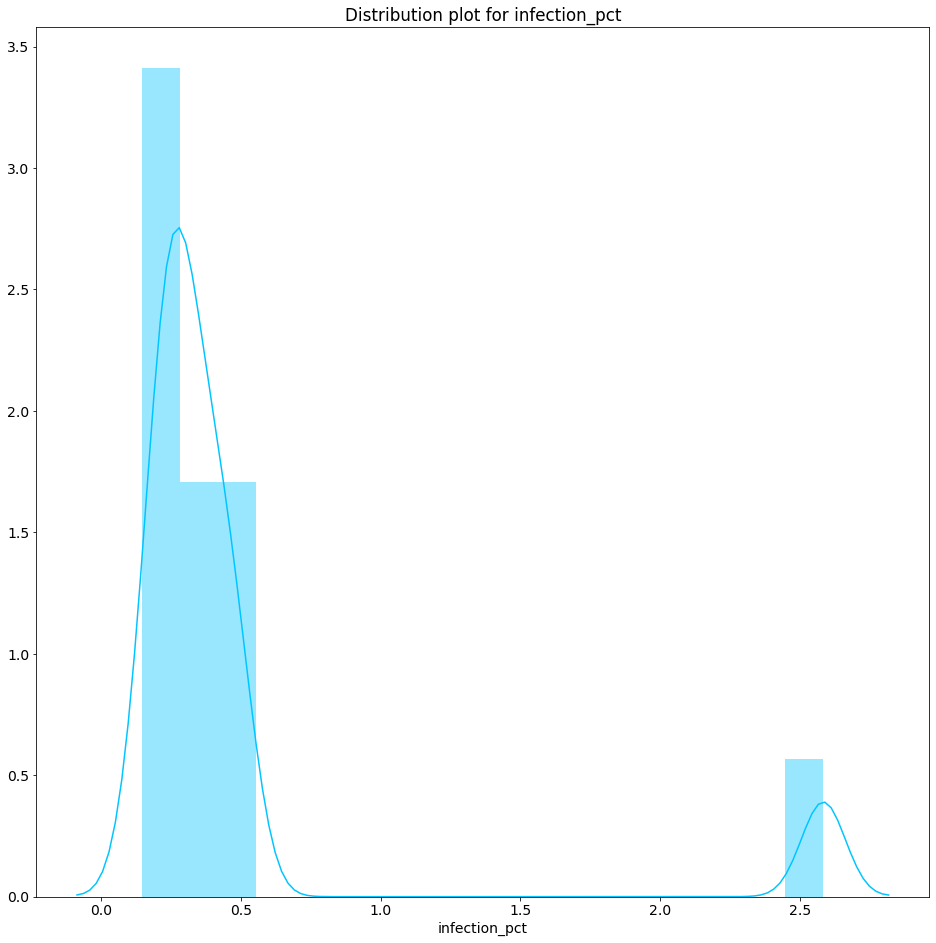

In [18]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_6)

### Distribution Plots for Region 7

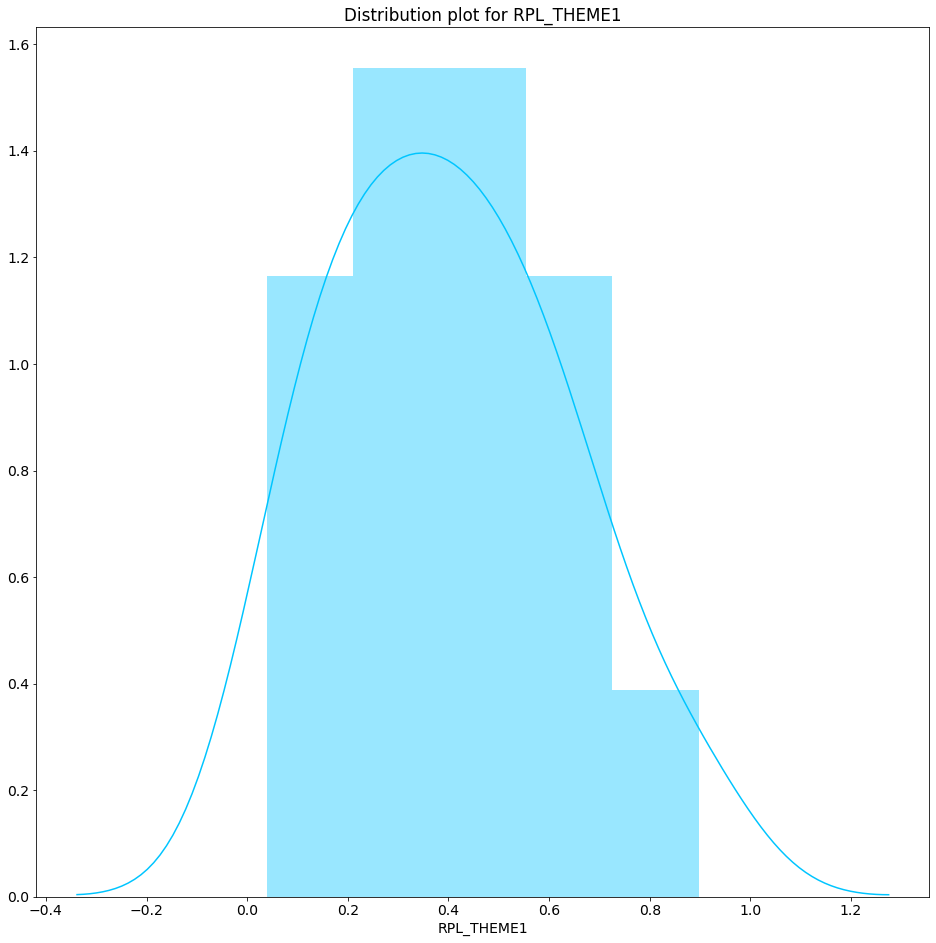

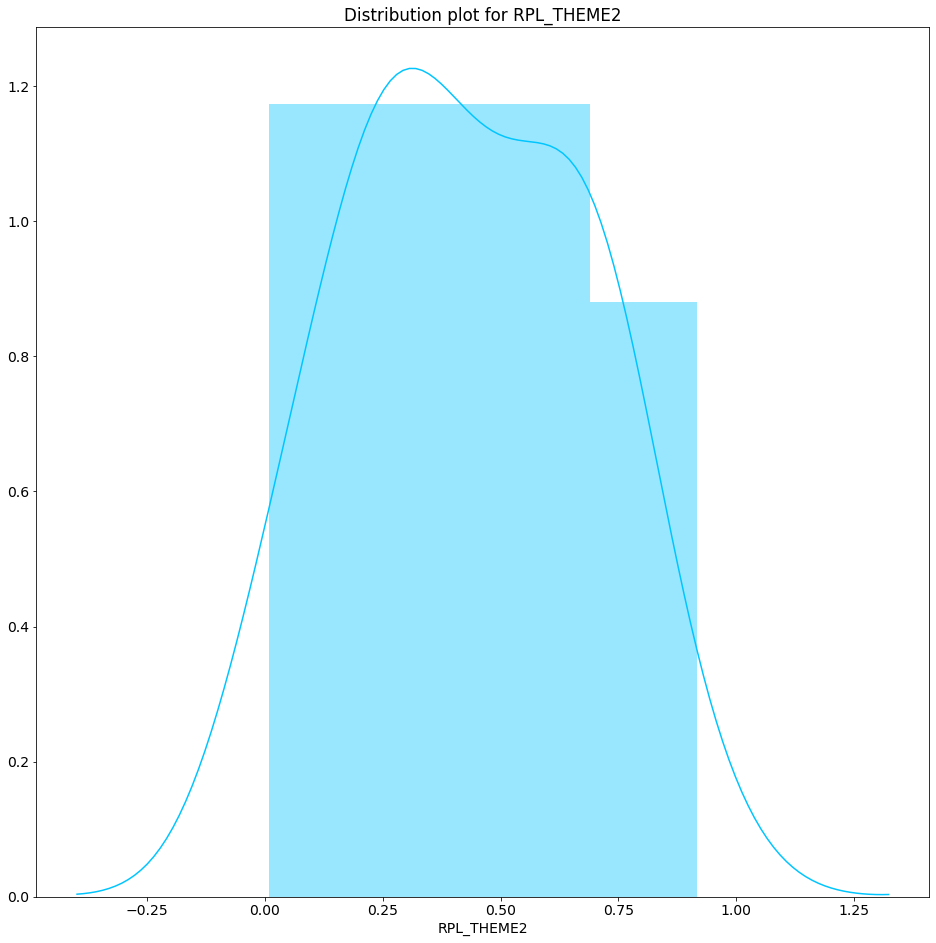

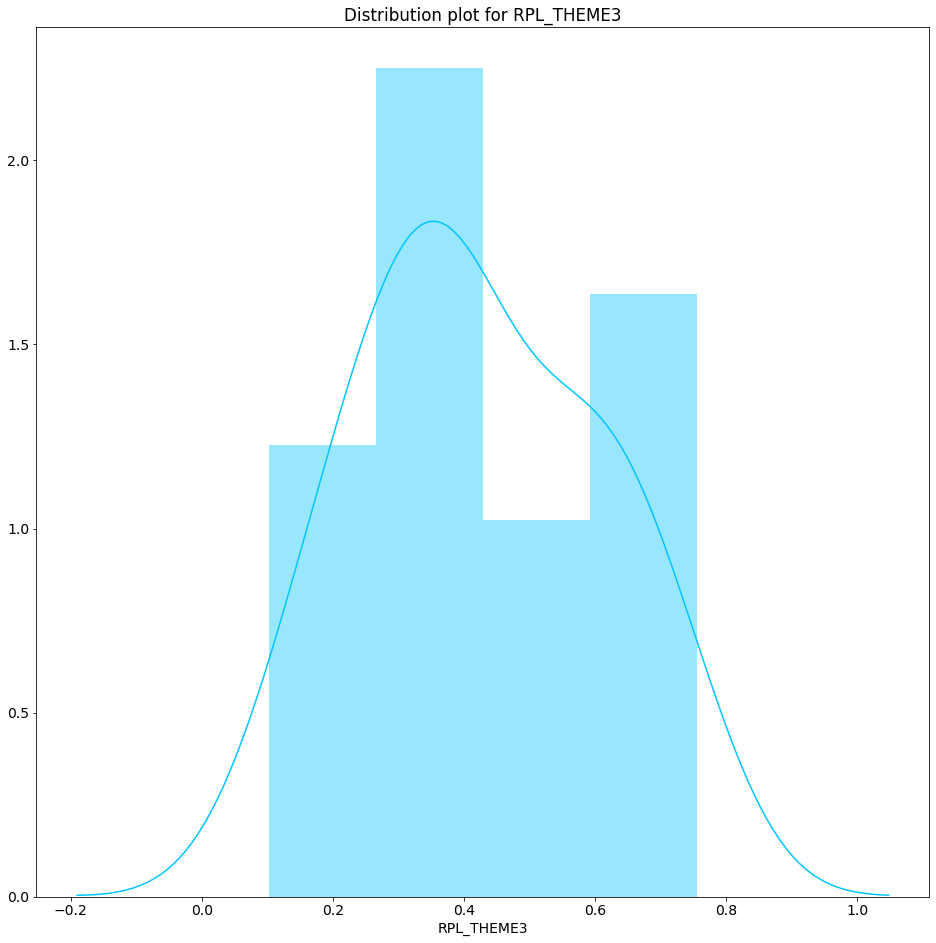

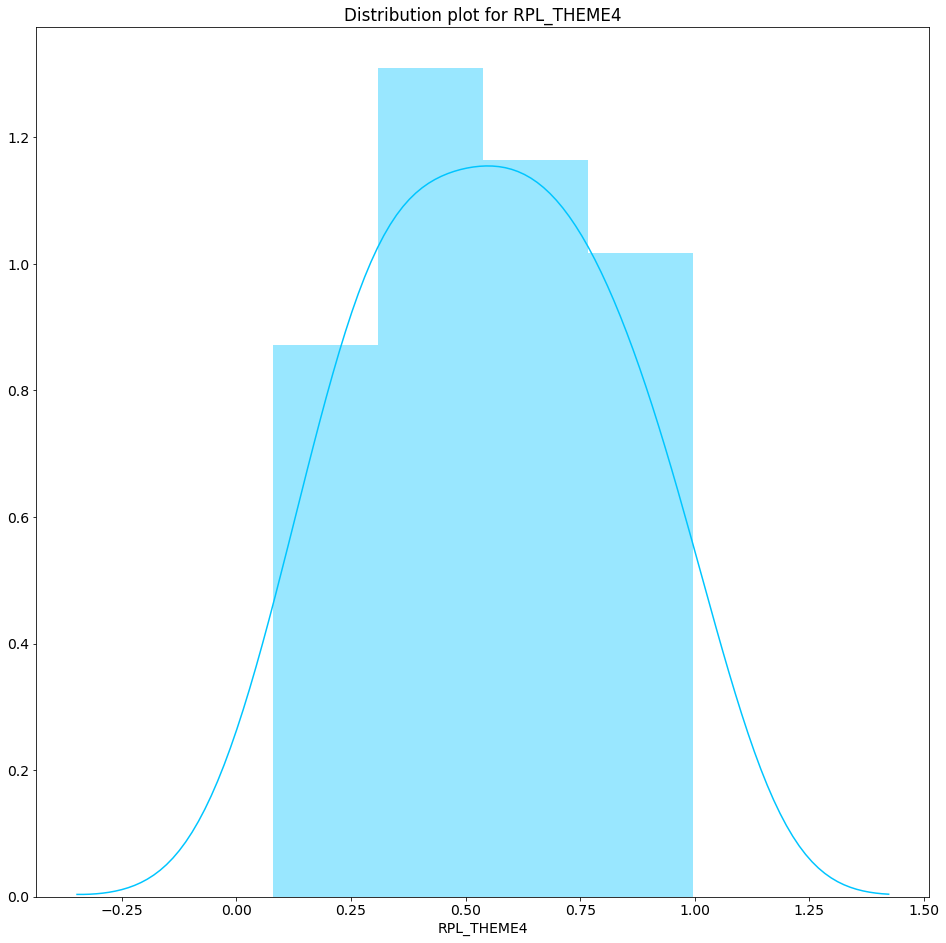

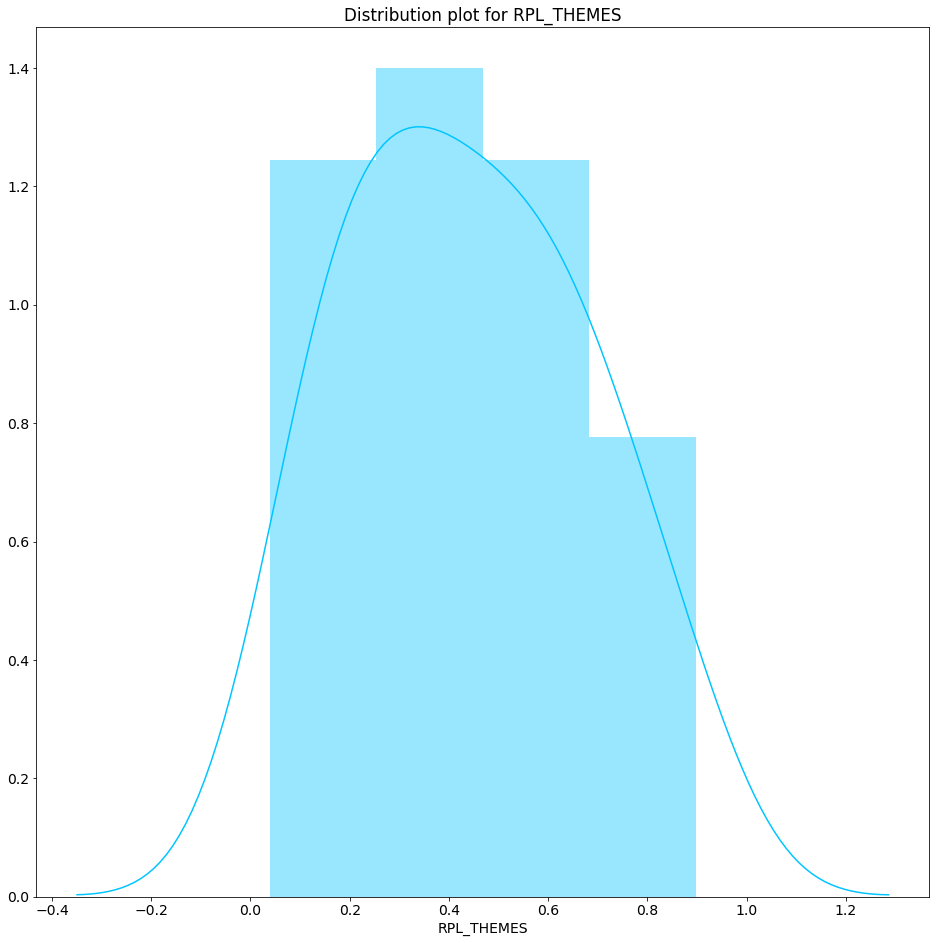

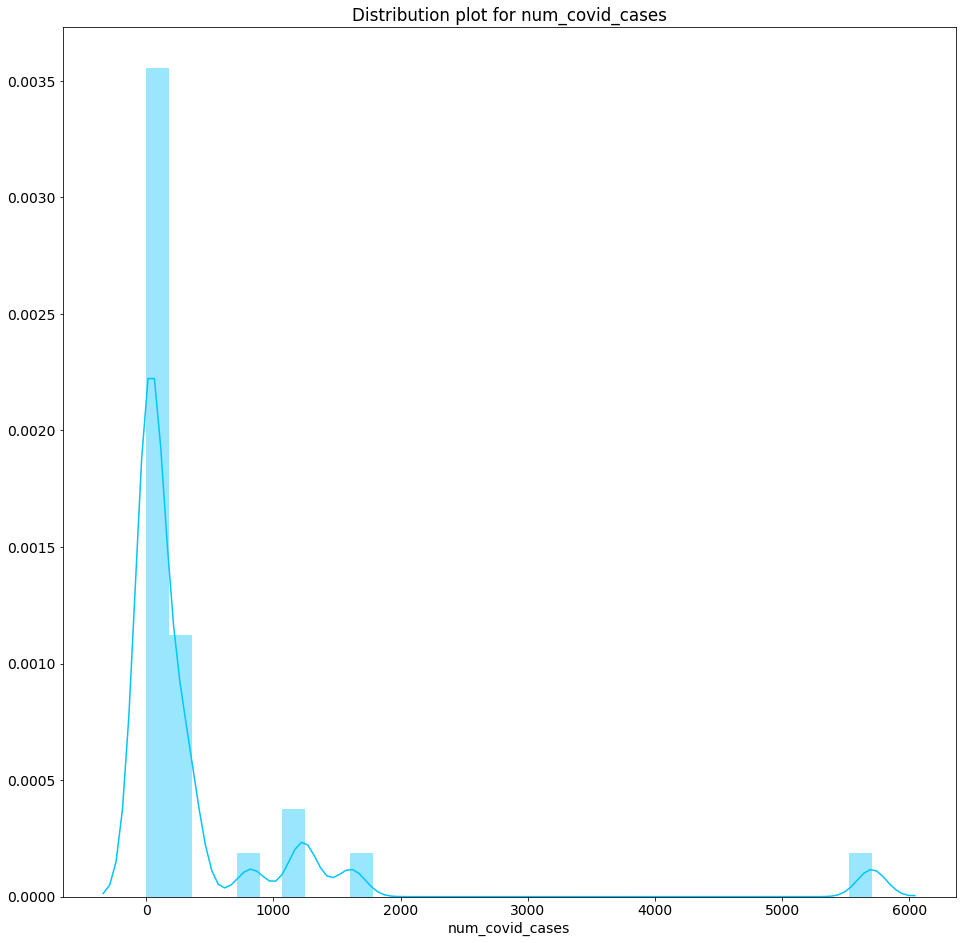

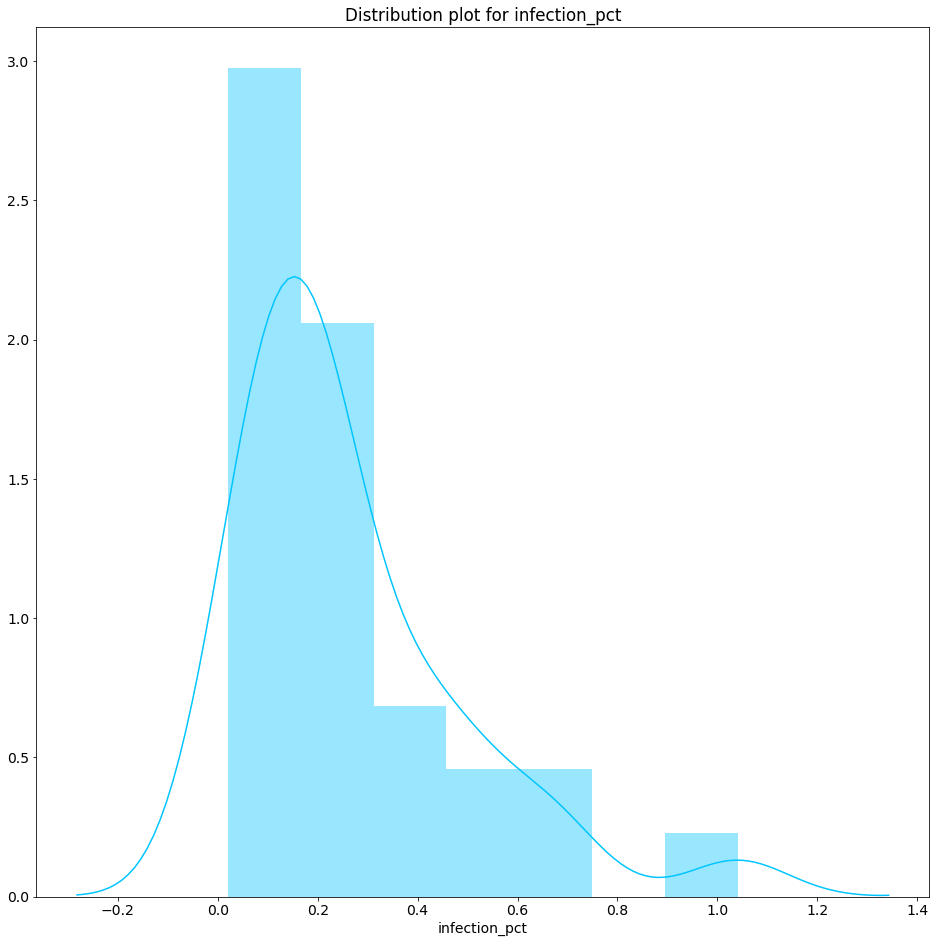

In [19]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_7)

### Distribution Plots for Region 8

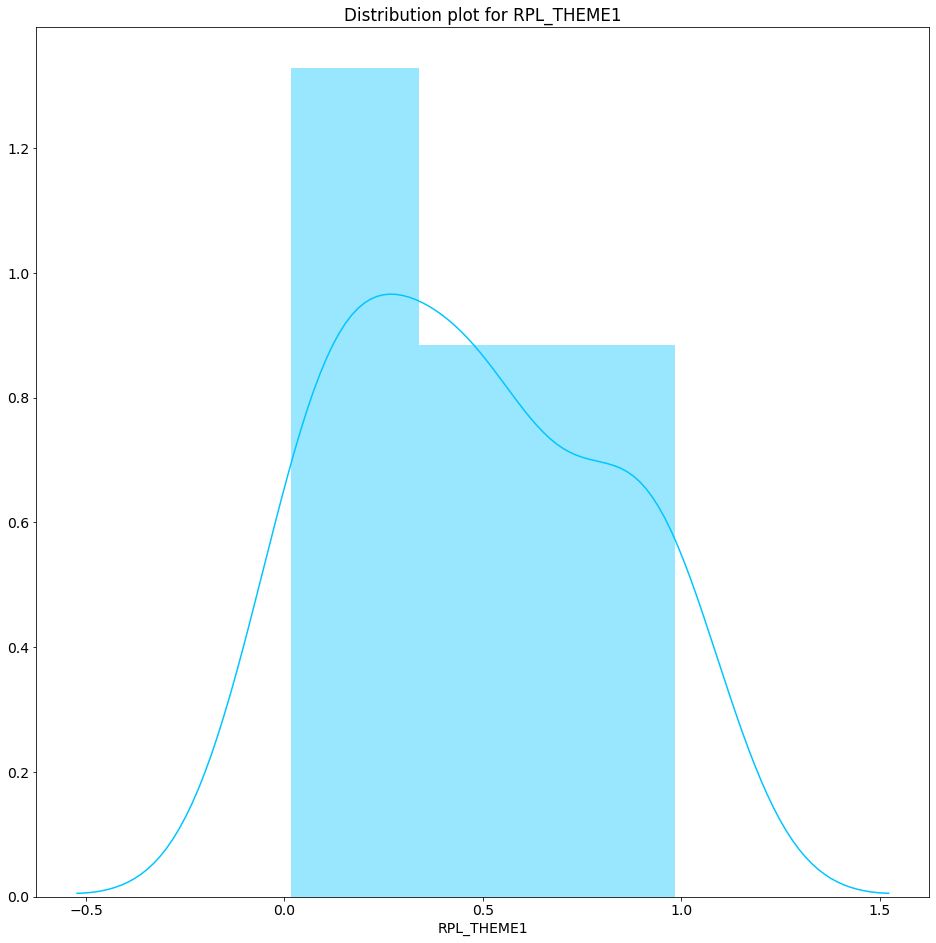

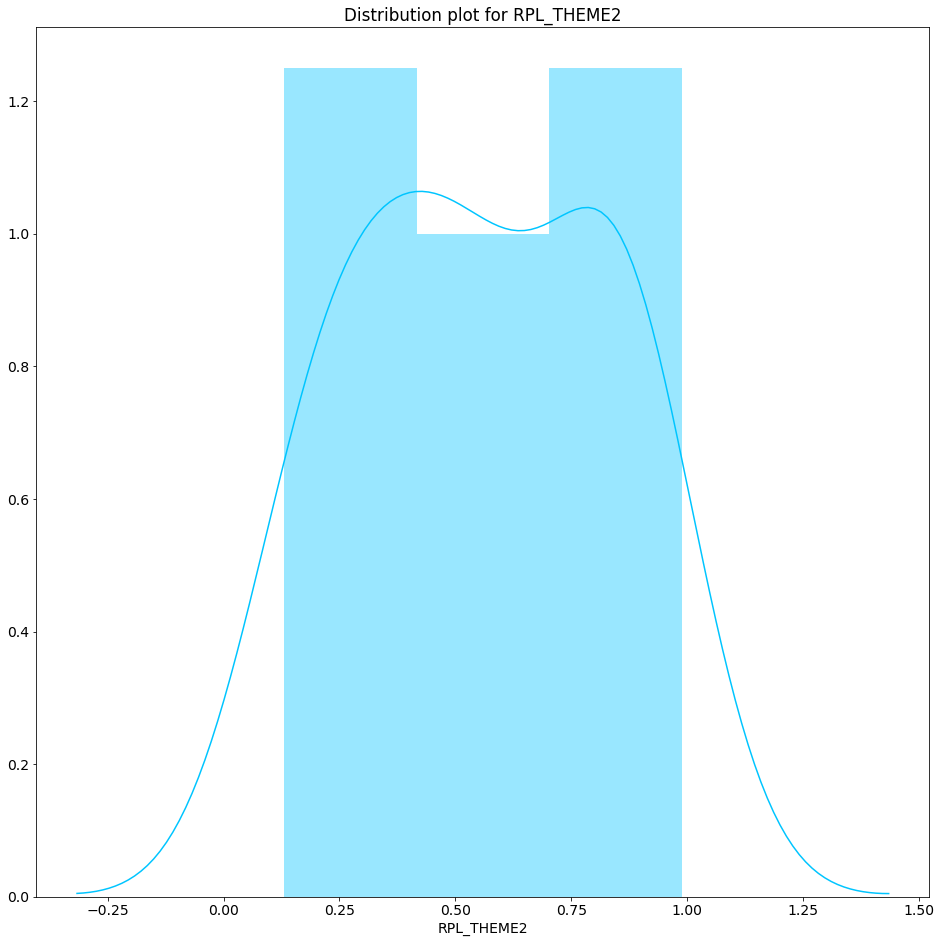

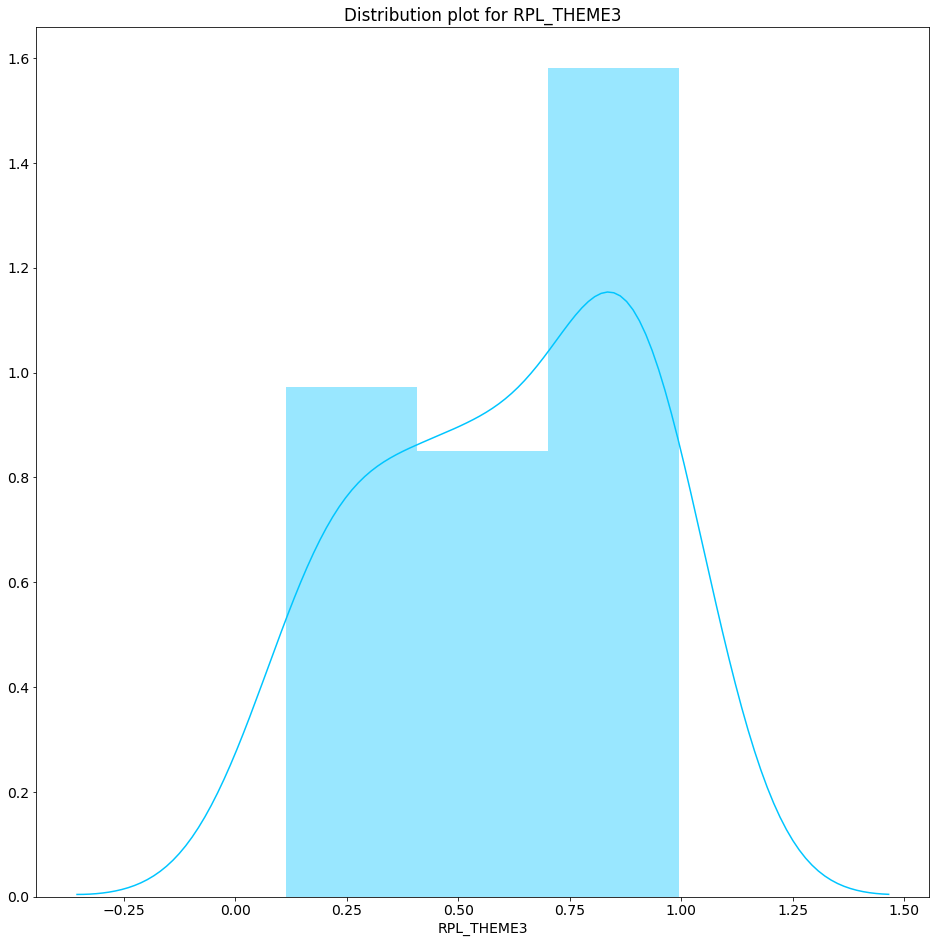

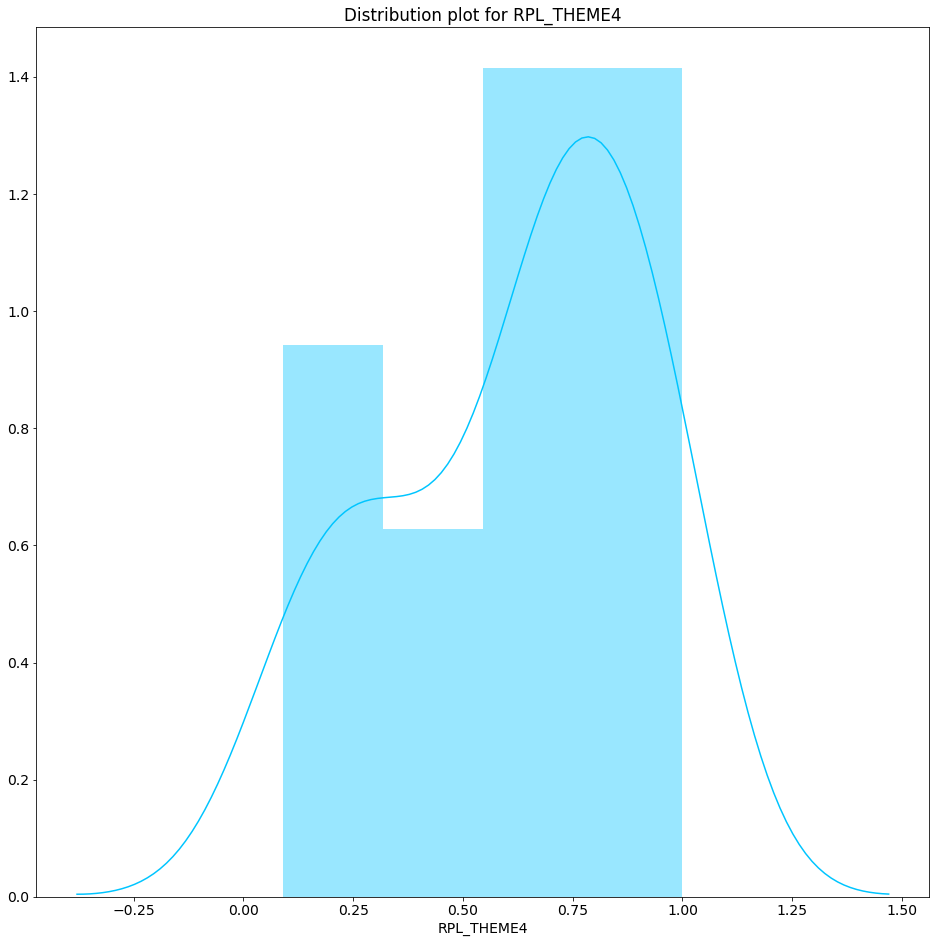

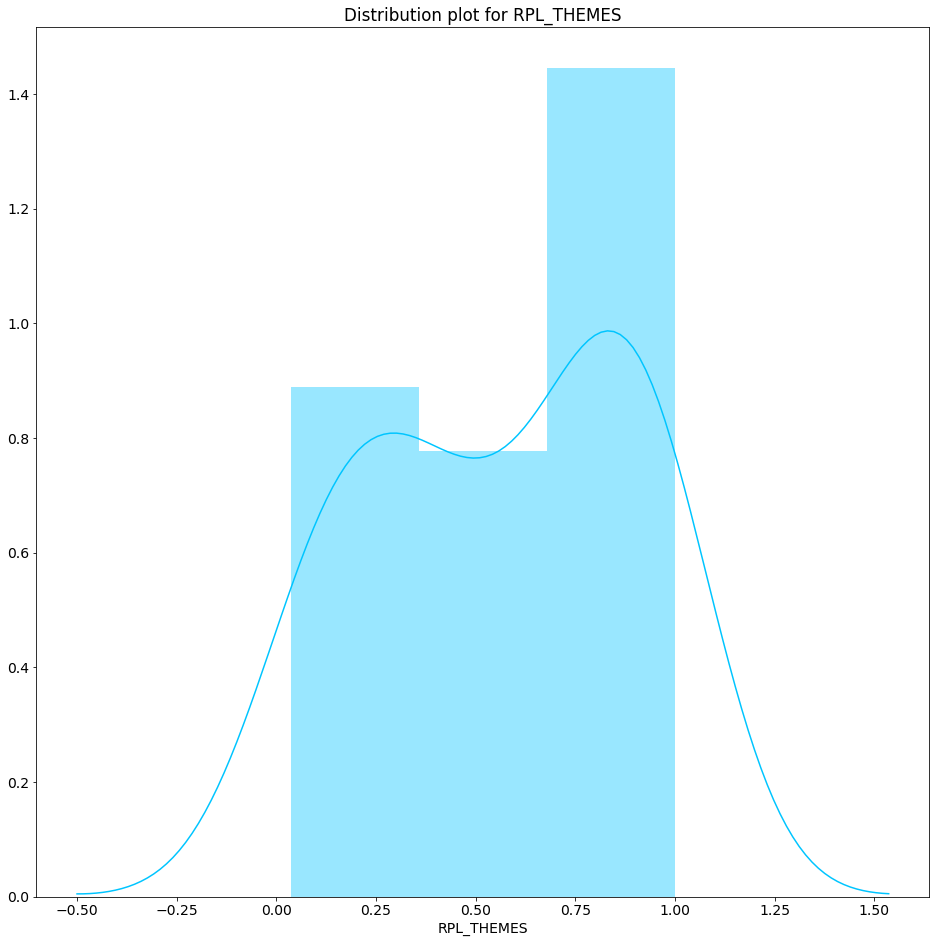

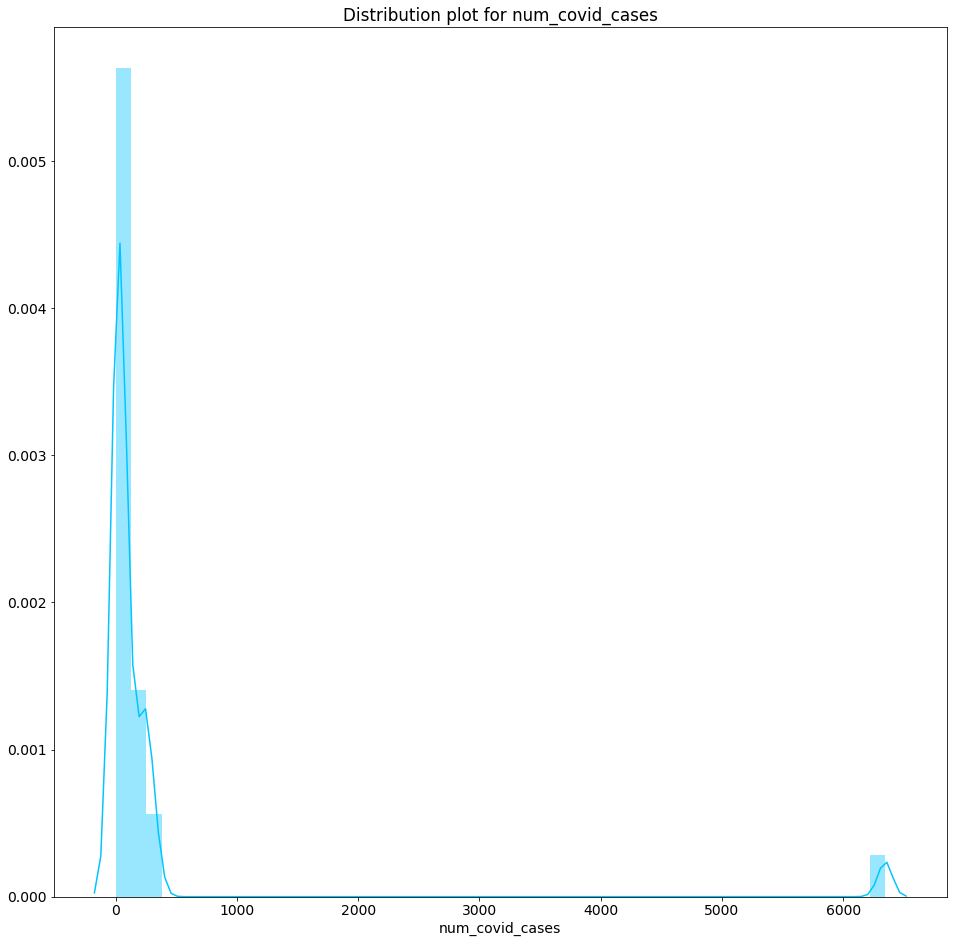

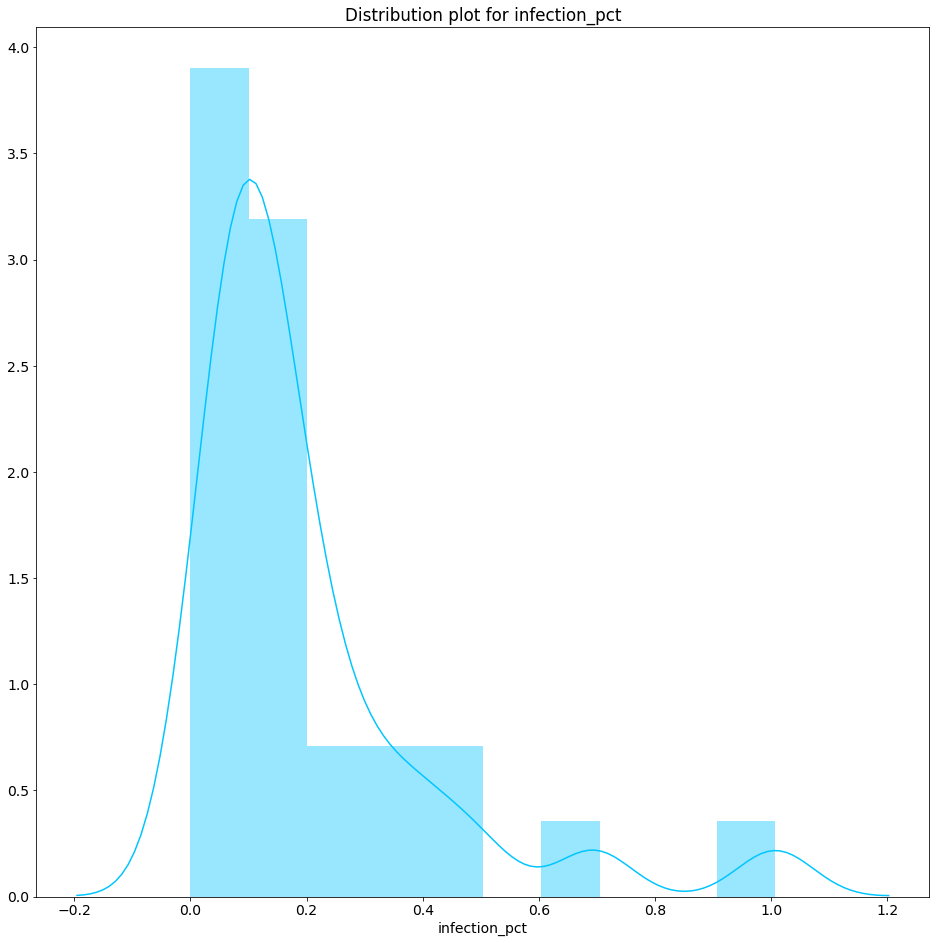

In [20]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_8)

### Distribution Plots for Region 9

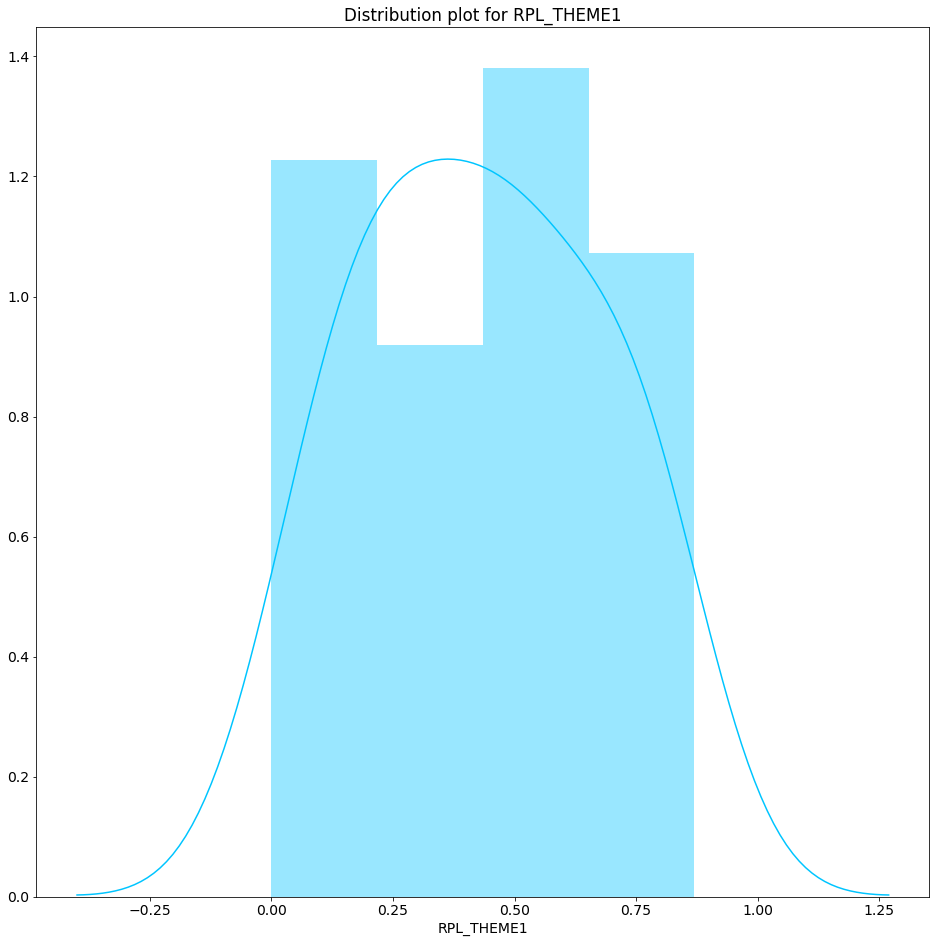

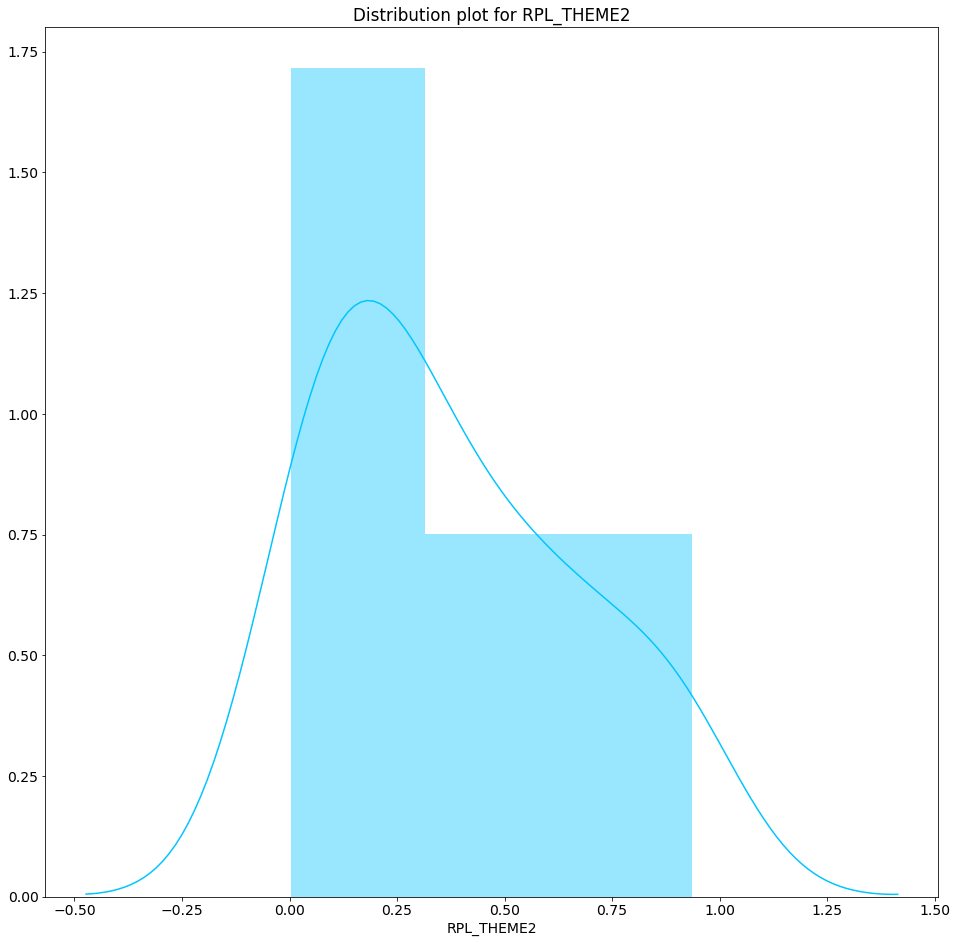

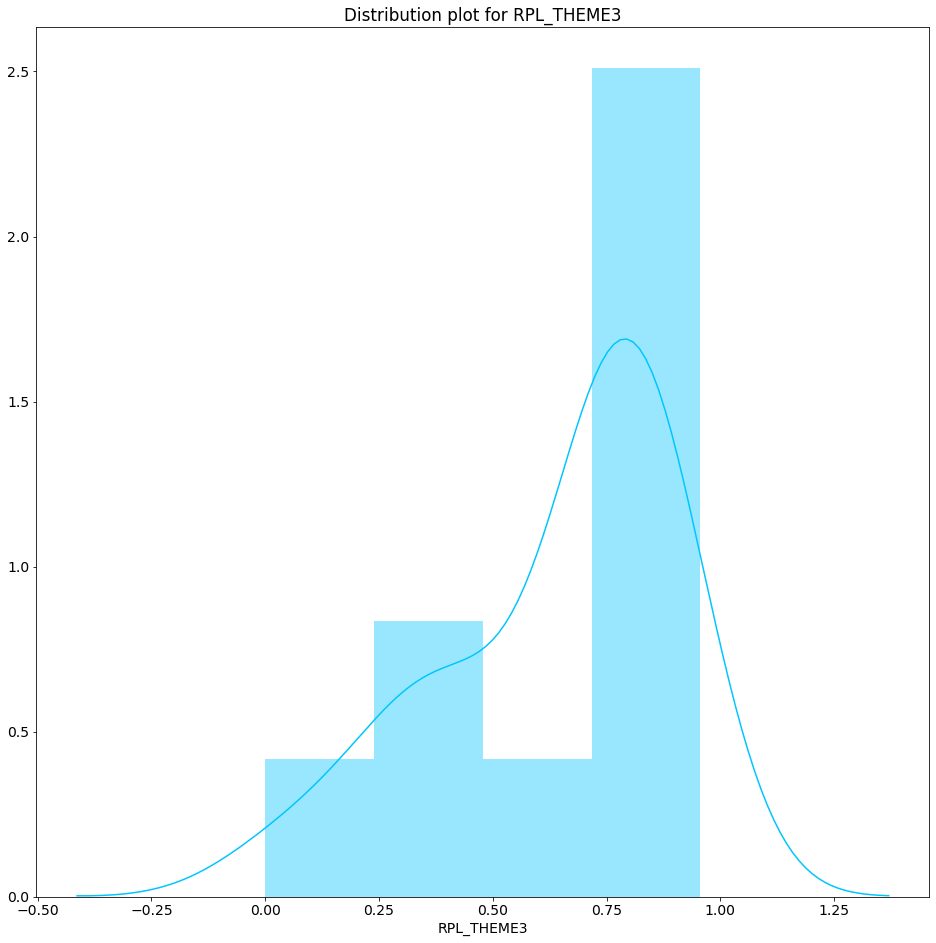

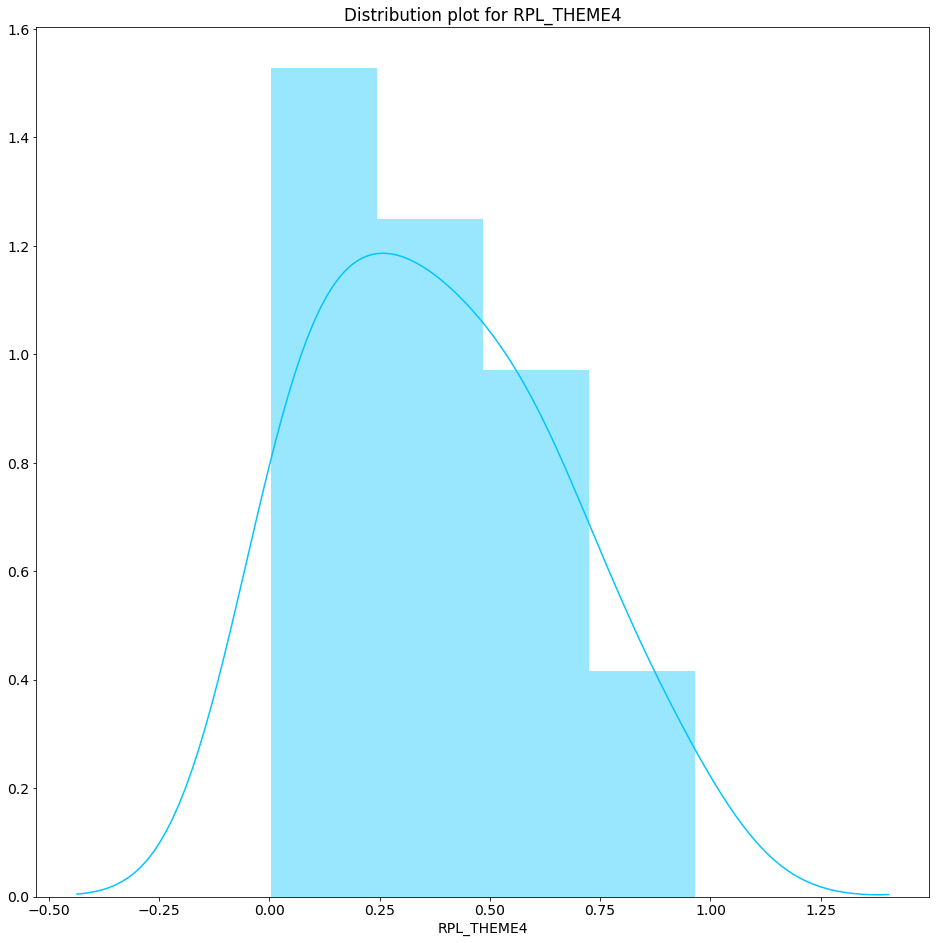

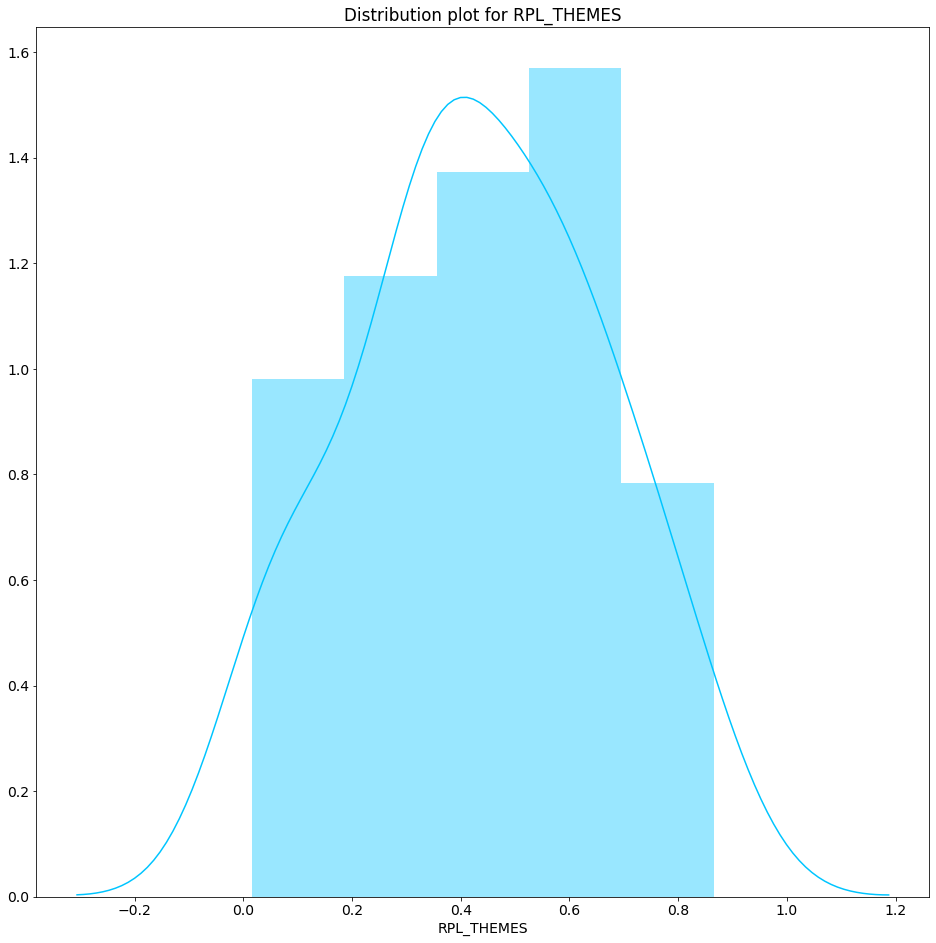

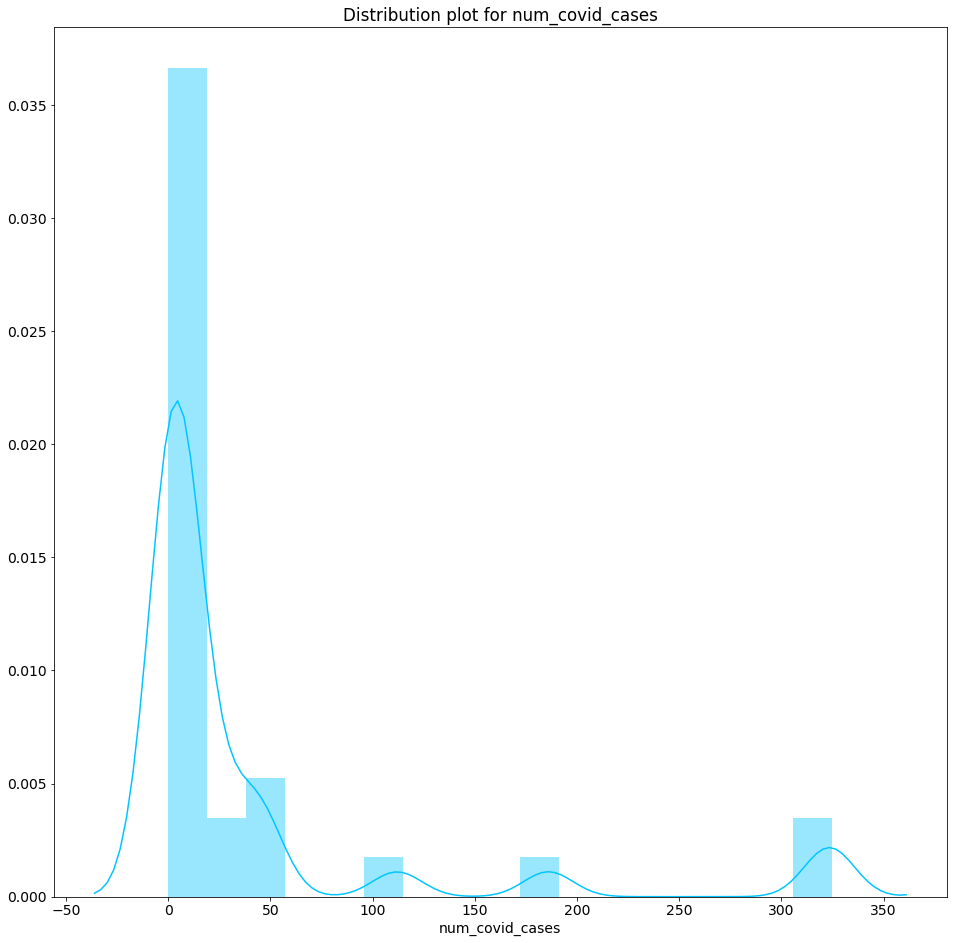

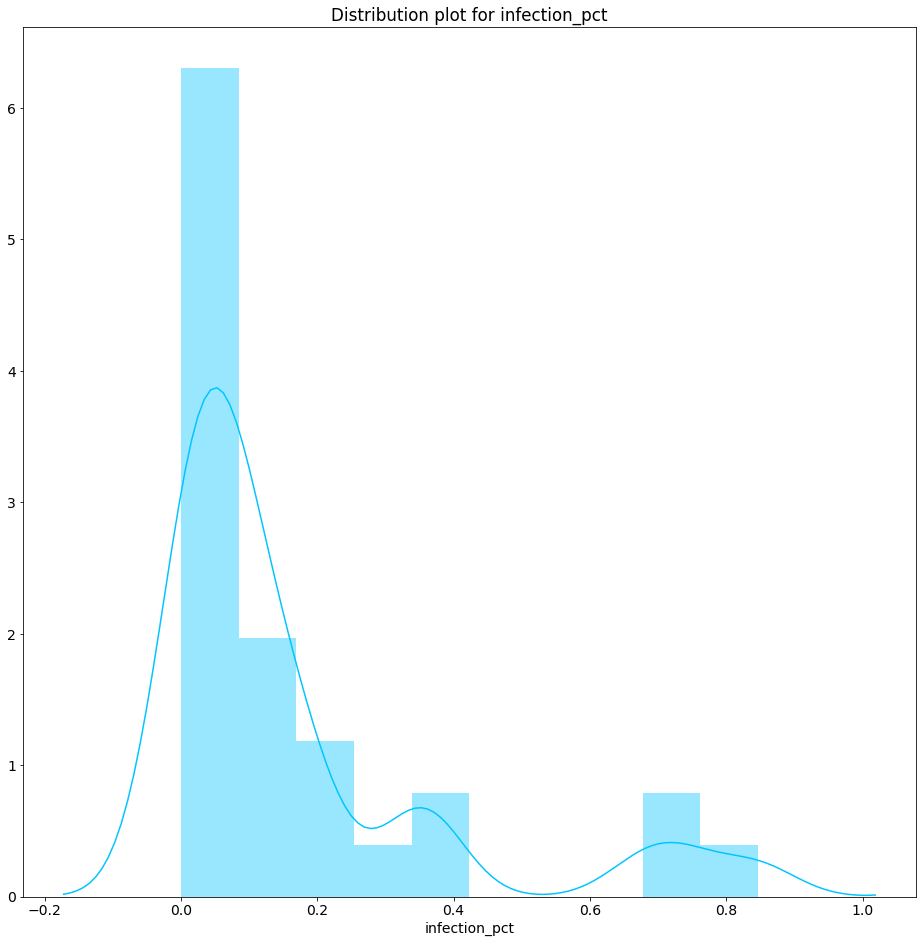

In [21]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_9)

### Distribution Plots for Region 10

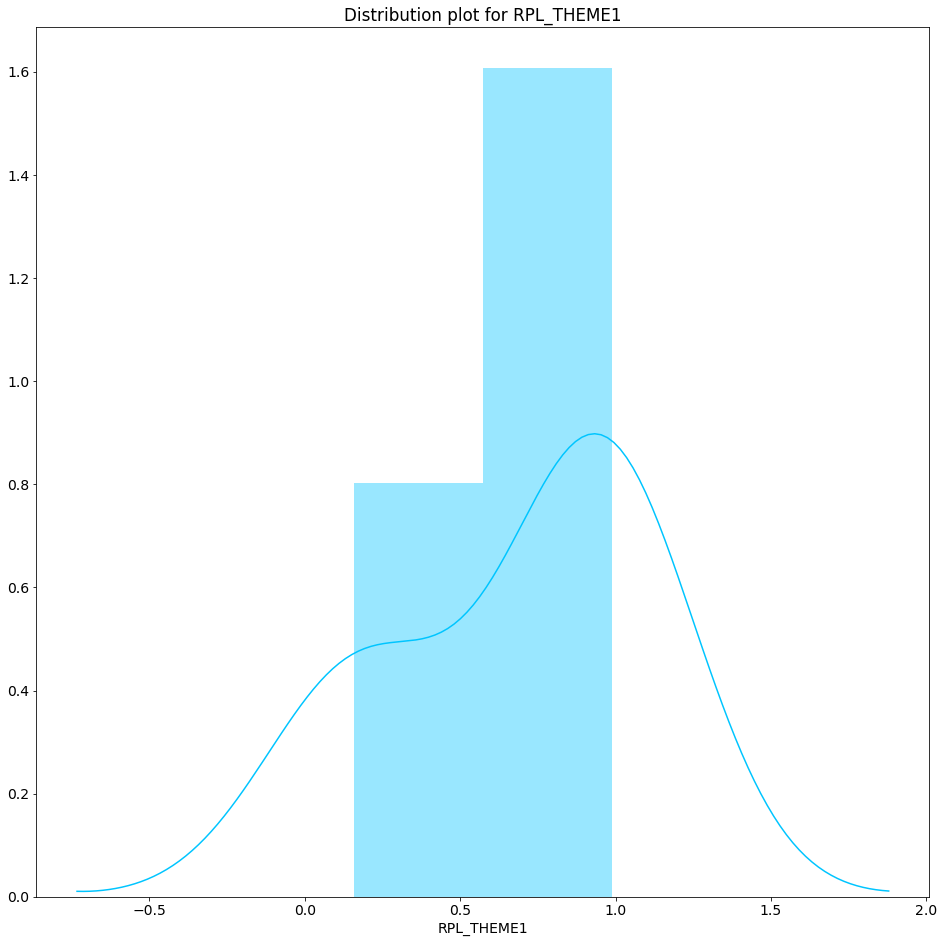

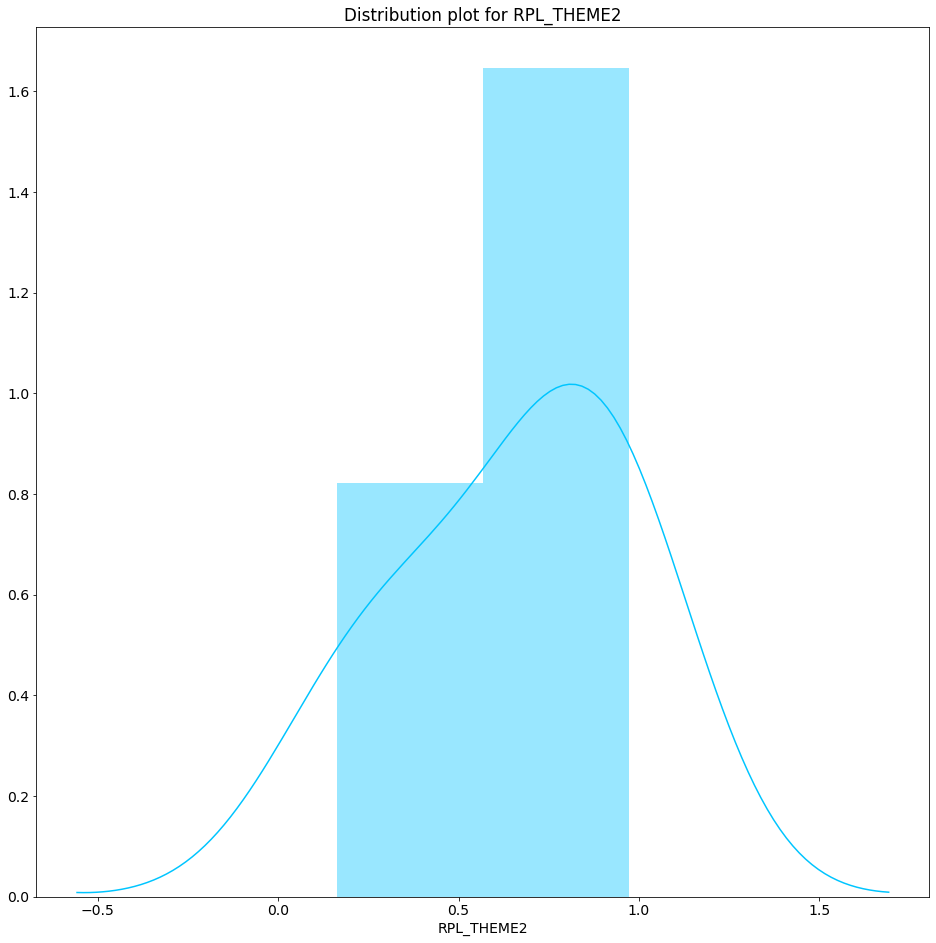

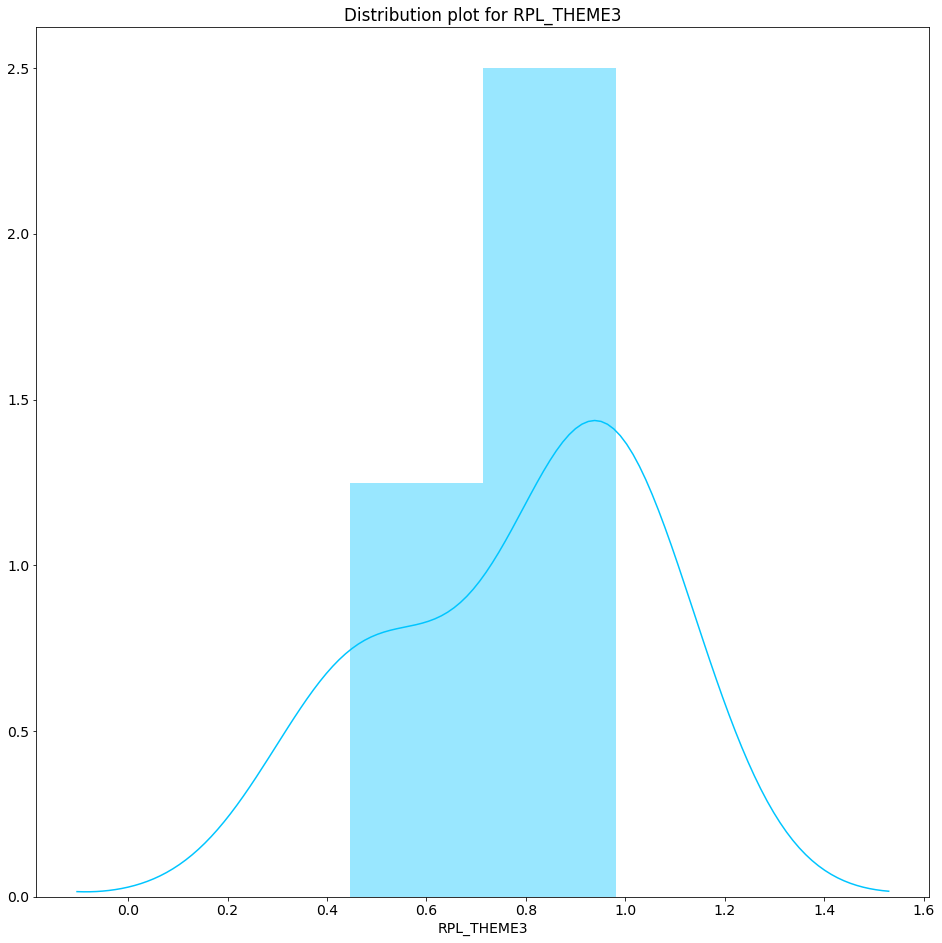

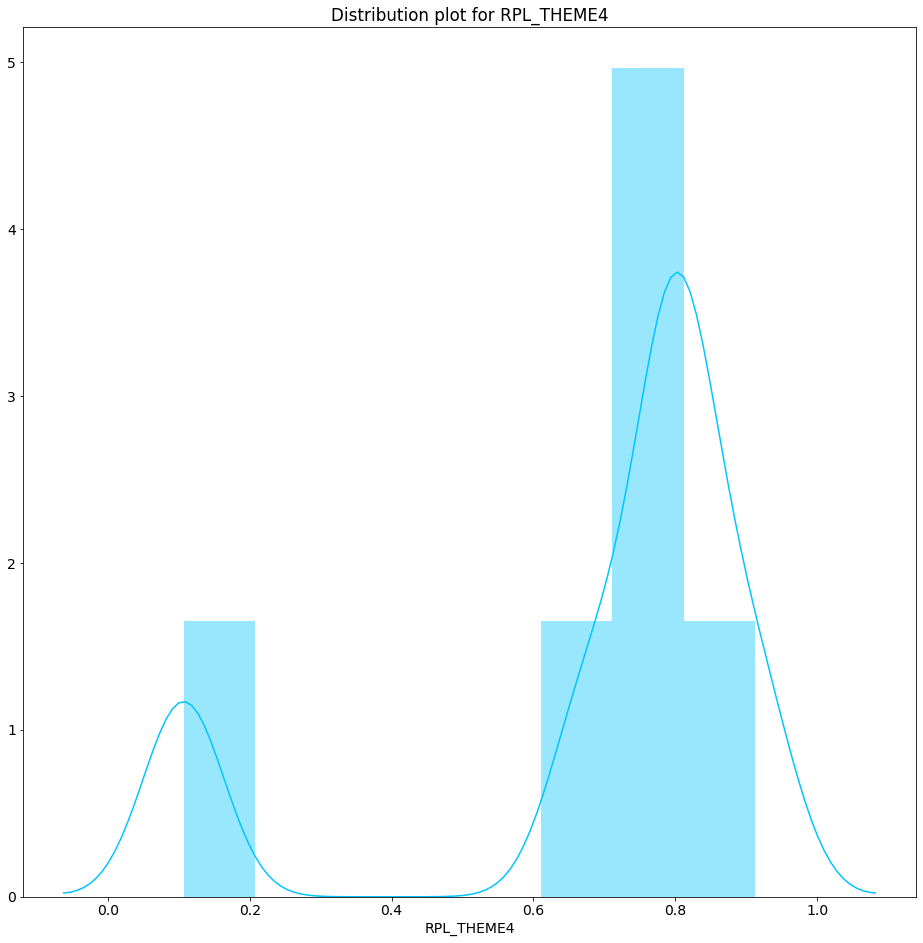

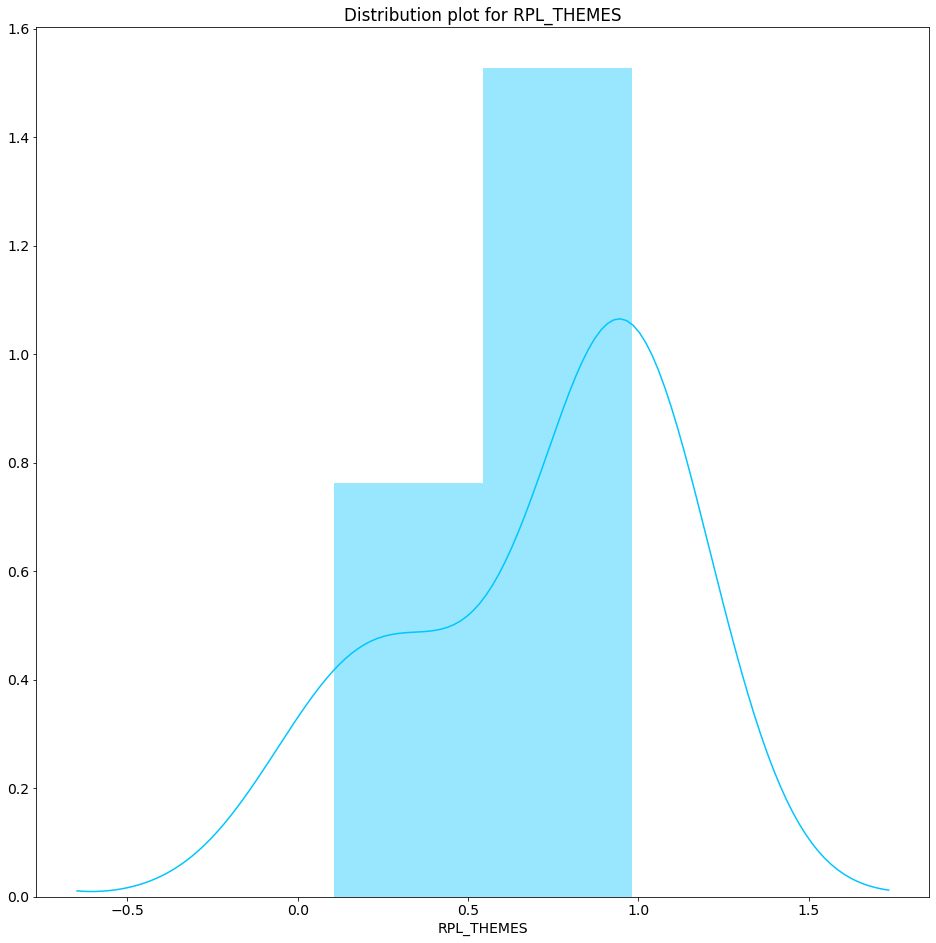

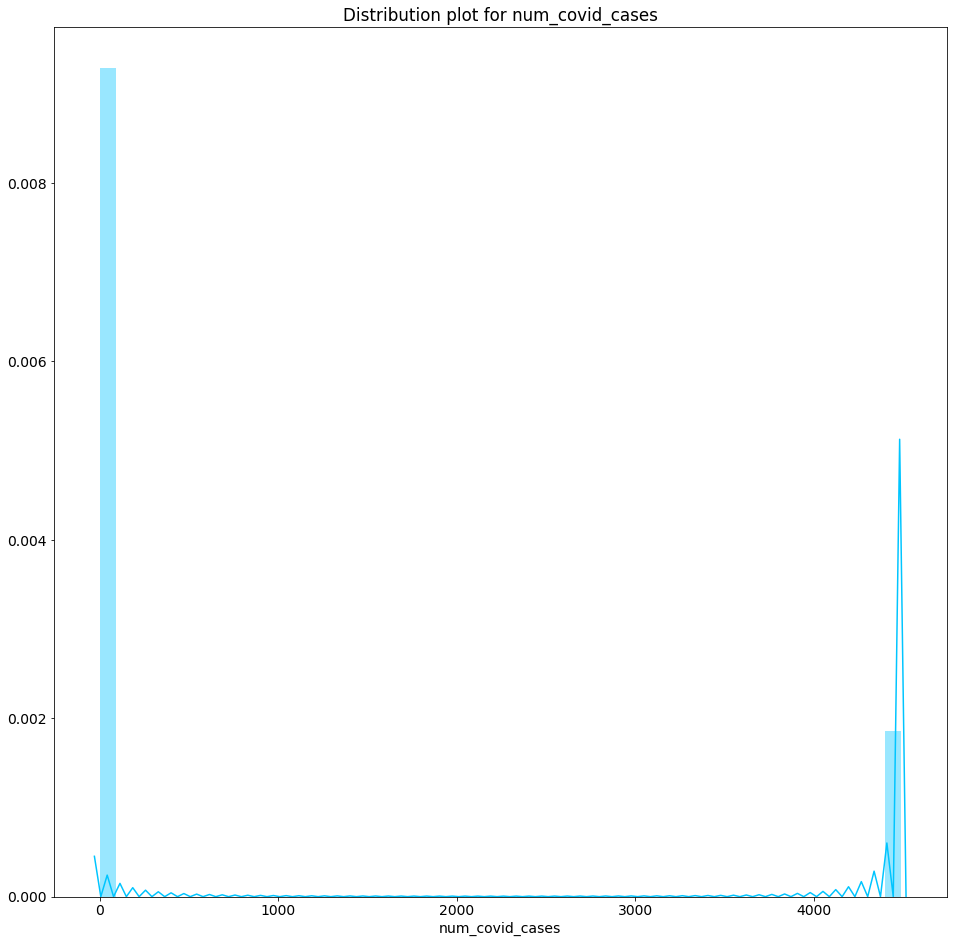

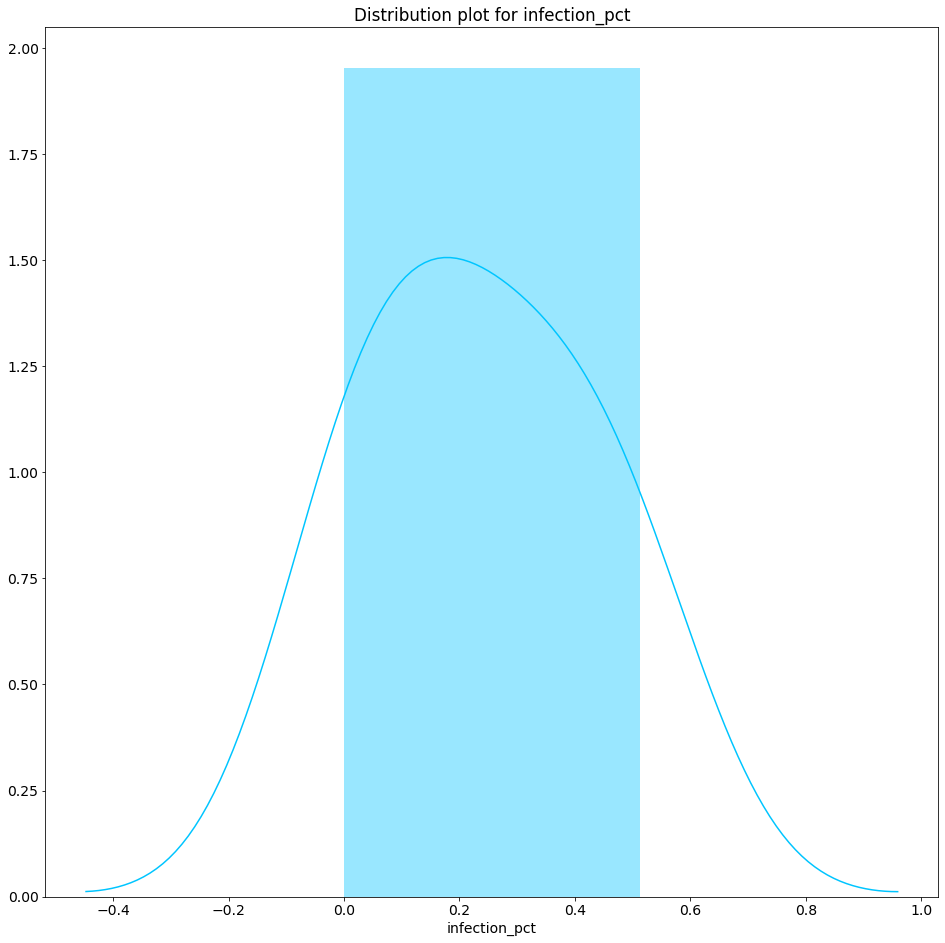

In [22]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_10)

### Distribution Plots for Region 11

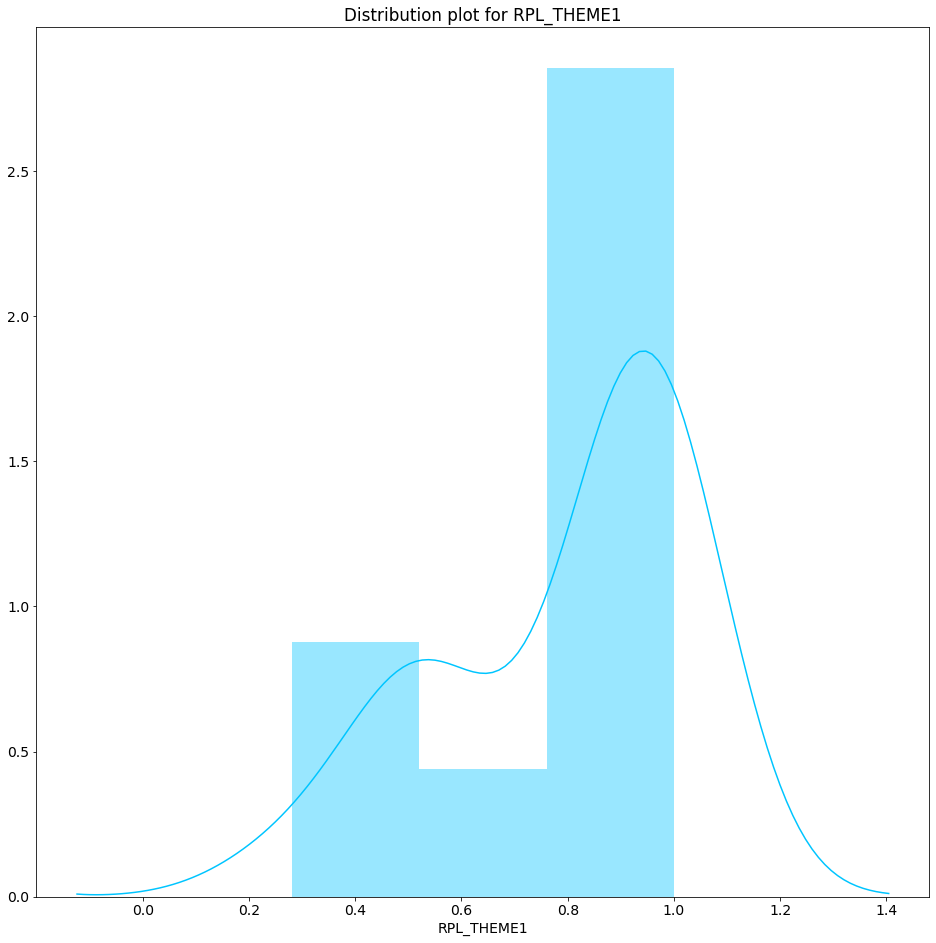

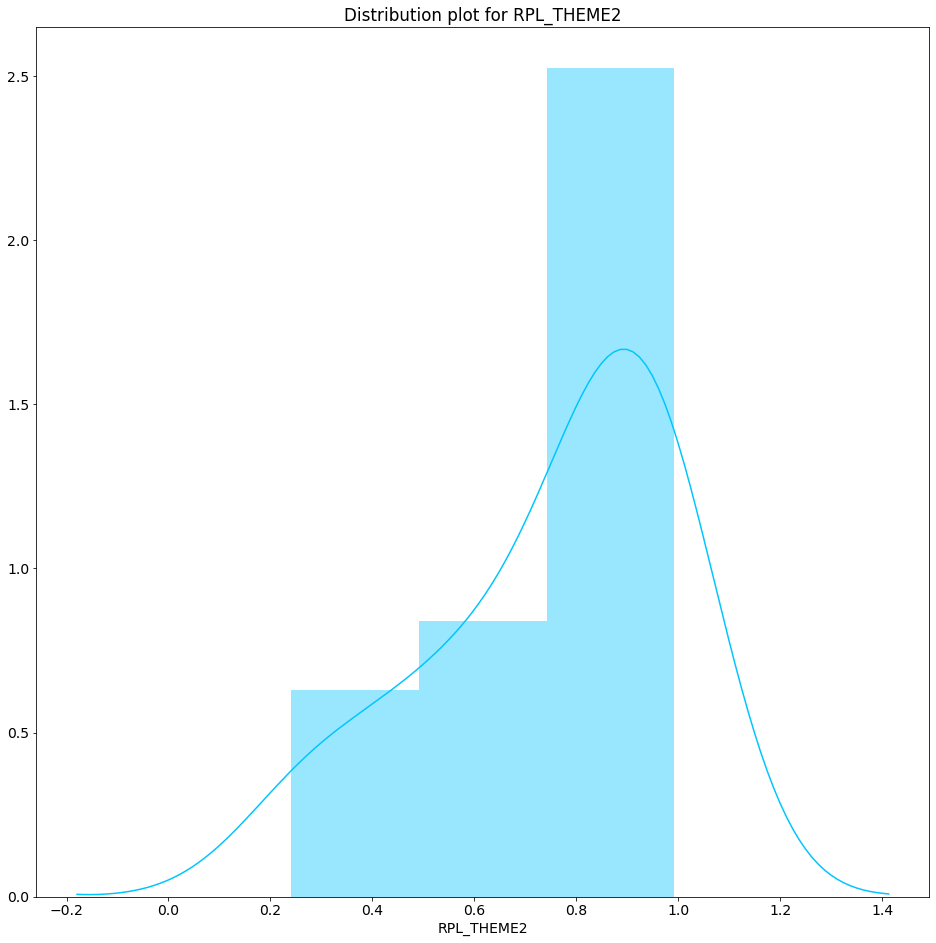

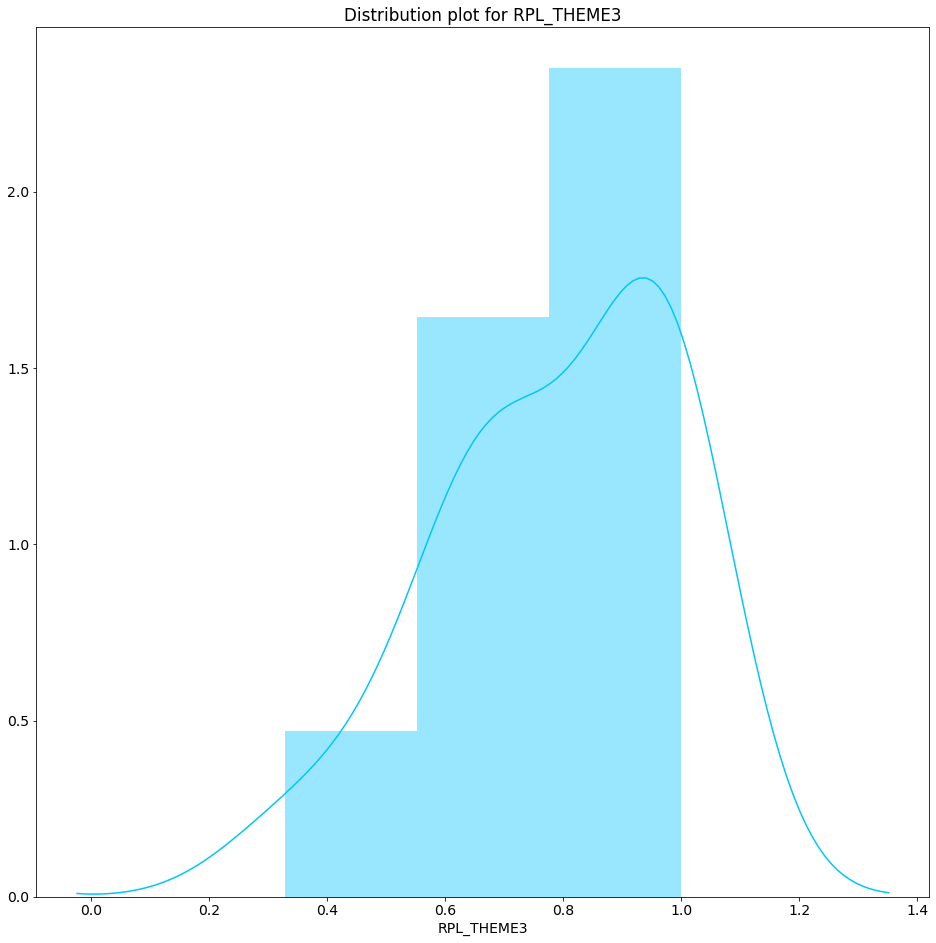

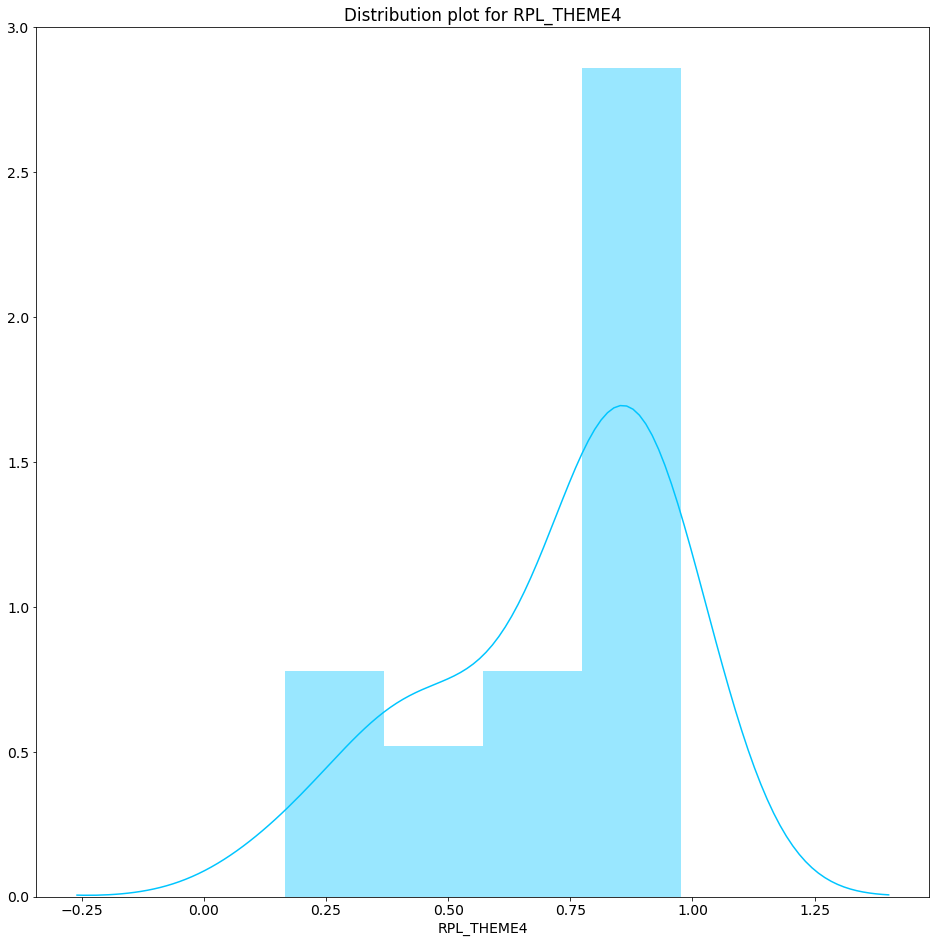

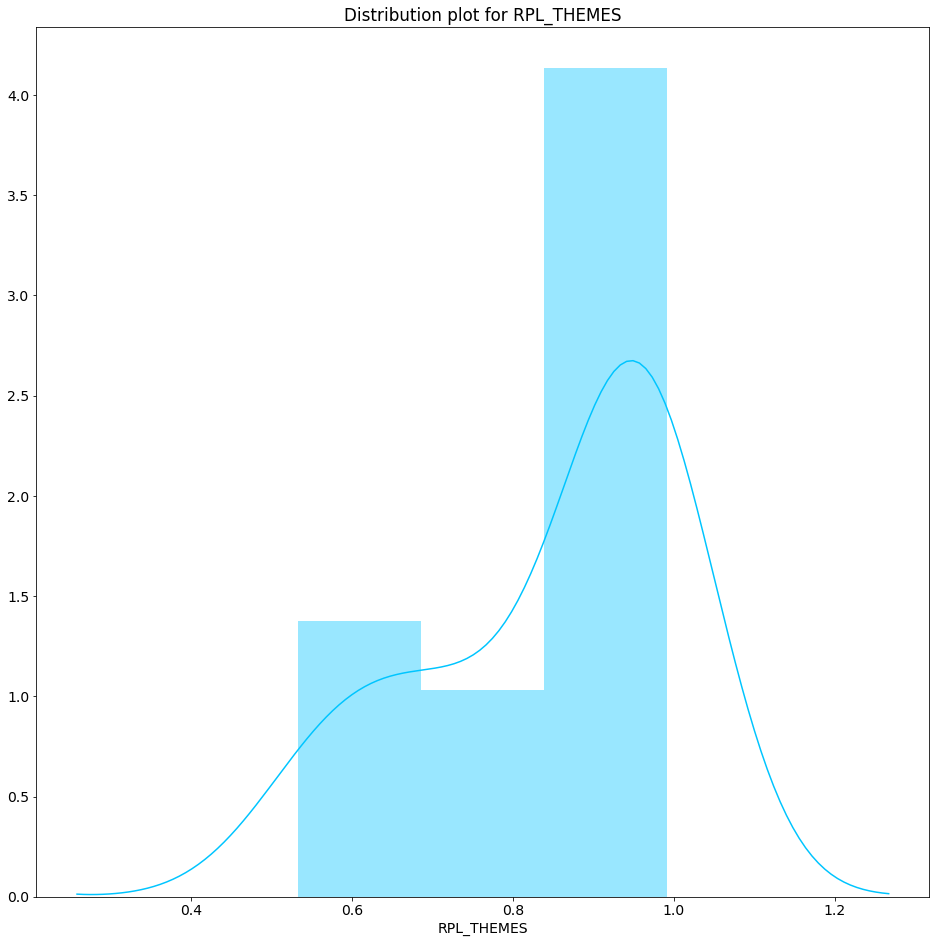

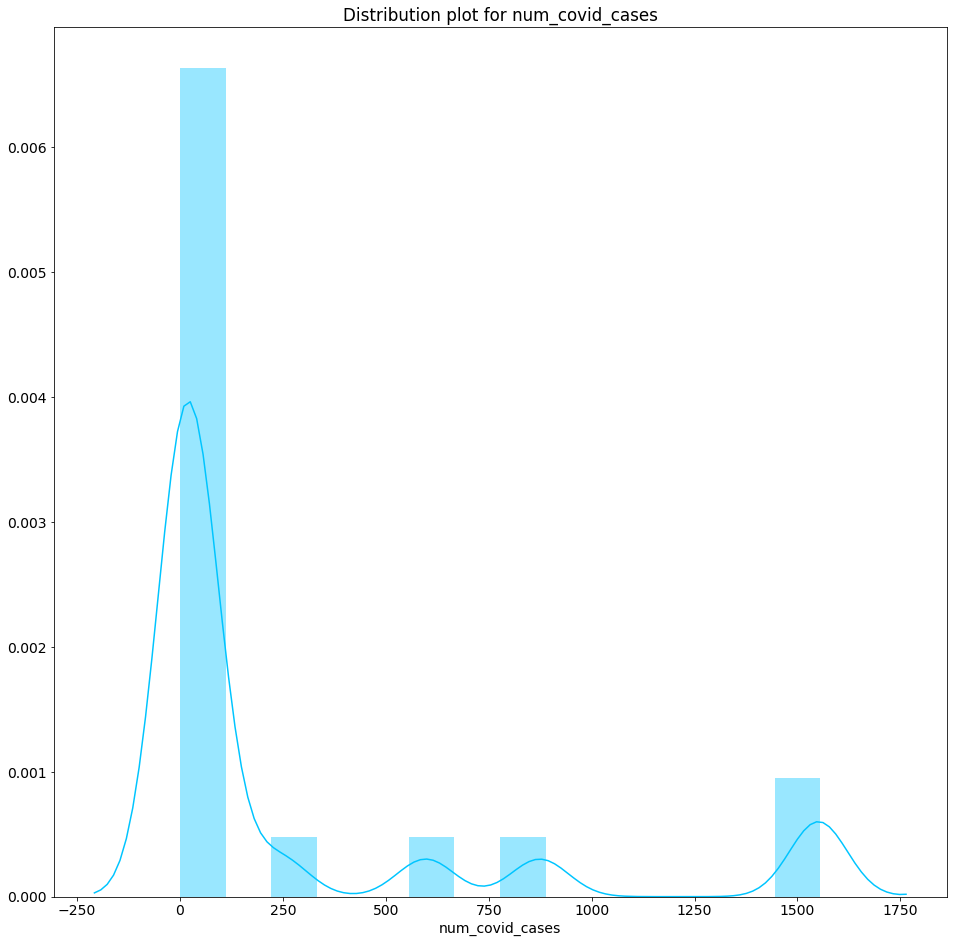

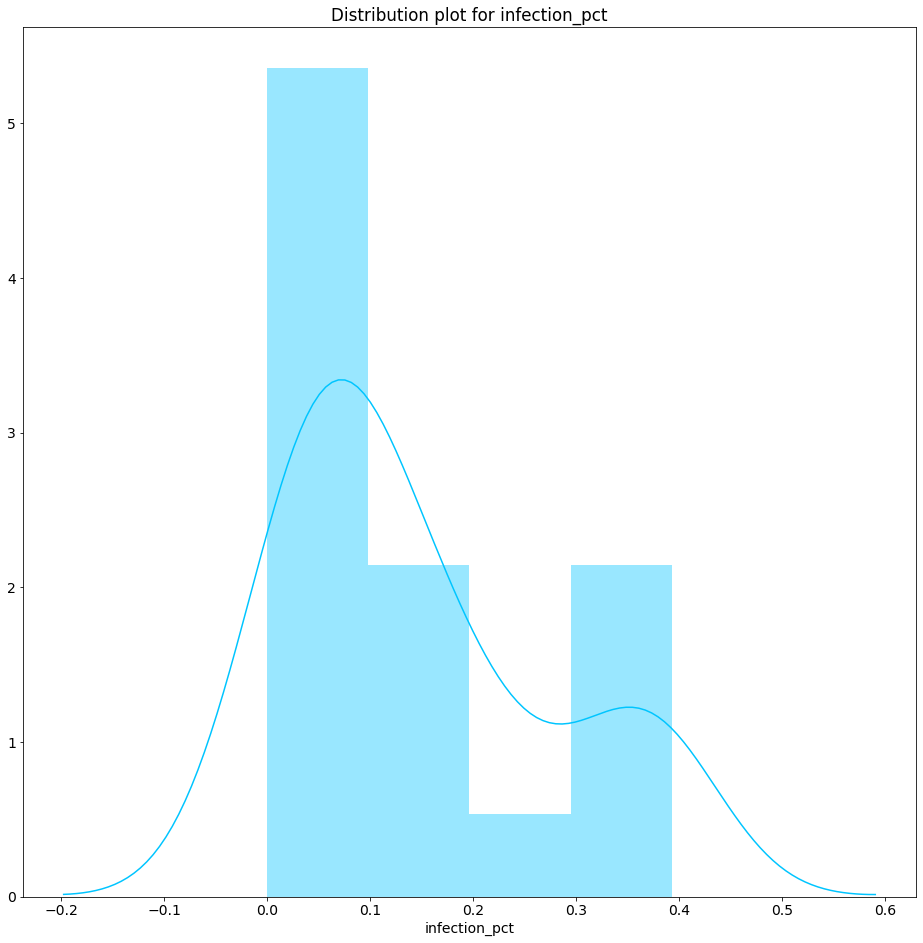

In [23]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_11)

## What does the Distribution of our Data look like when we use the Categorical column for population density?

- Here we will look at the same columns as we did by Region but will use the ```pop_density_category```

1. **Low** - This will be all the counties that have a population density that are in the bottom 25%
2. **High** - This will be all the counties that have a population density that are in the top 25%
3. **Mid** - These will be the remaining counties

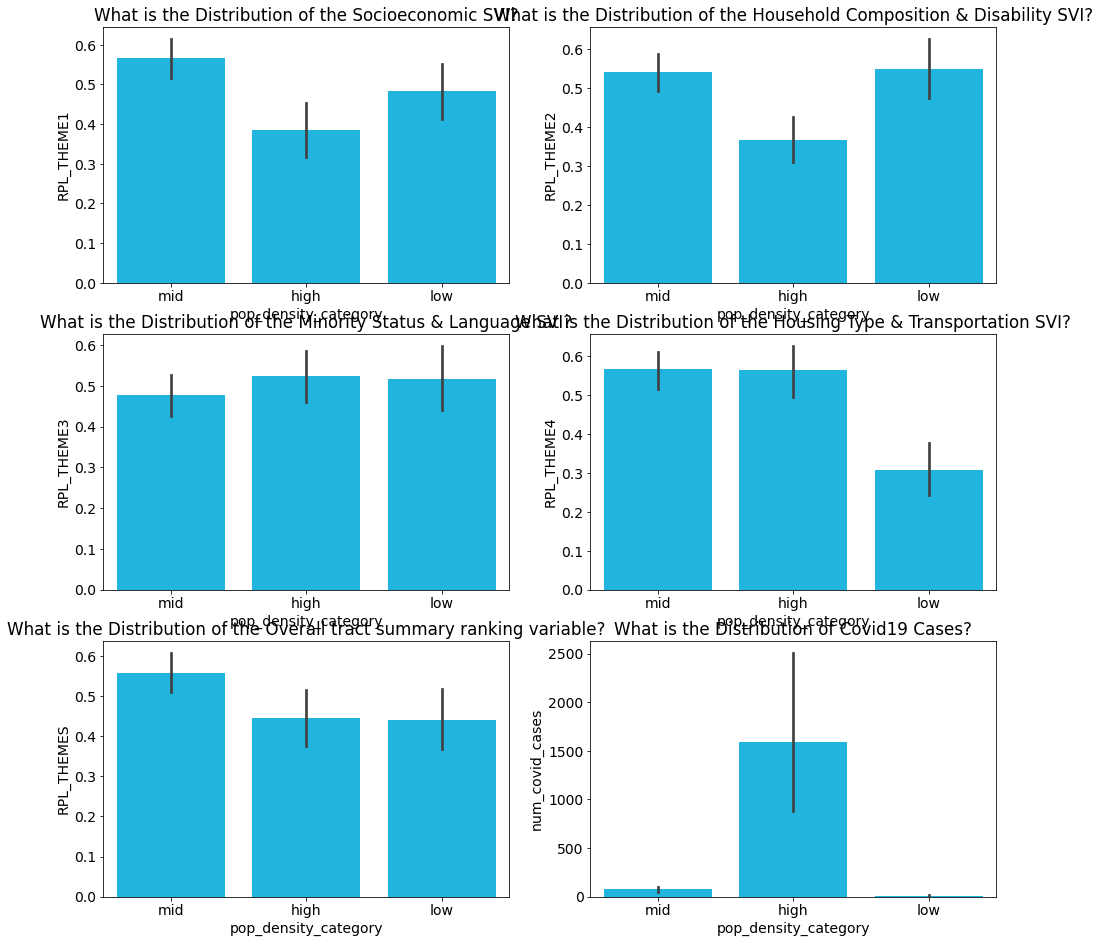

In [24]:
explore.plot_categorical_pop_density_barplots(df)

In [25]:
# Subset the data into Low, Mid and Hight Population Density Dataframes
df_low, df_mid, df_high = explore.pop_density_categoricaol_subset_for_distro_plots(df)

### Distribution Plots for Low Population Density

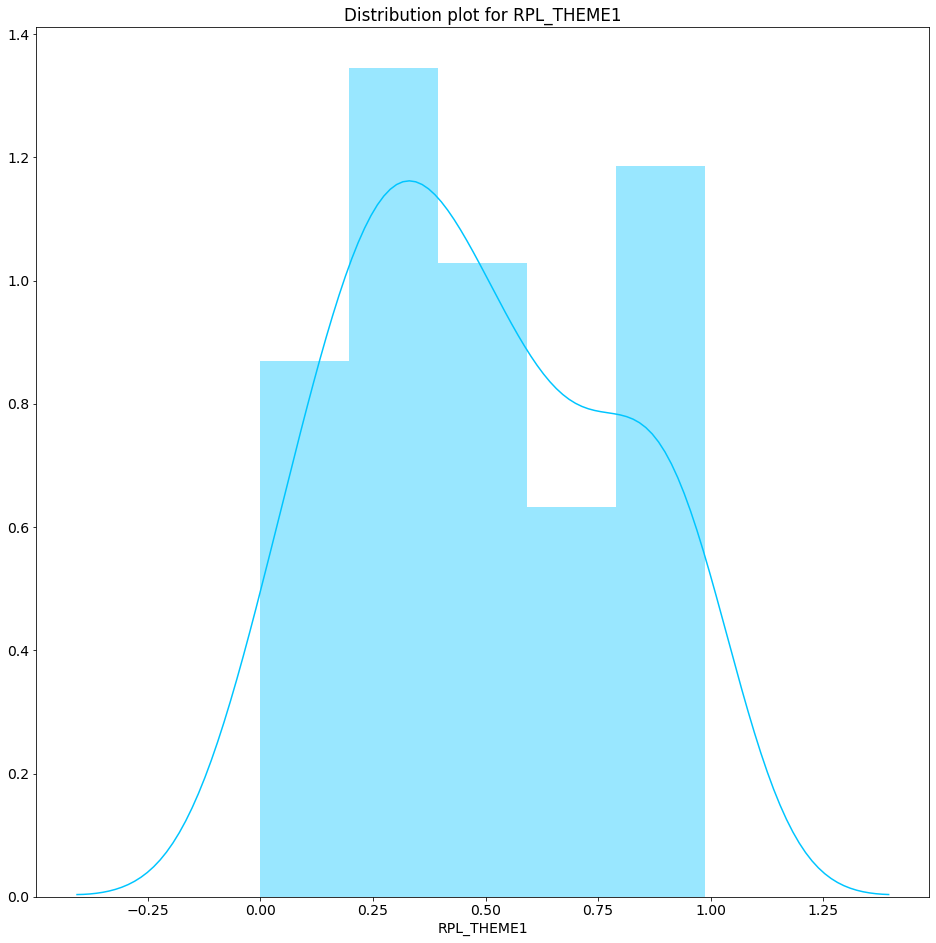

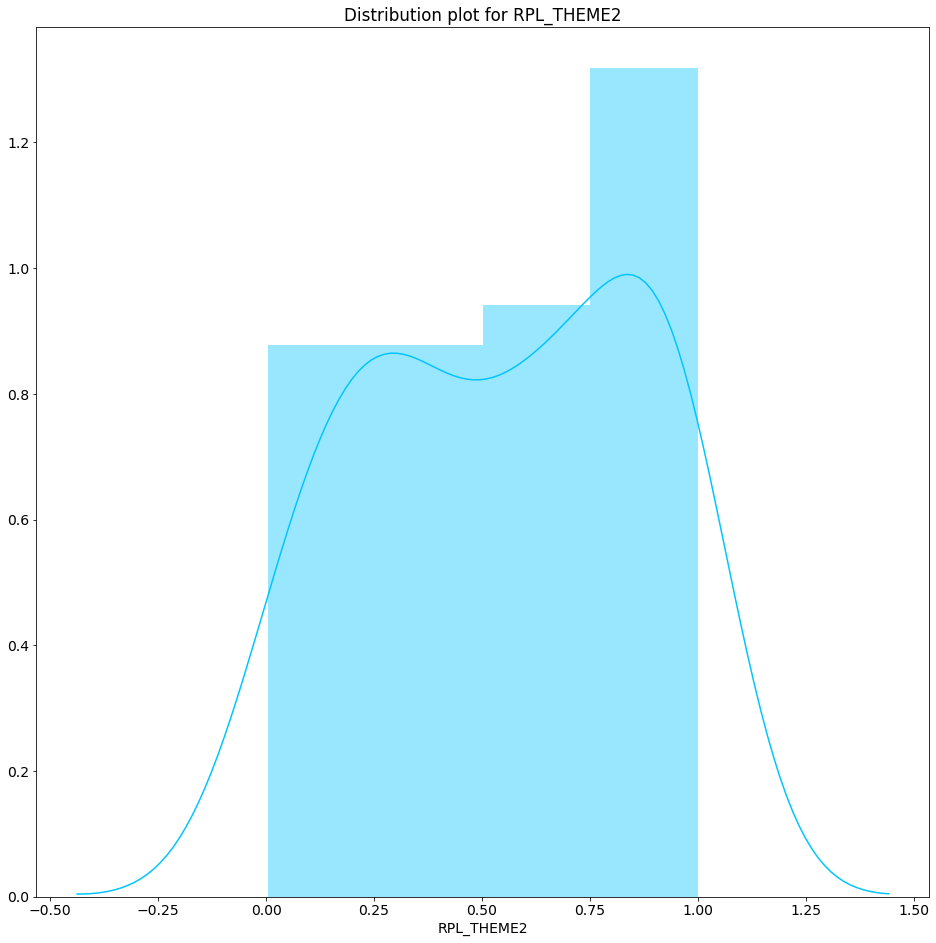

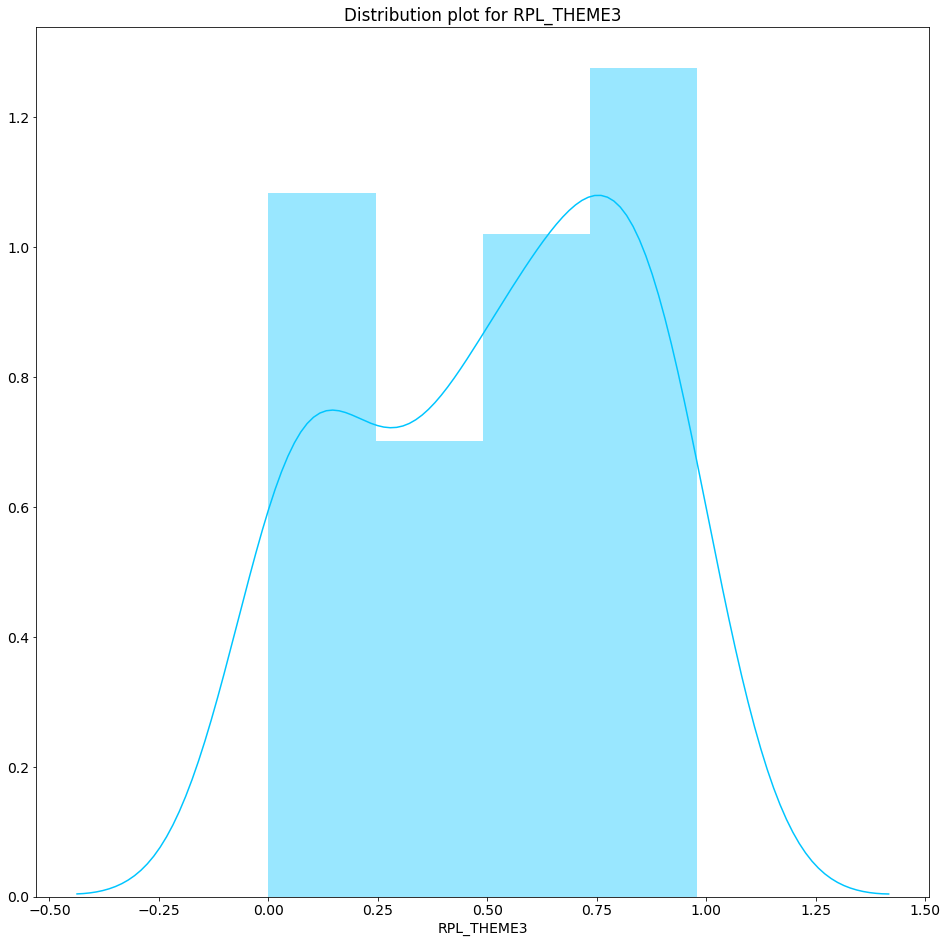

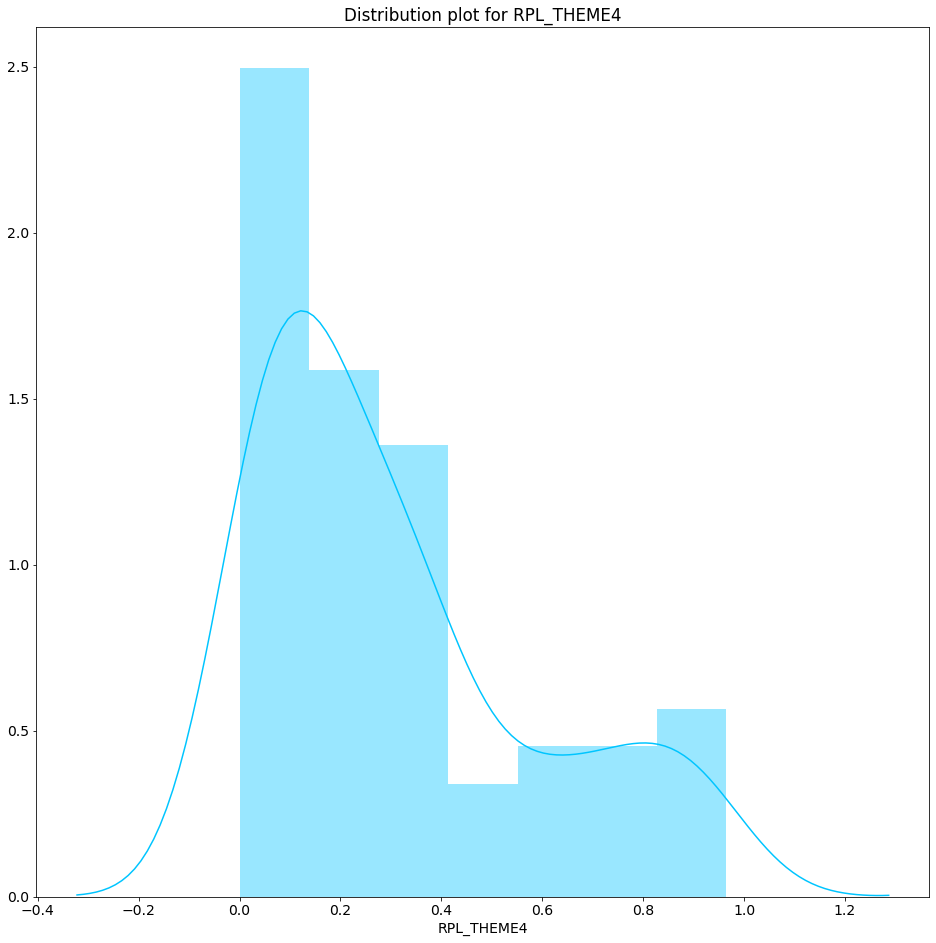

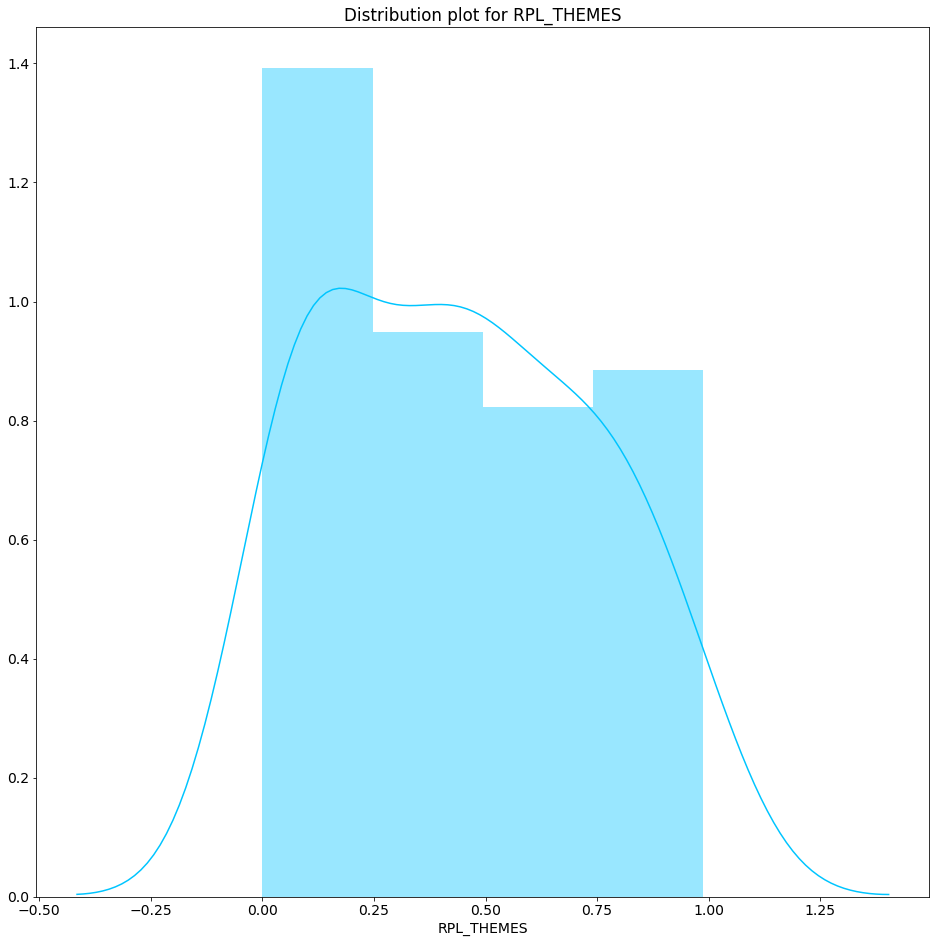

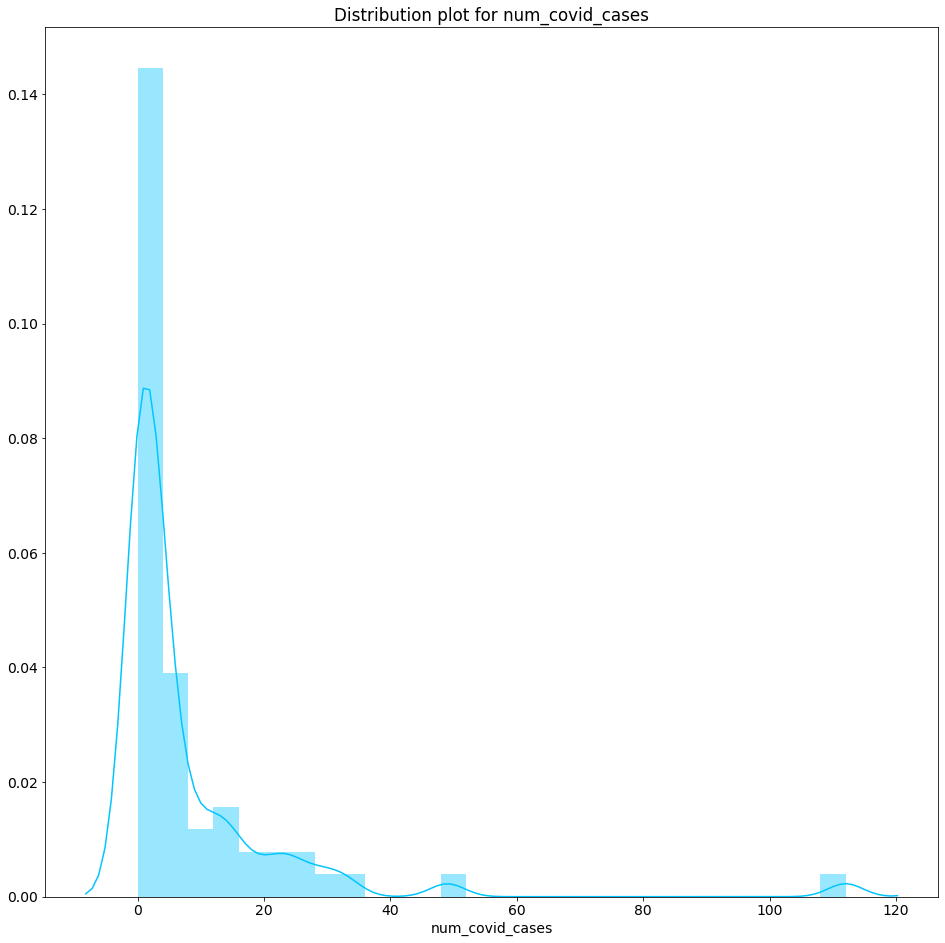

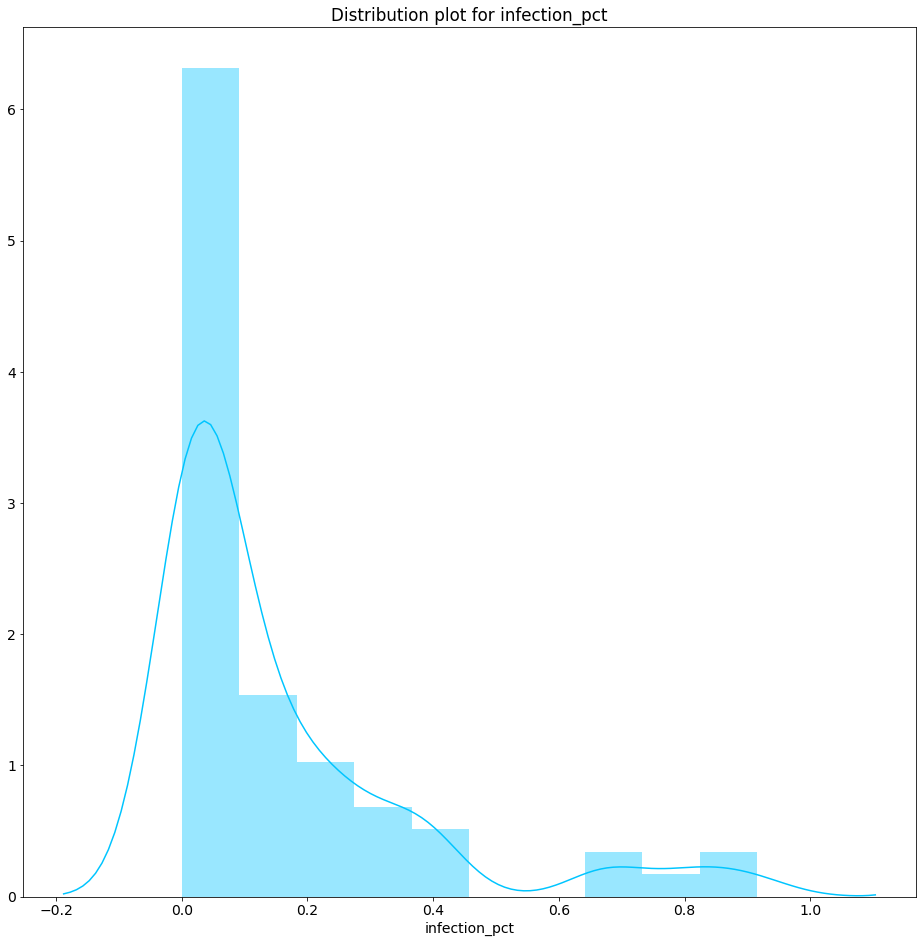

In [26]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_low)

### Distribution Plots for Low Population Density

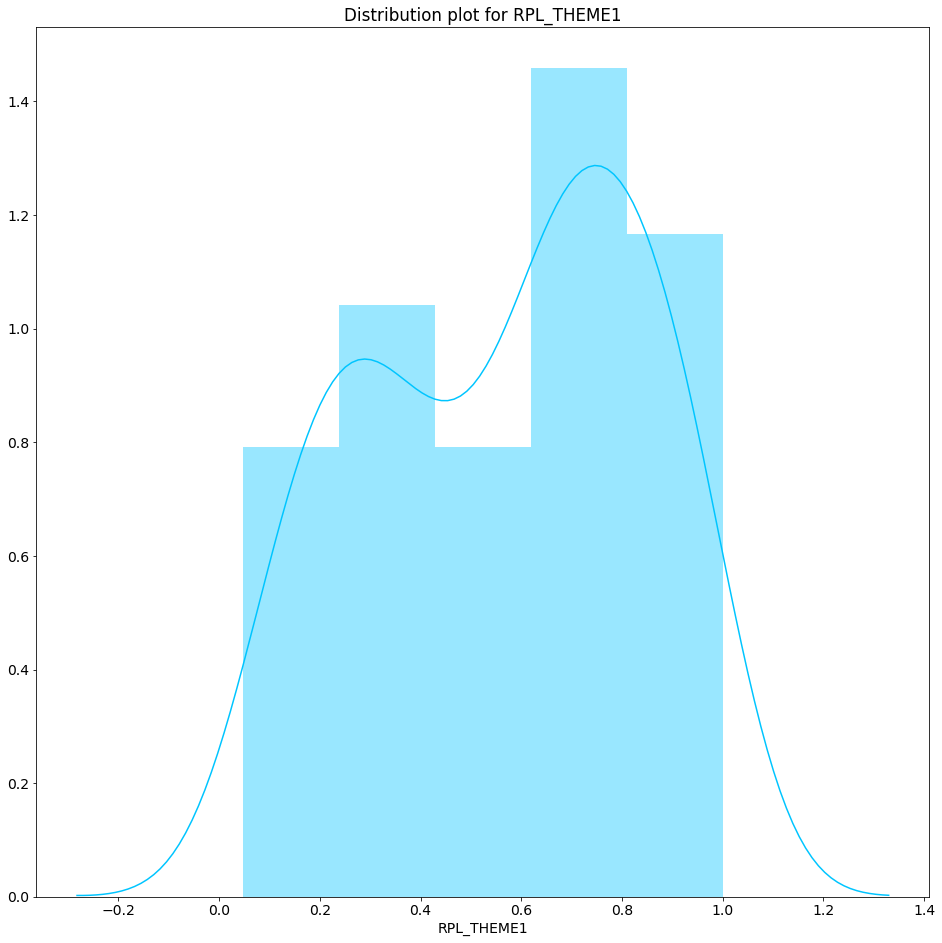

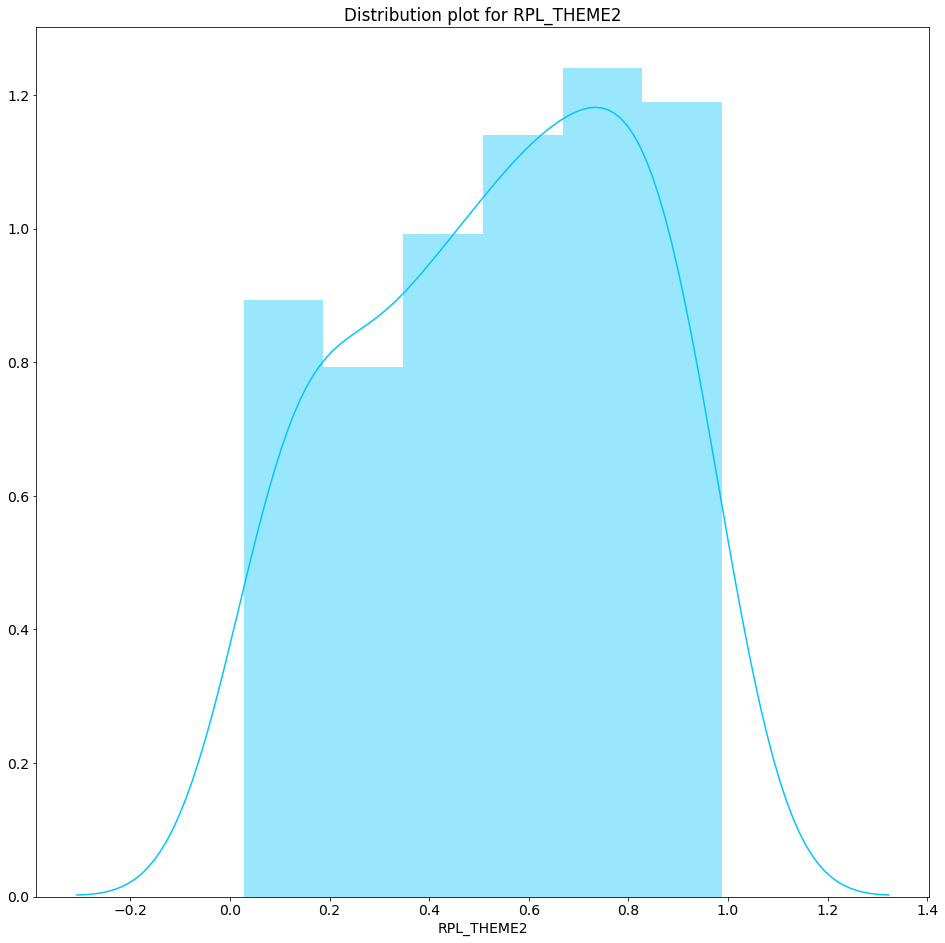

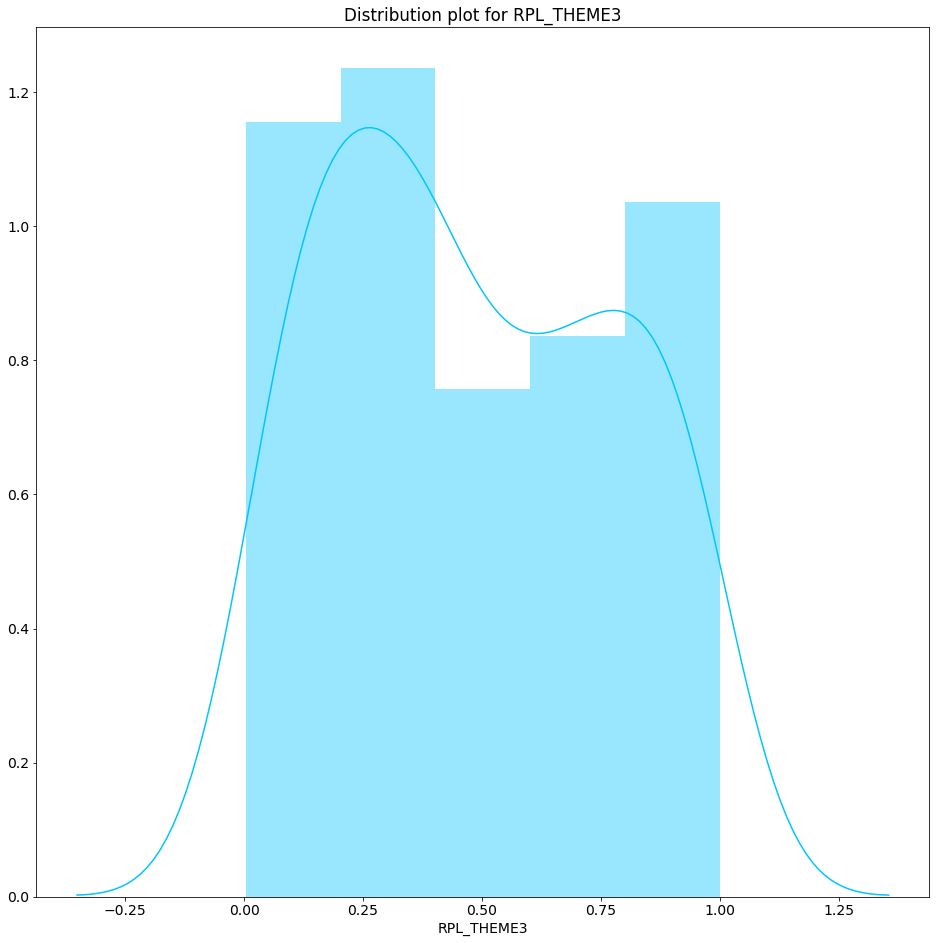

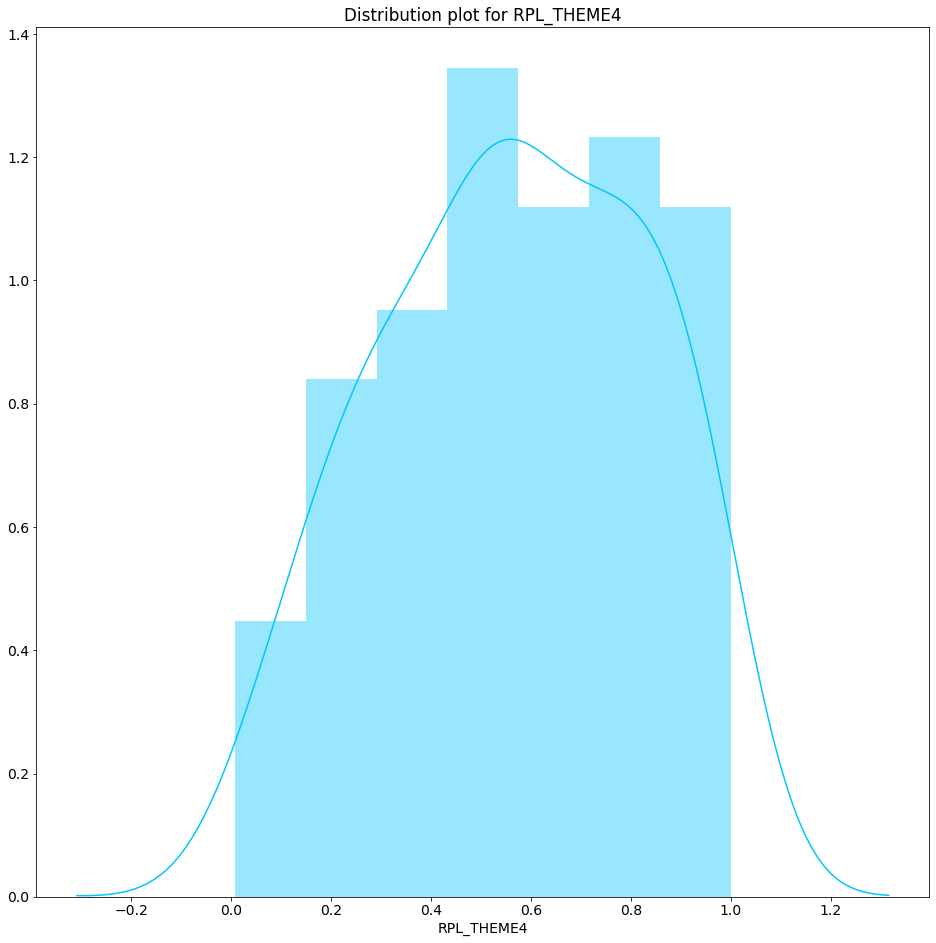

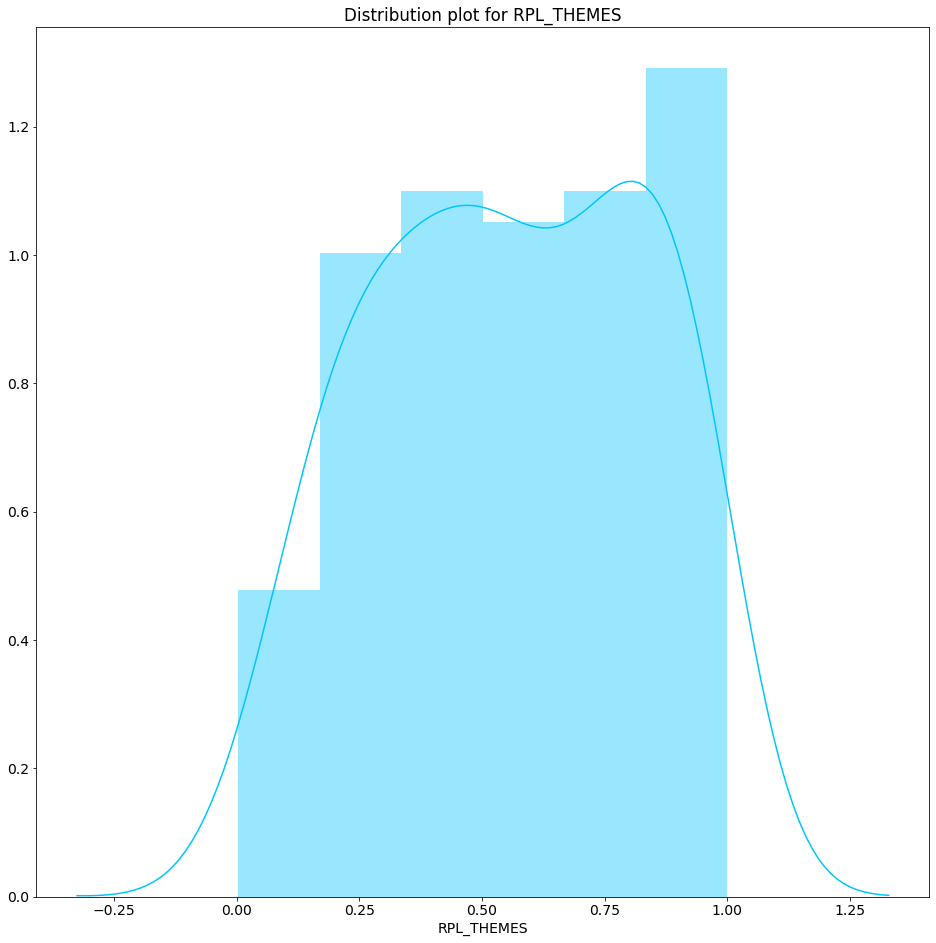

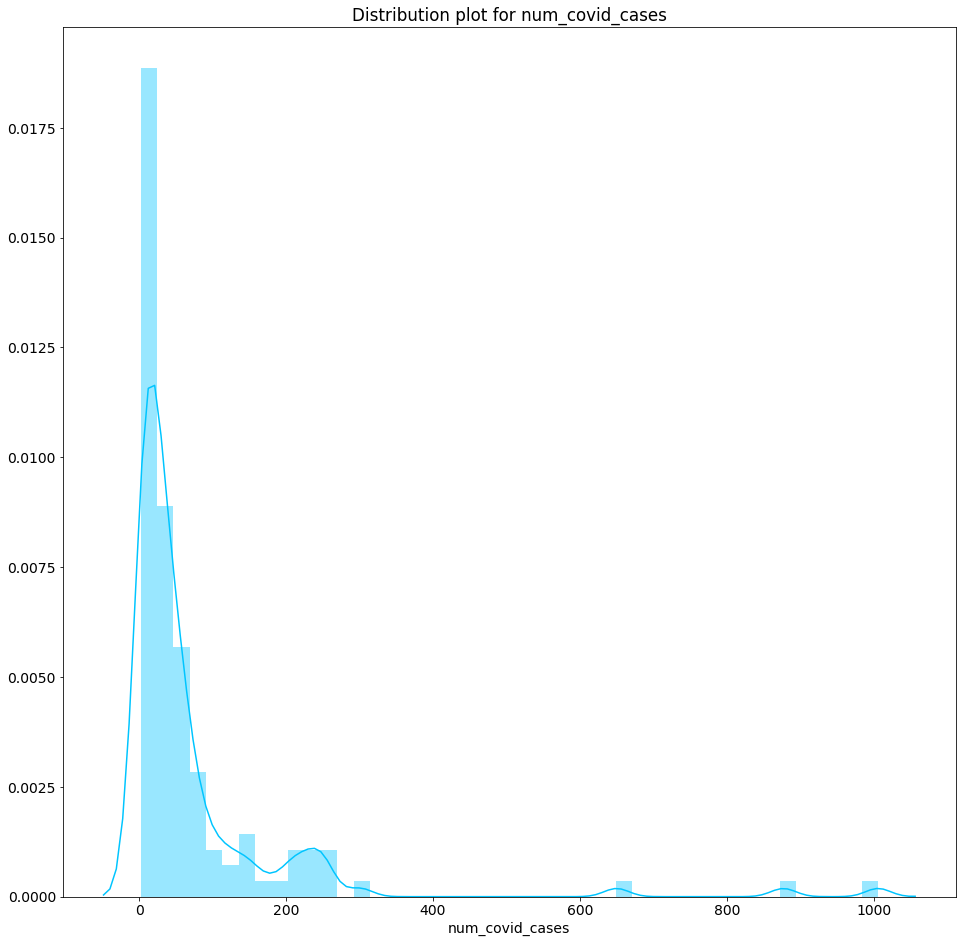

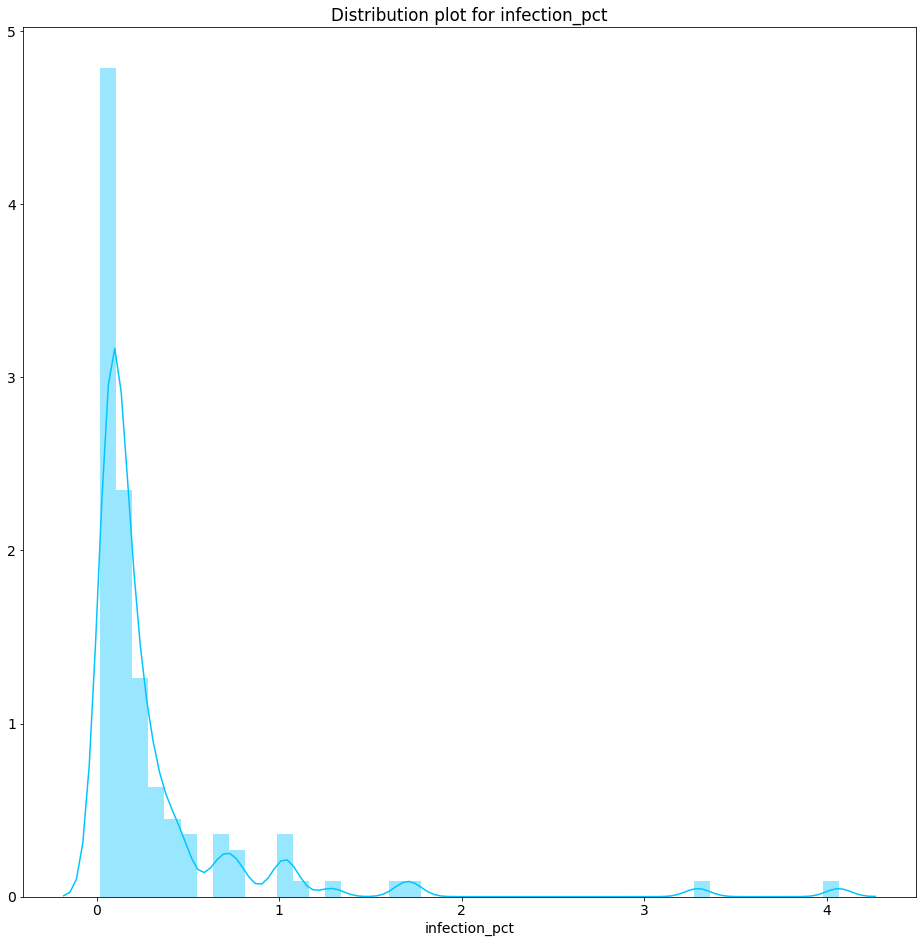

In [27]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_mid)

### Distribution Plots for Low Population Density

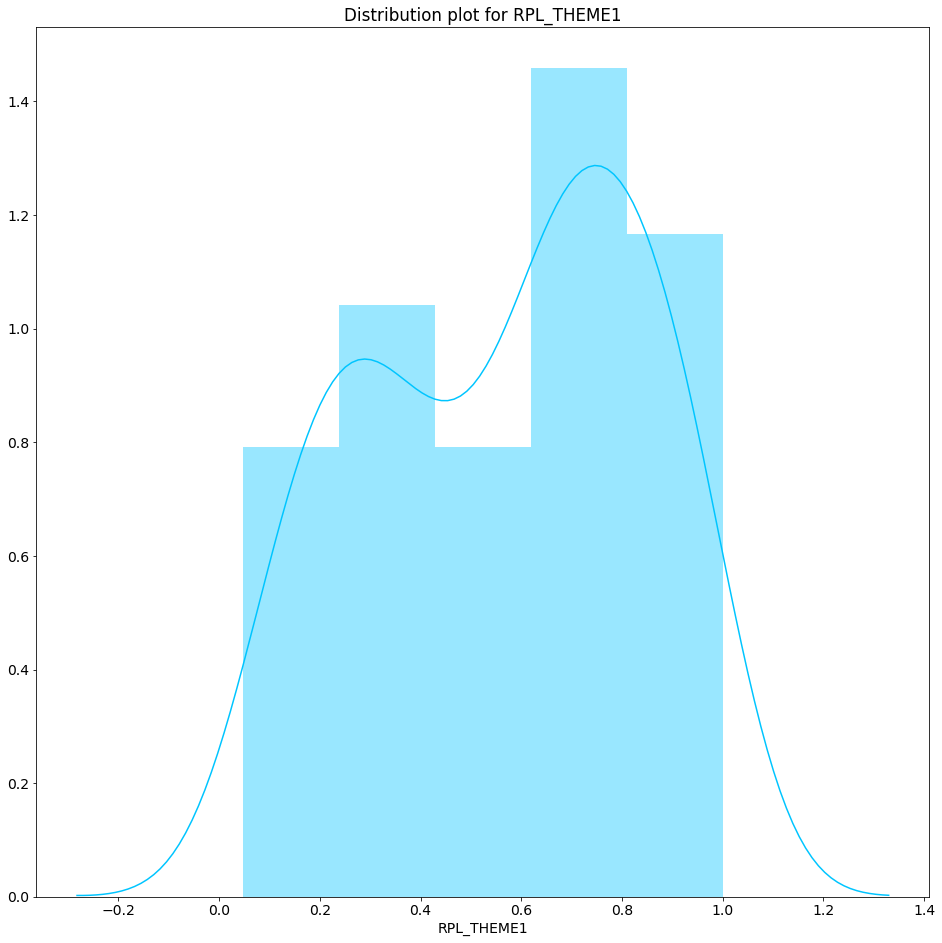

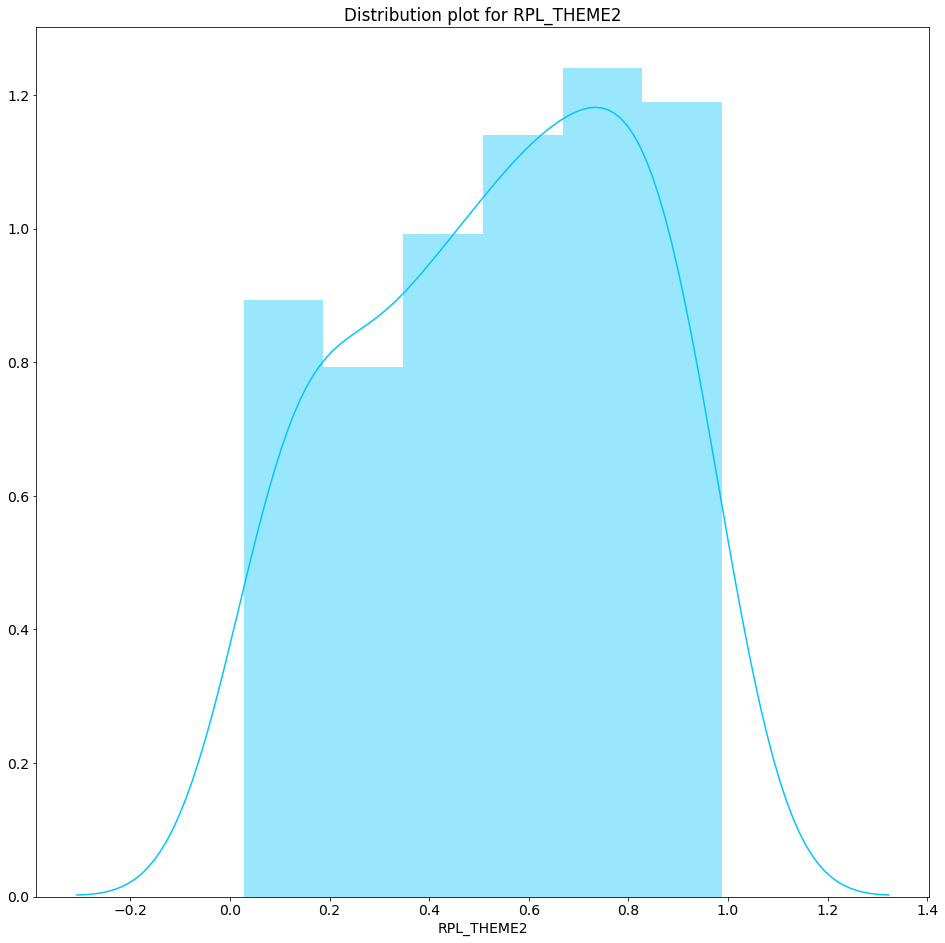

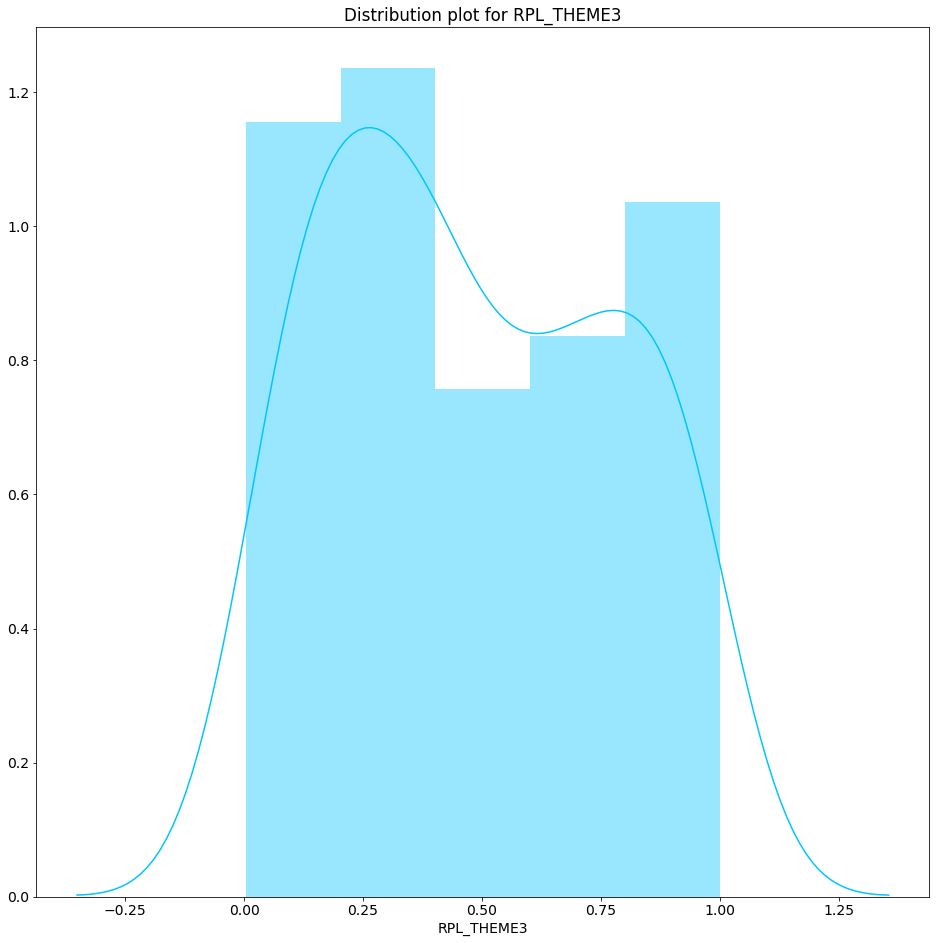

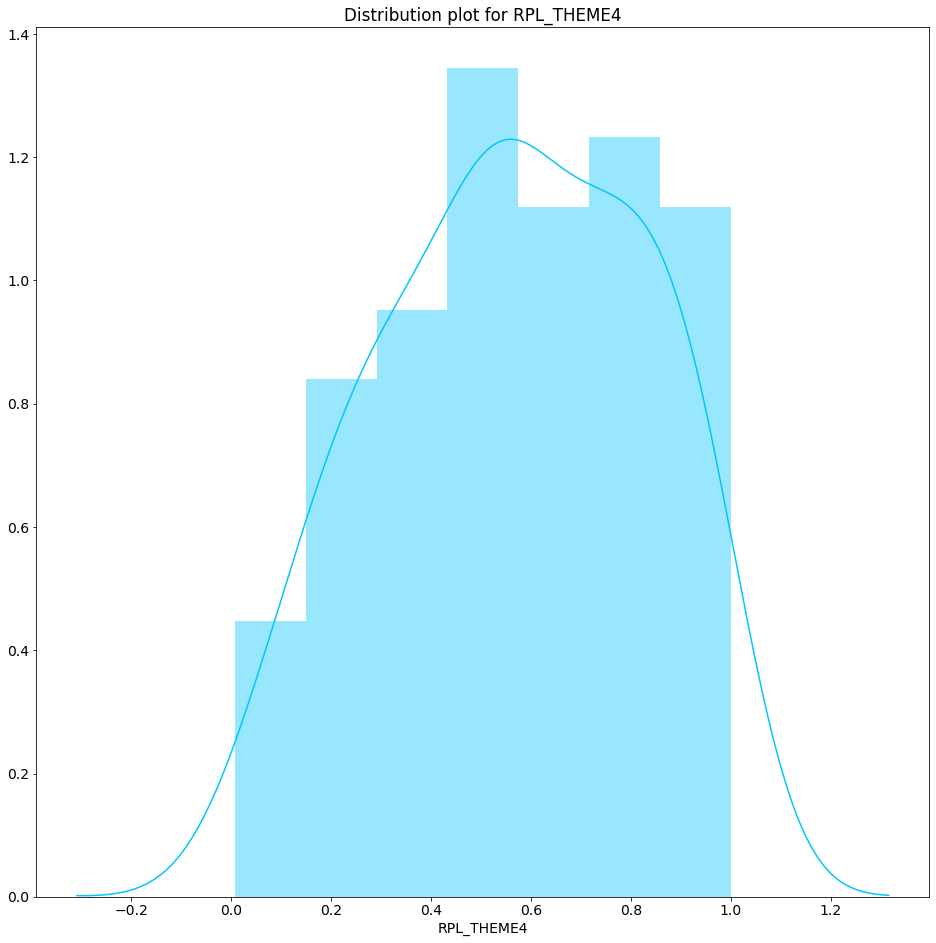

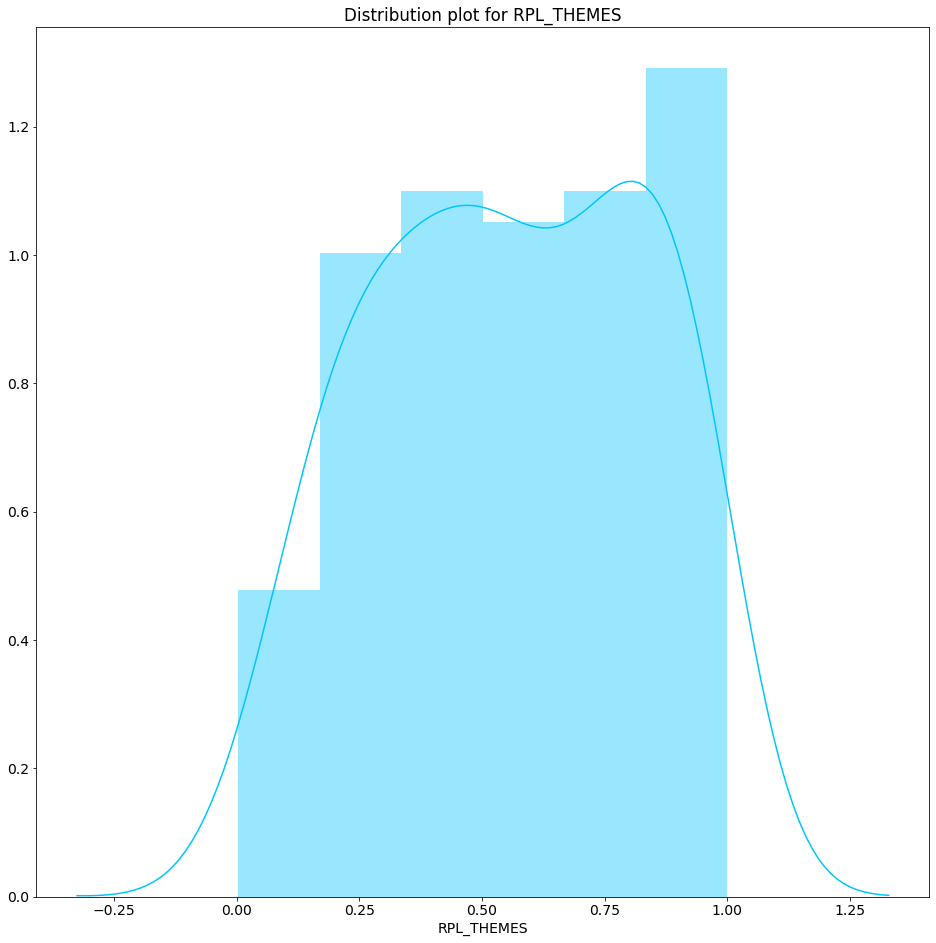

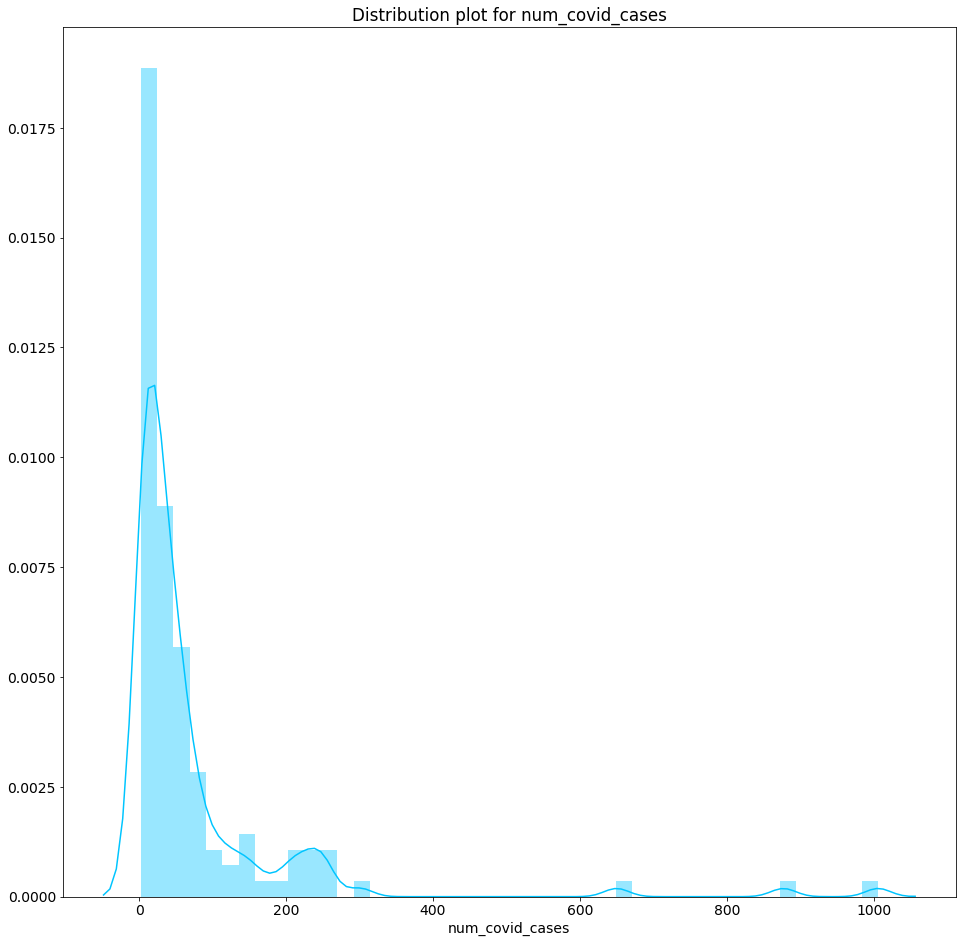

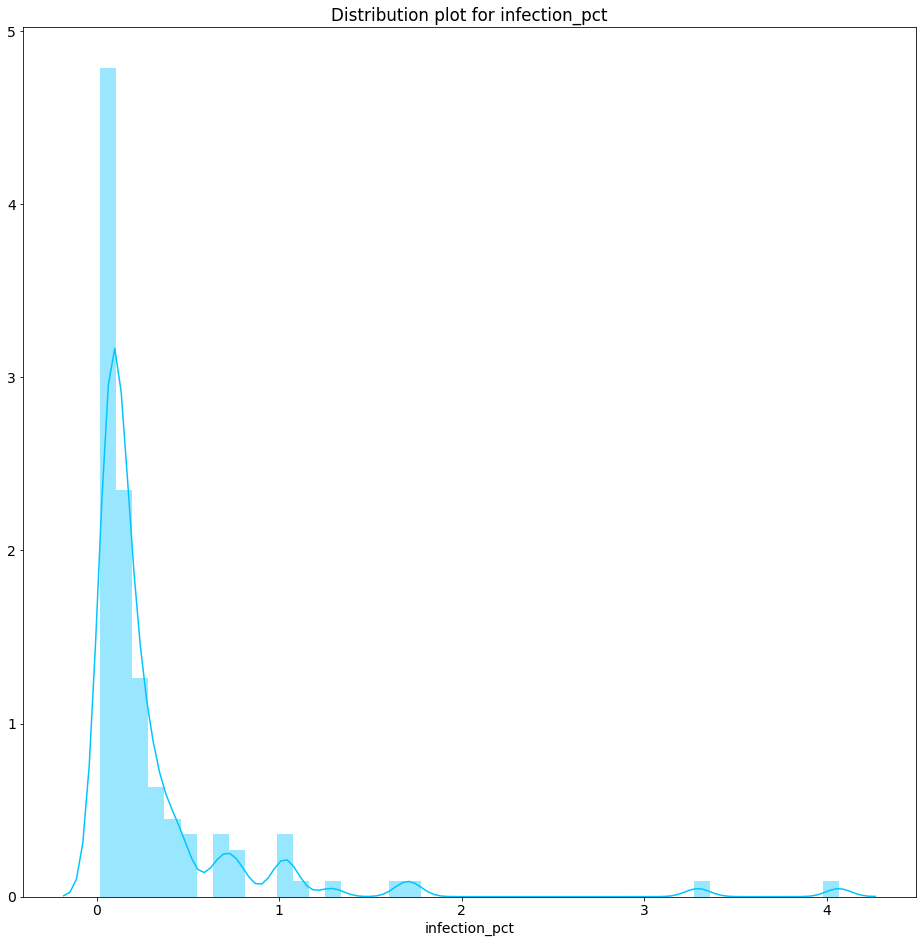

In [28]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_high)

## Is there a linear correlation between population density and infection rate?

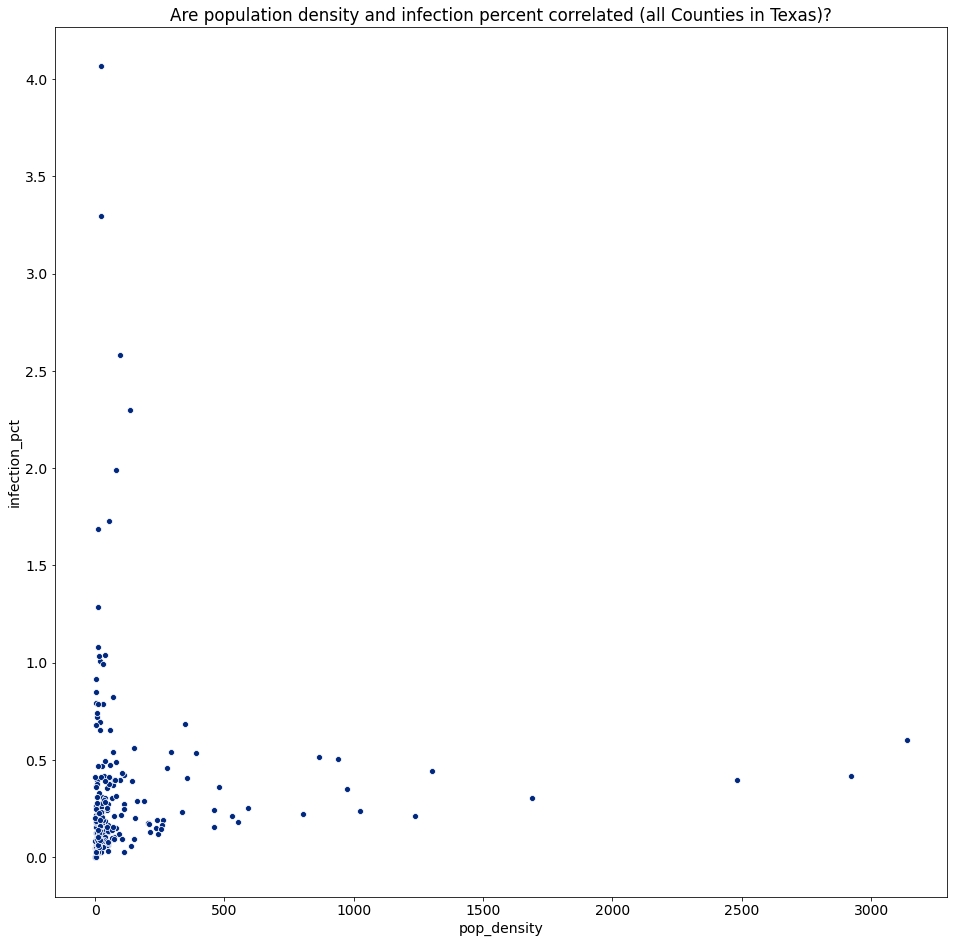

In [29]:
plt.title("Are population density and infection percent correlated (all Counties in Texas)?")
sns.scatterplot(df.pop_density, df.infection_pct, color = '#00287f')

**Takeaways**

It does not look like there is a great linear relationship between the 2, however we will run a statistical test to be sure.

### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [30]:
# set alpha
alpha = .05

# set our x and y
x = df.pop_density
y = df.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.05996876439494929
p= 0.3411539564195117


In [31]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.34) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


Takeaways:
- Since there is no linear relationship between population density and infection percent for all of the County's, we will try subsetting them into similar sized population density's to see if we can find a linear relationship.

In [32]:
#get dataframes for each popluations density category low, mid, high
df_low, df_mid, df_high = explore.get_pop_density_categoricaol_subset(df)

### Do the Counties with a low density population have a linear relationship with Infection Rate?

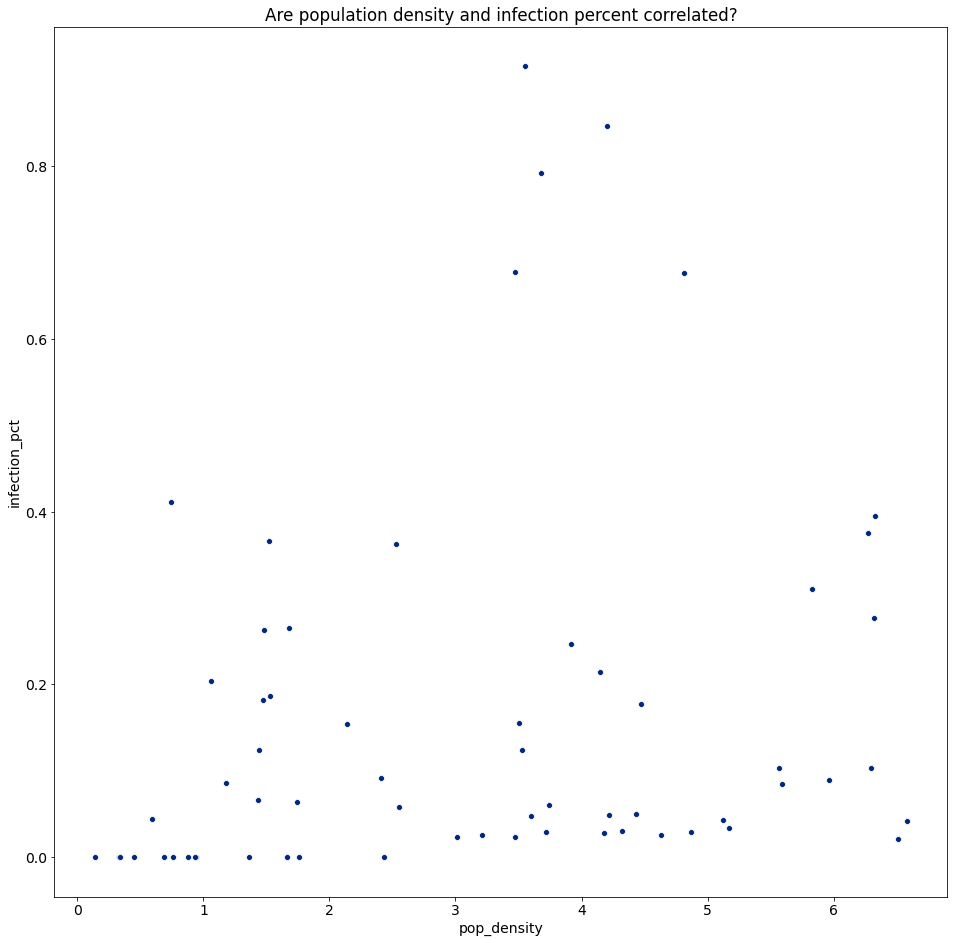

In [33]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_low.pop_density, df_low.infection_pct, color = '#00287f')

**Takeaways:**
- Here we see the counties are spread out a bit more so we will need to run Pearson's R to check the correlation as well as the p value

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [34]:
# set alpha
alpha = .05

# set our x and y
x = df_low.pop_density
y = df_low.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.21285102895421382
p= 0.09128494581289913


In [35]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.09) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a High density population have a linear relationship with Infection Rate?

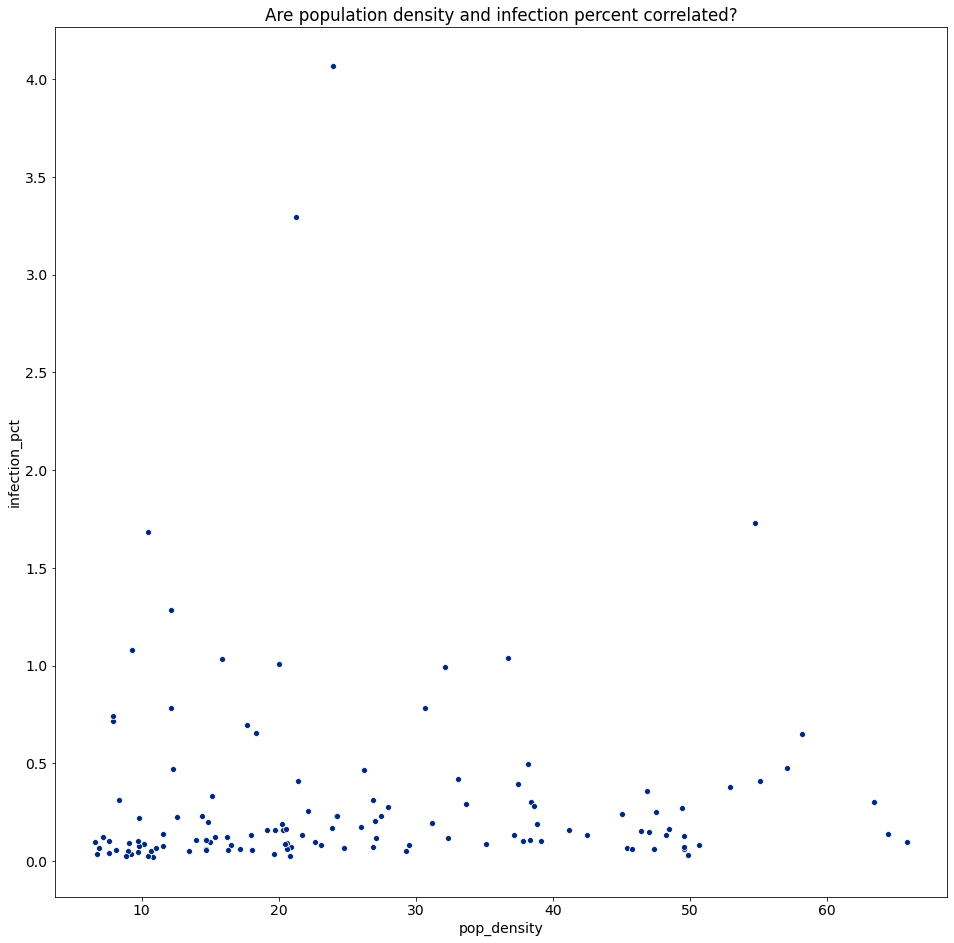

In [36]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_high.pop_density, df_high.infection_pct, color = '#00287f')

Takeaways:
- Here there does seem to be a pattern between population density and infection percent for the counties grouped as High Population

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [37]:
# set alpha
alpha = .05

# set our x and y
x = df_high.pop_density
y = df_high.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.006639485754411013
p= 0.9411805962248915


In [38]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.94) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a Mid Density Population have a Linear Relationship with Infection Rate?

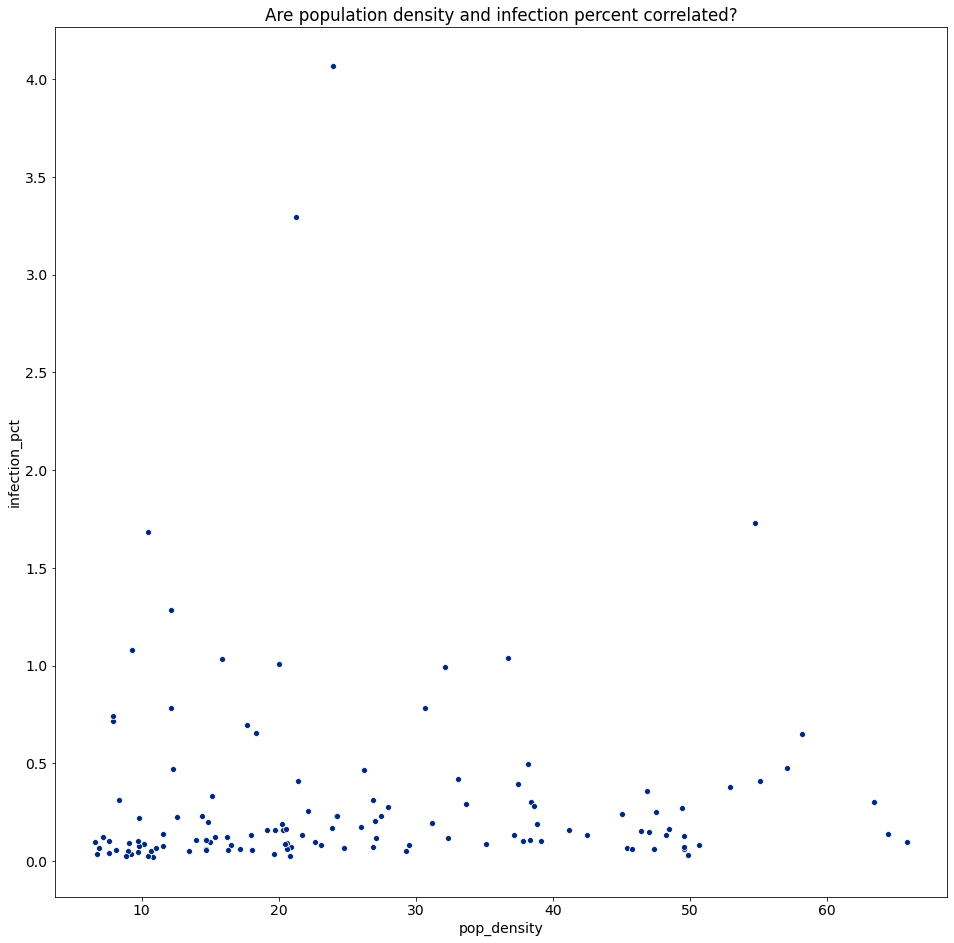

In [39]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_mid.pop_density, df_mid.infection_pct, color = '#00287f')

Takeaways:
- There does seem to be a pattern between population density and infection percent for the counties grouped as Mid Population Density

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [40]:
# set alpha
alpha = .05

# set our x and y
x = df_mid.pop_density
y = df_mid.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.006639485754411013
p= 0.9411805962248915


In [41]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.94) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


**Takeaways:**
- Since we failed to reject the null hypothesis for each category in population density we can safely say there is no statistical significance in the linear relationship for Population Density and Infection Percent 

## Is there a correlation between the number of Senior Citizens in a County and Infection?

Text(0.5, 1.0, 'Senior Citizens and Infection percentage')

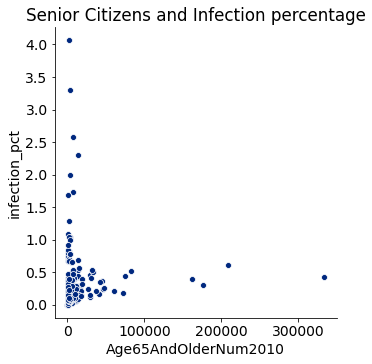

In [42]:
sns.relplot(x="Age65AndOlderNum2010", y="infection_pct", data=df, color = '#00287f')
plt.title("Senior Citizens and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Senior citizen percent and infection percent are independent of each other.
- $H_a$: Senior citizen percent and infection percent are dependent of each other.

In [43]:
observed = pd.crosstab(df.senior_pct, df.infection_pct_category)

In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 1  0  1]
 [ 3  0  2]
 [ 2  1  3]
 [ 5  1  8]
 [ 5  1  2]
 [ 8  0  9]
 [ 4  2  7]
 [ 7  7 11]
 [ 9  2 12]
 [ 6  3  7]
 [ 4  3 10]
 [ 1  5  6]
 [ 2  4 14]
 [ 1  1  9]
 [ 0  6  7]
 [ 2  6  6]
 [ 0  1  1]
 [ 1  3  4]
 [ 1  4  1]
 [ 1  4  2]
 [ 1  3  0]
 [ 0  4  1]
 [ 0  1  1]
 [ 0  1  1]
 [ 0  0  1]
 [ 0  1  0]]
---
Expected

[[ 0.50393701  0.50393701  0.99212598]
 [ 1.25984252  1.25984252  2.48031496]
 [ 1.51181102  1.51181102  2.97637795]
 [ 3.52755906  3.52755906  6.94488189]
 [ 2.01574803  2.01574803  3.96850394]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 6.2992126   6.2992126  12.4015748 ]
 [ 5.79527559  5.79527559 11.40944882]
 [ 4.03149606  4.03149606  7.93700787]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.02362205  3.02362205  5.95275591]
 [ 5.03937008  5.03937008  9.92125984]
 [ 2.77165354  2.77165354  5.45669291]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 3.52755906  3.52755906  6.94488189]
 [ 0.50393701  0.50393701  0.99212598]


In [45]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.01) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    


## Is there a correlation between the number of Nursing Homes in a County and Infection?

Text(0.5, 1.0, 'Number of Nursing Homes and Infection percentage')

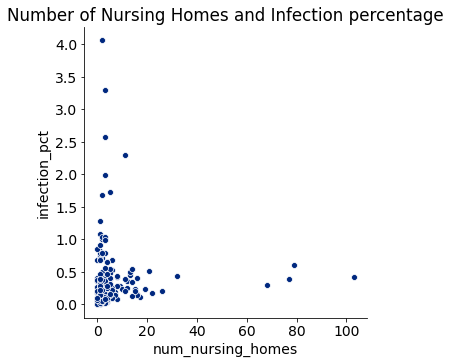

In [46]:
sns.relplot(x="num_nursing_homes", y="infection_pct", data=df, color = '#00287f')
plt.title("Number of Nursing Homes and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Number of nursing homes and infection percent are independent of each other.
- $H_a$: Number of nursing homes and infection percent are dependent of each other.

In [47]:
observed = pd.crosstab(df.num_nursing_homes, df.infection_pct)

In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[9 0 0 ... 0 0 0]
 [5 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---
Expected

[[1.87401575 0.13385827 0.13385827 ... 0.13385827 0.13385827 0.13385827]
 [3.7480315  0.26771654 0.26771654 ... 0.26771654 0.26771654 0.26771654]
 [2.25984252 0.16141732 0.16141732 ... 0.16141732 0.16141732 0.16141732]
 ...
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]]
---

chi^2 = 6563.0159
p     = 0.0010


In [49]:
if p > alpha:
    print(f'''
    Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.3f}) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.001) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    


## Do the Various Vulnerability Scores correlate to the Infection percent?

Here we are going to look at the various SVI and test each one by Region:

The Categories are:
- RPL_THEME1 - Socioeconomic
- RPL_THEME2 - Household Composition & Disability
- RPL_THEME3 - Minority Status & Language
- RPL_THEME4 - Housing Type & Transportation
- RPL_THEMES - Overall tract summary ranking variable

In [50]:
#round the infection percent to 3 deciaml places
df.infection_pct = df.infection_pct.round(3)

In [51]:
#bring in fresh data for each region (these will be subset dataframes)
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_distro(df)

### Is the Infection Percent dependent on the Overall SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 1
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 1

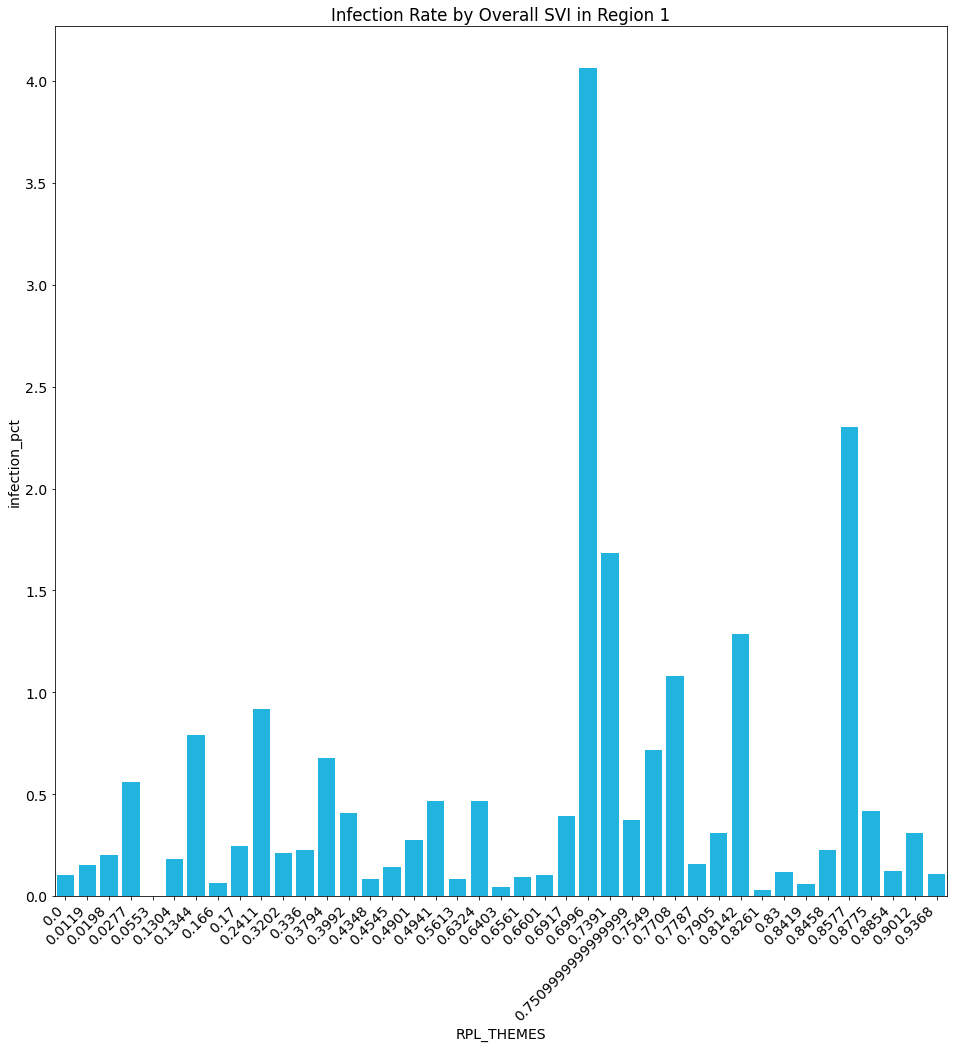

In [52]:
explore.barchart_for_overall_svi(df_1, 1)

In [63]:
#run chi2 test using function
chi2_reg1, p_reg1, degf_reg1, expected_reg1, obs_reg1 = explore.chi2_test_for_overall_svi_and_infection_percent(df_1)

chi^2 = 1558.0000
p     = 0.2433


In [65]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg1, 1)


        Because p (0.243) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 1
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 1

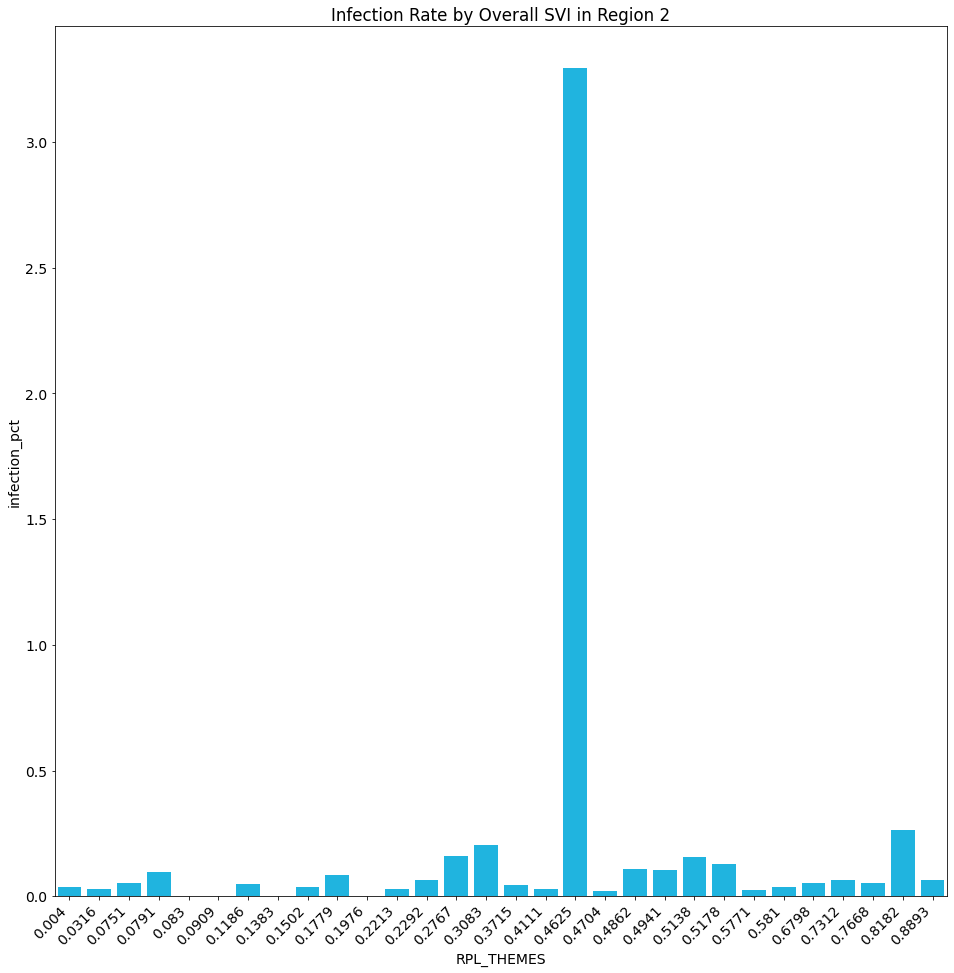

In [57]:
explore.barchart_for_overall_svi(df_2, 2)

In [59]:
#run chi2 test using function
chi2_reg2, p_reg2, degf_reg2, expected_reg2, obs_reg2 = explore.chi2_test_for_overall_svi_and_infection_percent(df_2)

chi^2 = 780.0000
p     = 0.2485


In [66]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg2, 2)


        Because p (0.249) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 2 and the infection percent are 
        independent of each other. 
        
